In [1]:
import warnings
import random

import qnorm
import scipy
import mygene
import numpy as np
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['svg.fonttype'] = 'none'


from util import gene_landscape, jensen_shannon_distance, gen_orthodb, pairwise_spearman, pairwise_jensen_shannon, pairwise_pearson

In [2]:
import bokeh.colors
from sklearn.decomposition import PCA
from bokeh.plotting import figure, show
from bokeh.layouts import row
from bokeh.io import output_notebook
from bokeh.models import LinearColorMapper
import seaborn as sns

In [3]:
samples = pd.read_table("../data_final/samples.tsv", index_col=0)

species2assembly = {
    "X. tropicalis": "UCB_Xtro_10.0",
    "D. rerio": "GRCz11",
    "C. elegans": "ce11",
    "D. melanogaster": "BDGP6.32",
    "M. musculus": "GRCm38.p6",
}
assembly2species = {v: k for k, v in species2assembly.items()}

species2study = {
    "X. tropicalis": ["EXPANDE", "OWENS"],
    "D. rerio": ["MARLETAZ", "WHITE"],
    "C. elegans": ["ZALTS"],
    "D. melanogaster": ["LIU"],
    "M. musculus": ["EXPANDE"]
}

study2stages = {
    ("X. tropicalis", "EXPANDE"): ["st2", "st5", "st9", "st11", "st13", "st17", "st19", "st21", " st23", "st26", "st28", "st31", "st37.5"],
    ("X. tropicalis", "OWENS"): ["0-2hpf", "3-5hpf", "6-8hpf", "9-11hpf", "12-14hpf", "15-17hpf", "18-20hpf", "21-23hpf", "24-26hpf", "27-29hpf", "30-32hpf", "33-35hpf", "36-38hpf", "39-41hpf", "42-44hpf", "45-47hpf", "48-50hpf", "51-53hpf", "54-56hpf", "57-59hpf", "60-62hpf", "63-66hpf"],
    ("D. rerio", "MARLETAZ"): ["Eggs", "2-4cells", "2hpf", "1Kcells", "Dome", "Shield", "8hpf", "Bud", "12hpf", "16hpf", "20hpf", "26hpf", "28hpf", "48hpf", "72hpf", "120hpf", "7dpf"],
    ("D. rerio", "WHITE"): ["1-cell", "2-cell", "128-cell", "1k-cell", "Dome", "50pc-epiboly", "Shield", "75pc-epiboly", "1-4-somites", "14-19-somites", "20-25-somites", "Prim-5", "Prim-15", "Prim-25", "Long-pec", "Protruding-mouth", "Day-4", "Day-5"],
    ("C. elegans", "ZALTS"): ["0_hpf", "1_hpf", "3_hpf", "4.5_hpf", "7.3_hpf", "10.8_hpf", "13.8_hpf"],
    ("D. melanogaster", "LIU"): ["2-3_hpf", "5-6_hpf", "8-9_hpf", "11-12_hpf", "14-15_hpf", "17-18_hpf", "20-21_hpf", "23-24_hpf"],    
    ("M. musculus", "EXPANDE"): ["2cell", "8cell", "morula", "blastocyst", "E7.5", "E8.5", "E9.0", "E9.5", "E10.5", "E11.5", "E12.5", "E13.5", "E14.5", "E15.5", "E16.5", "E17.5", "E18.5"],    
}

dfs = {
    assembly: pd.read_table(f"../data_final/{assembly}-TPM.tsv.gz", index_col=0) for assembly in species2assembly.values()
}

# interactive pca plot with bokeh

In [4]:
# axes = []

# TOOLTIPS = [
#     ("index", "$index"),
#     ("sample", "@sample")
# ]

# def descriptive2stageidx(samplename, samples, assembly):
# #     print(samplename)
#     stage = samples[(samples["assembly"] == assembly) & (samples["descriptive_name"] == samplename)]["stage"]
#     return assembly2stages[assembly].index(stage.values[0])

# for i, assembly in enumerate(assembly2species.keys()):
# # for i, assembly in enumerate(["Zm-B73-REFERENCE-NAM-5.0"]):
#     df = dfs[assembly].copy()
#     df.values[:] = scipy.stats.zscore(df, axis=1)
#     df = df.dropna()

#     pca = PCA(n_components=2)
#     df_coding_PCs = pd.DataFrame(pca.fit_transform(df.transpose()))
#     df_coding_PCs.columns = ["pc1", "pc2"]
#     df_coding_PCs["sample"] = df.columns
#     df_coding_PCs["stage"] = [descriptive2stageidx(samplename, samples, assembly) for samplename in df_coding_PCs["sample"]]
#     palette = sns.color_palette("Spectral", len(assembly2stages[assembly])).as_hex()
#     df_coding_PCs["color"] = [palette[x] for x in df_coding_PCs["stage"]]
    
#     p = figure(title=assembly, tooltips=TOOLTIPS, width=300, height=300)
#     p.scatter(x="pc1", y="pc2", source=df_coding_PCs, size=10, fill_color="color", line_color="black")
#     axes.append(p)
    
# show(row(*axes))

In [5]:
dfs

{'UCB_Xtro_10.0':                     EXPANDE_st2_rep1  EXPANDE_st2_rep2  EXPANDE_st5_rep1  \
 gene                                                                       
 ENSXETG00000000002         15.923569         16.694908         35.308640   
 ENSXETG00000000004          0.000000          0.000000          0.000000   
 ENSXETG00000000007          1.500938          1.869563          1.128583   
 ENSXETG00000000009          0.000000          0.000000          0.000000   
 ENSXETG00000000013         91.382105         80.506374         33.321639   
 ...                              ...               ...               ...   
 ENSXETG00000049496          0.000000          0.000000          0.000000   
 ENSXETG00000049497          7.043634          7.608989         11.095588   
 ENSXETG00000049498          0.000000          0.000000          0.000000   
 ENSXETG00000049499          0.030114          0.000000          0.000000   
 ENSXETG00000049500         19.715931         20.333066    

# pca plot

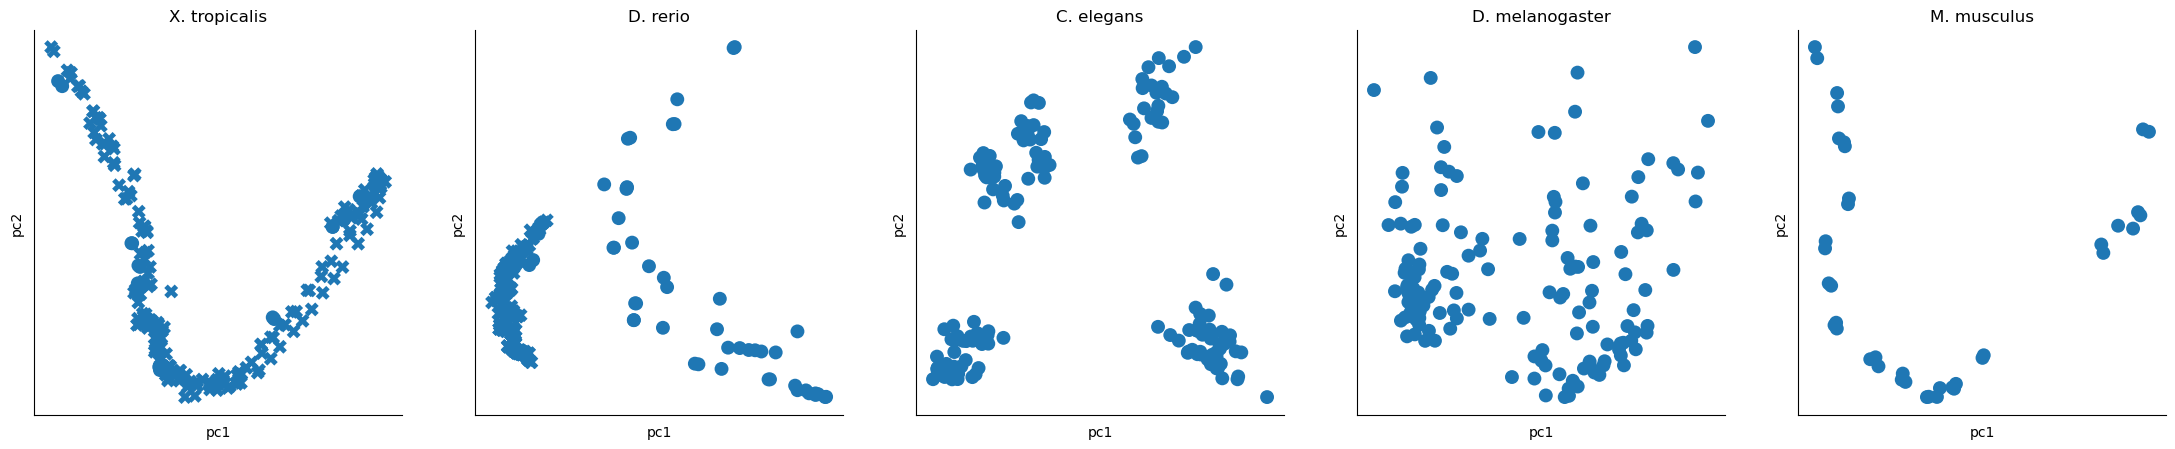

In [6]:
fig, axes = plt.subplots(1, len(assembly2species.keys()), figsize=(5.5*len(assembly2species),5))


def descriptive2stageidx(samplename, samples, assembly):
    stage = samples[(samples["assembly"] == assembly) & (samples["descriptive_name"] == samplename)]["stage"]
    return assembly2stages[assembly].index(stage.values[0])

for i, assembly in enumerate(assembly2species.keys()):
    df = dfs[assembly].copy()
    df.values[:] = scipy.stats.zscore(df, axis=1)
    df = df.dropna()

    pca = PCA(n_components=2)
    df_coding_PCs = pd.DataFrame(pca.fit_transform(df.transpose()))
    df_coding_PCs.columns = ["pc1", "pc2"]
#     df_coding_PCs["sample"] = df.columns
#     df_coding_PCs["stage"] = [descriptive2stageidx(samplename, samples, assembly) for samplename in df_coding_PCs["sample"]]
#     palette = sns.color_palette("Spectral", len(assembly2stages[assembly])).as_hex()
    df_coding_PCs["study"] = [x.split("_")[0] for x in df.columns]

    
    ax = sns.scatterplot(
        x="pc1", 
        y="pc2",
        data=df_coding_PCs,
#         hue="stage",
        s=100,
        ax=axes[i],
#         palette=palette,
        style="study",
        legend=False,
        linewidth=0,
    ).set(title=assembly2species[assembly])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].spines[['right', 'top']].set_visible(False)


# orthogroups

In [7]:
cur = gen_orthodb("../data_new/orthogroups.tsv")
idx = pd.IndexSlice

for assembly, df in dfs.items():
    print(assembly)
    orthogroups = []
    for gene in df.index:
        res = cur.execute(
        f"""
        SELECT genes.orthogroup from 
        ORTHOGROUPS INNER JOIN genes ON ORTHOGROUPS.orthogroup=genes.orthogroup
        WHERE genes.assembly='{assembly}' AND 
        (genes.gene_name ='{gene}' OR genes.gene_id='{gene}')
        """).fetchall()

        assert len(res) <= 1
        if len(res) == 1:
            orthogroups.append((res[0][0], gene))
        else:
            orthogroups.append((None, gene))
    df.index = pd.MultiIndex.from_tuples(orthogroups)
    df.index.set_names(["orthogroup", "gene"], inplace=True)

UCB_Xtro_10.0
GRCz11
ce11
BDGP6.32
GRCm38.p6


# cross species

In [8]:
study_dfs = {
    (species, study): dfs[species2assembly[species]] for species, study in study2stages.keys()
}
study_dfs = {
    (species, study): df[[col for col in df.columns if study in col]] for (species, study), df in study_dfs.items()
}

def descriptive2stage(species, study):
    _samples = samples[samples["assembly"] == species2assembly[species]]
    _samples = _samples[[study in x for x in _samples["descriptive_name"]]]

    return pd.Series(_samples.stage.values,index=_samples.descriptive_name).to_dict()


for (species, study), df in study_dfs.items():
    # take the average over stages
    df_molten = df.melt(ignore_index=False).reset_index()
    
    name2stage = descriptive2stage(species, study)
    df_molten["stage"] = [name2stage[x] for x in df_molten["variable"]]
    study_dfs[(species, study)] = df_molten.groupby(["orthogroup", "gene", "stage"]).mean(numeric_only=True).reset_index().pivot(index=["orthogroup", "gene"], columns="stage")

    # make sure the columns are ordered as in the samples file
    study_dfs[(species, study)].columns = [x for _, x in study_dfs[(species, study)].columns]
    study_dfs[(species, study)] = study_dfs[(species, study)][list(dict.fromkeys(samples[(samples["assembly"] == species2assembly[species]) & (samples["descriptive_name"].str.contains(study))]["stage"]))]

In [9]:
study_dfs

{('X. tropicalis',
  'EXPANDE'):                                        st2       st5        st9       st11  \
 orthogroup    gene                                                           
 N0.HOG0000000 ENSXETG00000001660  0.000000  0.000000   0.000000   0.561477   
               ENSXETG00000004753  0.084021  0.047407   0.043292   0.119845   
               ENSXETG00000005187  0.012395  0.053410   0.000000   0.123902   
               ENSXETG00000008796  0.000000  0.012904   0.056682  13.353416   
               ENSXETG00000008798  3.059905  2.780459   6.085139   3.307474   
 ...                                    ...       ...        ...        ...   
 N0.HOG0025082 ENSXETG00000046366  0.000000  0.000000   0.000000   0.000000   
 N0.HOG0025083 ENSXETG00000046449  0.028836  0.060815   0.088918   0.082940   
 N0.HOG0025084 ENSXETG00000049343  4.923572  9.752123  21.731693  25.363908   
 N0.HOG0025085 ENSXETG00000018647  0.000000  0.000000   0.108219   7.460419   
               ENSXE

# variance over time

In [10]:
bootstraps = 250
bootstrap_df = []

for i, (species, study) in enumerate([
    ("D. rerio", "WHITE"), 
    ("C. elegans", "ZALTS"),
    ("D. melanogaster", "LIU")]):
    
    assembly = species2assembly[species]
    keep_cols = [x for x in dfs[assembly].columns if x.split("_")[0] == study]
    df = dfs[assembly][keep_cols]
    stage2samples = {
        stage: [x for x in df.columns if "_".join(x.split("_")[1:-1]) == stage] for stage in study2stages[(species, study)]
    }

    for stage in study2stages[(species, study)]:
        pretty_stage_name = stage.replace("_", " ").replace("-", " ")
        for bootstrap in range(bootstraps):
            sample1, sample2 = random.sample(stage2samples[stage], 2)
            rho, pval = scipy.stats.spearmanr(df[sample1], df[sample2])
#             rho = jensen_shannon_distance(df[sample1], df[sample2])
            bootstrap_df.append([assembly2species[assembly], pretty_stage_name, rho])

bootstrap_df = pd.DataFrame(bootstrap_df, columns=["assembly", "stage", "spearman"])

bootstrap_df.loc[-1] = ["D. melanogaster", "0 hpf", None]
bootstrap_df.index = bootstrap_df.index + 1
bootstrap_df.sort_index(inplace=True) 

# bootstrap_df

In [11]:
bootstrap_df

assembly      stage  spearman
0     D. melanogaster      0 hpf       NaN
1            D. rerio     1 cell  0.907078
2            D. rerio     1 cell  0.915824
3            D. rerio     1 cell  0.903228
4            D. rerio     1 cell  0.907494
...               ...        ...       ...
8246  D. melanogaster  23 24 hpf  0.750213
8247  D. melanogaster  23 24 hpf  0.711728
8248  D. melanogaster  23 24 hpf  0.586691
8249  D. melanogaster  23 24 hpf  0.815331
8250  D. melanogaster  23 24 hpf  0.616207

[8251 rows x 3 columns]

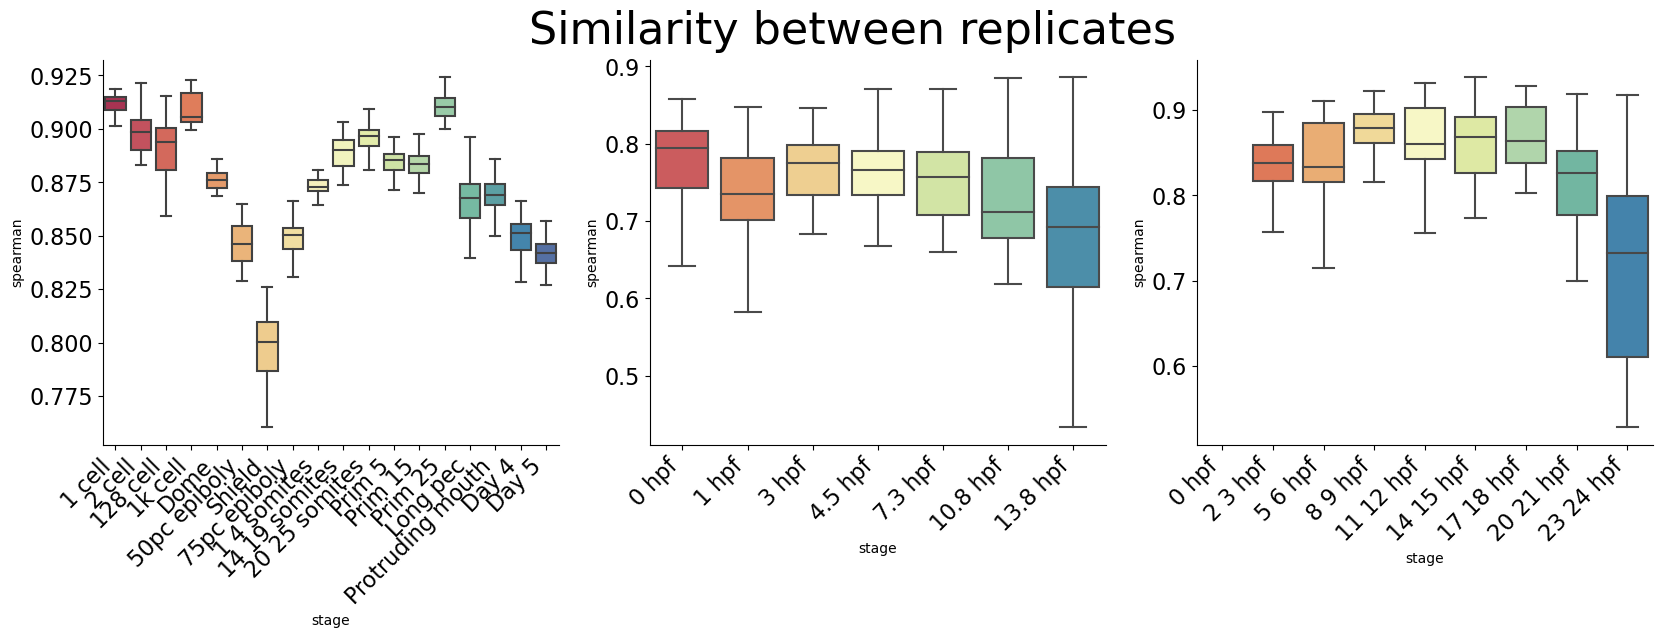

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)

fig.suptitle('Similarity between replicates', fontsize=32)
plt.xticks(rotation=45, ha='right')


for i, (species, study) in enumerate([
    ("D. rerio", "WHITE"), 
    ("C. elegans", "ZALTS"),
    ("D. melanogaster", "LIU")]):
    
    df = bootstrap_df[(bootstrap_df["assembly"] == species)]

    palette = sns.color_palette("Spectral", df["stage"].nunique()).as_hex()

    ax = sns.boxplot(
        x="stage", 
        y="spearman",
        data=df,
        ax=axes[i],
        palette=palette,
        showfliers=False
    ) #.set(title=f"{species}: spearman correlation within stage")
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].spines[['right', 'top']].set_visible(False)
    fontsize = 16
    _ = plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    _ = plt.setp(ax.get_yticklabels(), fontsize=fontsize)

plt.savefig("../imgs/within_timepoint.svg")

In [13]:
import re

frog_owens = dfs["UCB_Xtro_10.0"]
frog_owens = frog_owens[[col for col in frog_owens.columns if "OWENS" in col]]
frog_owens

# take the average over stages
frog_owens = frog_owens.melt(ignore_index=False).reset_index()

frog_owens["stage"] = [re.search("\_(\d*\.?\d*)\_", x).group(1) for x in frog_owens["variable"]]
frog_owens = frog_owens.groupby(["orthogroup", "gene", "stage"]).mean(numeric_only=True).reset_index().pivot(index=["orthogroup", "gene"], columns="stage")

# make sure the columns are ordered as in the samples file
frog_owens.columns = [x for _, x in frog_owens.columns]
frog_owens = frog_owens.reindex(sorted(frog_owens.columns, key=lambda x:float(x)), axis=1)

# remove outlier
frog_owens = frog_owens[[col for col in frog_owens.columns if col != "52"]]

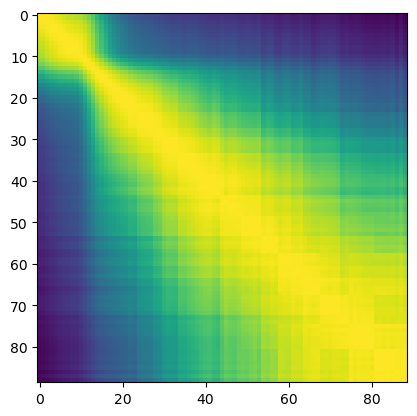

In [14]:
corrs = pairwise_pearson(frog_owens, frog_owens)
plt.imshow(corrs)

'53'

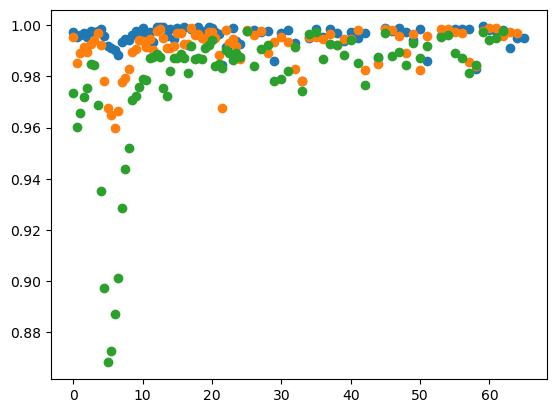

In [15]:
plt.scatter([float(x) for x in frog_owens.columns[:-1]], np.diag(corrs, k=1))
plt.scatter([float(x) for x in frog_owens.columns[:-2]], np.diag(corrs, k=2))
plt.scatter([float(x) for x in frog_owens.columns[:-4]], np.diag(corrs, k=4))

# np.argmin(np.diag(corrs, k=1))

frog_owens.columns[75]

In [16]:
# descriptive2stage = {k: v for k, v in zip(samples["descriptive_name"], samples["stage"])}
# dfs_stages = dict()
# for assembly in assembly2species.keys():
#     # take the average over stages
#     df_molten = dfs[assembly].melt(ignore_index=False).reset_index()
#     df_molten["stage"] = [descriptive2stage[x] for x in df_molten["variable"]]
#     dfs_stages[assembly] = df_molten.groupby(["orthogroup", "gene", "stage"]).mean(numeric_only=True).reset_index().pivot(index=["orthogroup", "gene"], columns="stage")
#     # make sure the columns are ordered as in the samples file
#     dfs_stages[assembly].columns = [x for _, x in dfs_stages[assembly].columns]
#     dfs_stages[assembly] = dfs_stages[assembly][list(dict.fromkeys(samples[samples["assembly"] == assembly]["stage"]))]

# dfs_stages

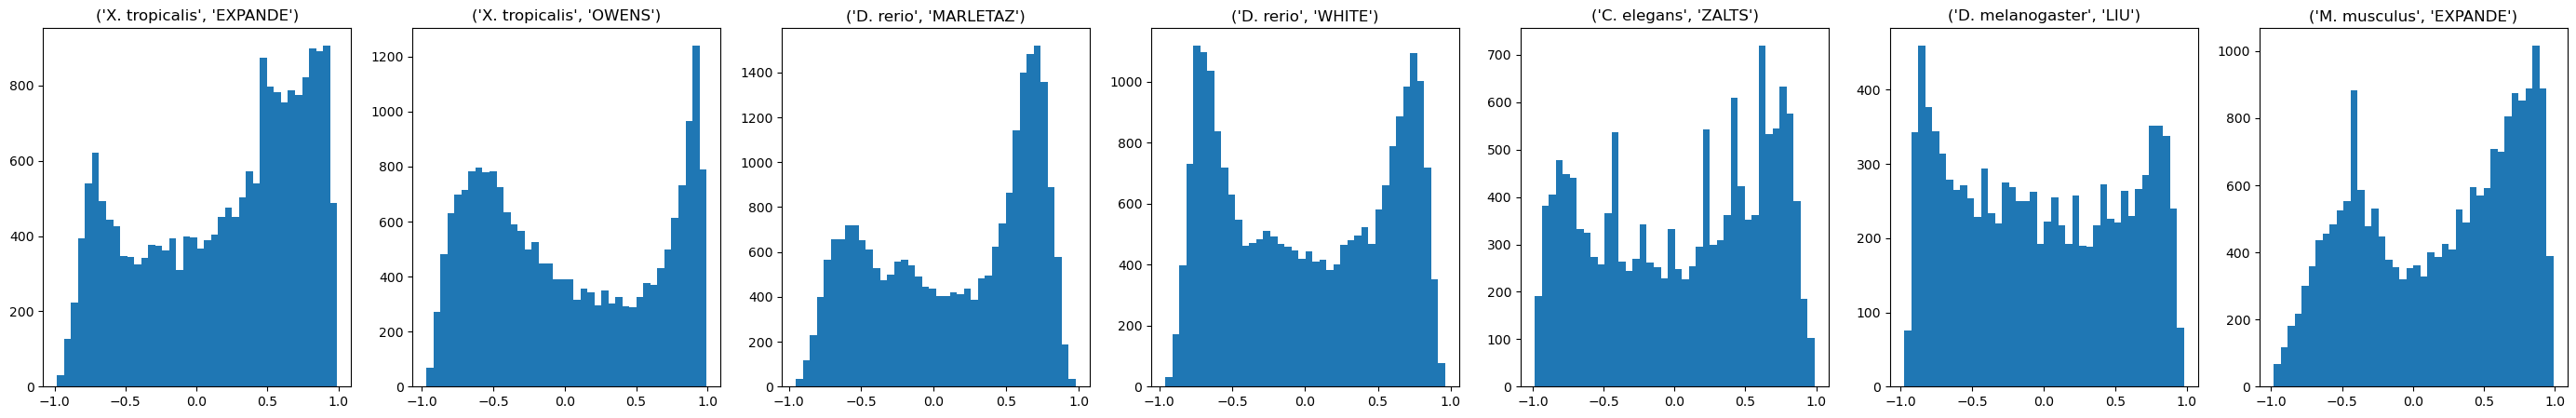

In [17]:
import matplotlib.patches as patches

fig, axes = plt.subplots(1, len(study_dfs.keys()), figsize=(5*len(study_dfs.keys()), 5))

for i, study in enumerate(study_dfs.keys()):
    df = study_dfs[study]

    pred_gene_landscape = gene_landscape(df)

    im = axes[i].hist(pred_gene_landscape["late"], bins=40)
#     im = axes[i].hist2d(pred_gene_landscape["late"], pred_gene_landscape["mid-development"], bins=40, range=[[-1, 1], [-1, 1]])
#     axes[i].set_xlim([-1, 1])
#     axes[i].set_ylim([-1, 1])
#     patch = patches.Circle((0, 0), radius=1, transform=axes[i].transData)
#     im[-1].set_clip_path(patch)
#     axes[i].set_aspect("equal")
    axes[i].set_title(study)
#     break


In [18]:
# fig, axes = plt.subplots(1, len(assembly2species.keys()), figsize=(5.5*len(assembly2species),5))

# for i, assembly in enumerate(assembly2species.keys()):
#     df = dfs_stages[assembly].copy()
#     df = df.groupby(level=0).mean()

#     pred_gene_landscape = gene_landscape(df)
#     _ = axes[i].hist2d(pred_gene_landscape["late"], pred_gene_landscape["mid-development"], bins=40)

('X. tropicalis', 'EXPANDE') ('X. tropicalis', 'EXPANDE')
('X. tropicalis', 'OWENS') ('X. tropicalis', 'EXPANDE')
('X. tropicalis', 'OWENS') ('X. tropicalis', 'OWENS')
('D. rerio', 'MARLETAZ') ('X. tropicalis', 'EXPANDE')
('D. rerio', 'MARLETAZ') ('X. tropicalis', 'OWENS')
('D. rerio', 'MARLETAZ') ('D. rerio', 'MARLETAZ')
('D. rerio', 'WHITE') ('X. tropicalis', 'EXPANDE')
('D. rerio', 'WHITE') ('X. tropicalis', 'OWENS')
('D. rerio', 'WHITE') ('D. rerio', 'MARLETAZ')
('D. rerio', 'WHITE') ('D. rerio', 'WHITE')
('C. elegans', 'ZALTS') ('X. tropicalis', 'EXPANDE')
('C. elegans', 'ZALTS') ('X. tropicalis', 'OWENS')
('C. elegans', 'ZALTS') ('D. rerio', 'MARLETAZ')
('C. elegans', 'ZALTS') ('D. rerio', 'WHITE')
('C. elegans', 'ZALTS') ('C. elegans', 'ZALTS')
('D. melanogaster', 'LIU') ('X. tropicalis', 'EXPANDE')
('D. melanogaster', 'LIU') ('X. tropicalis', 'OWENS')
('D. melanogaster', 'LIU') ('D. rerio', 'MARLETAZ')
('D. melanogaster', 'LIU') ('D. rerio', 'WHITE')
('D. melanogaster', 'LIU') 

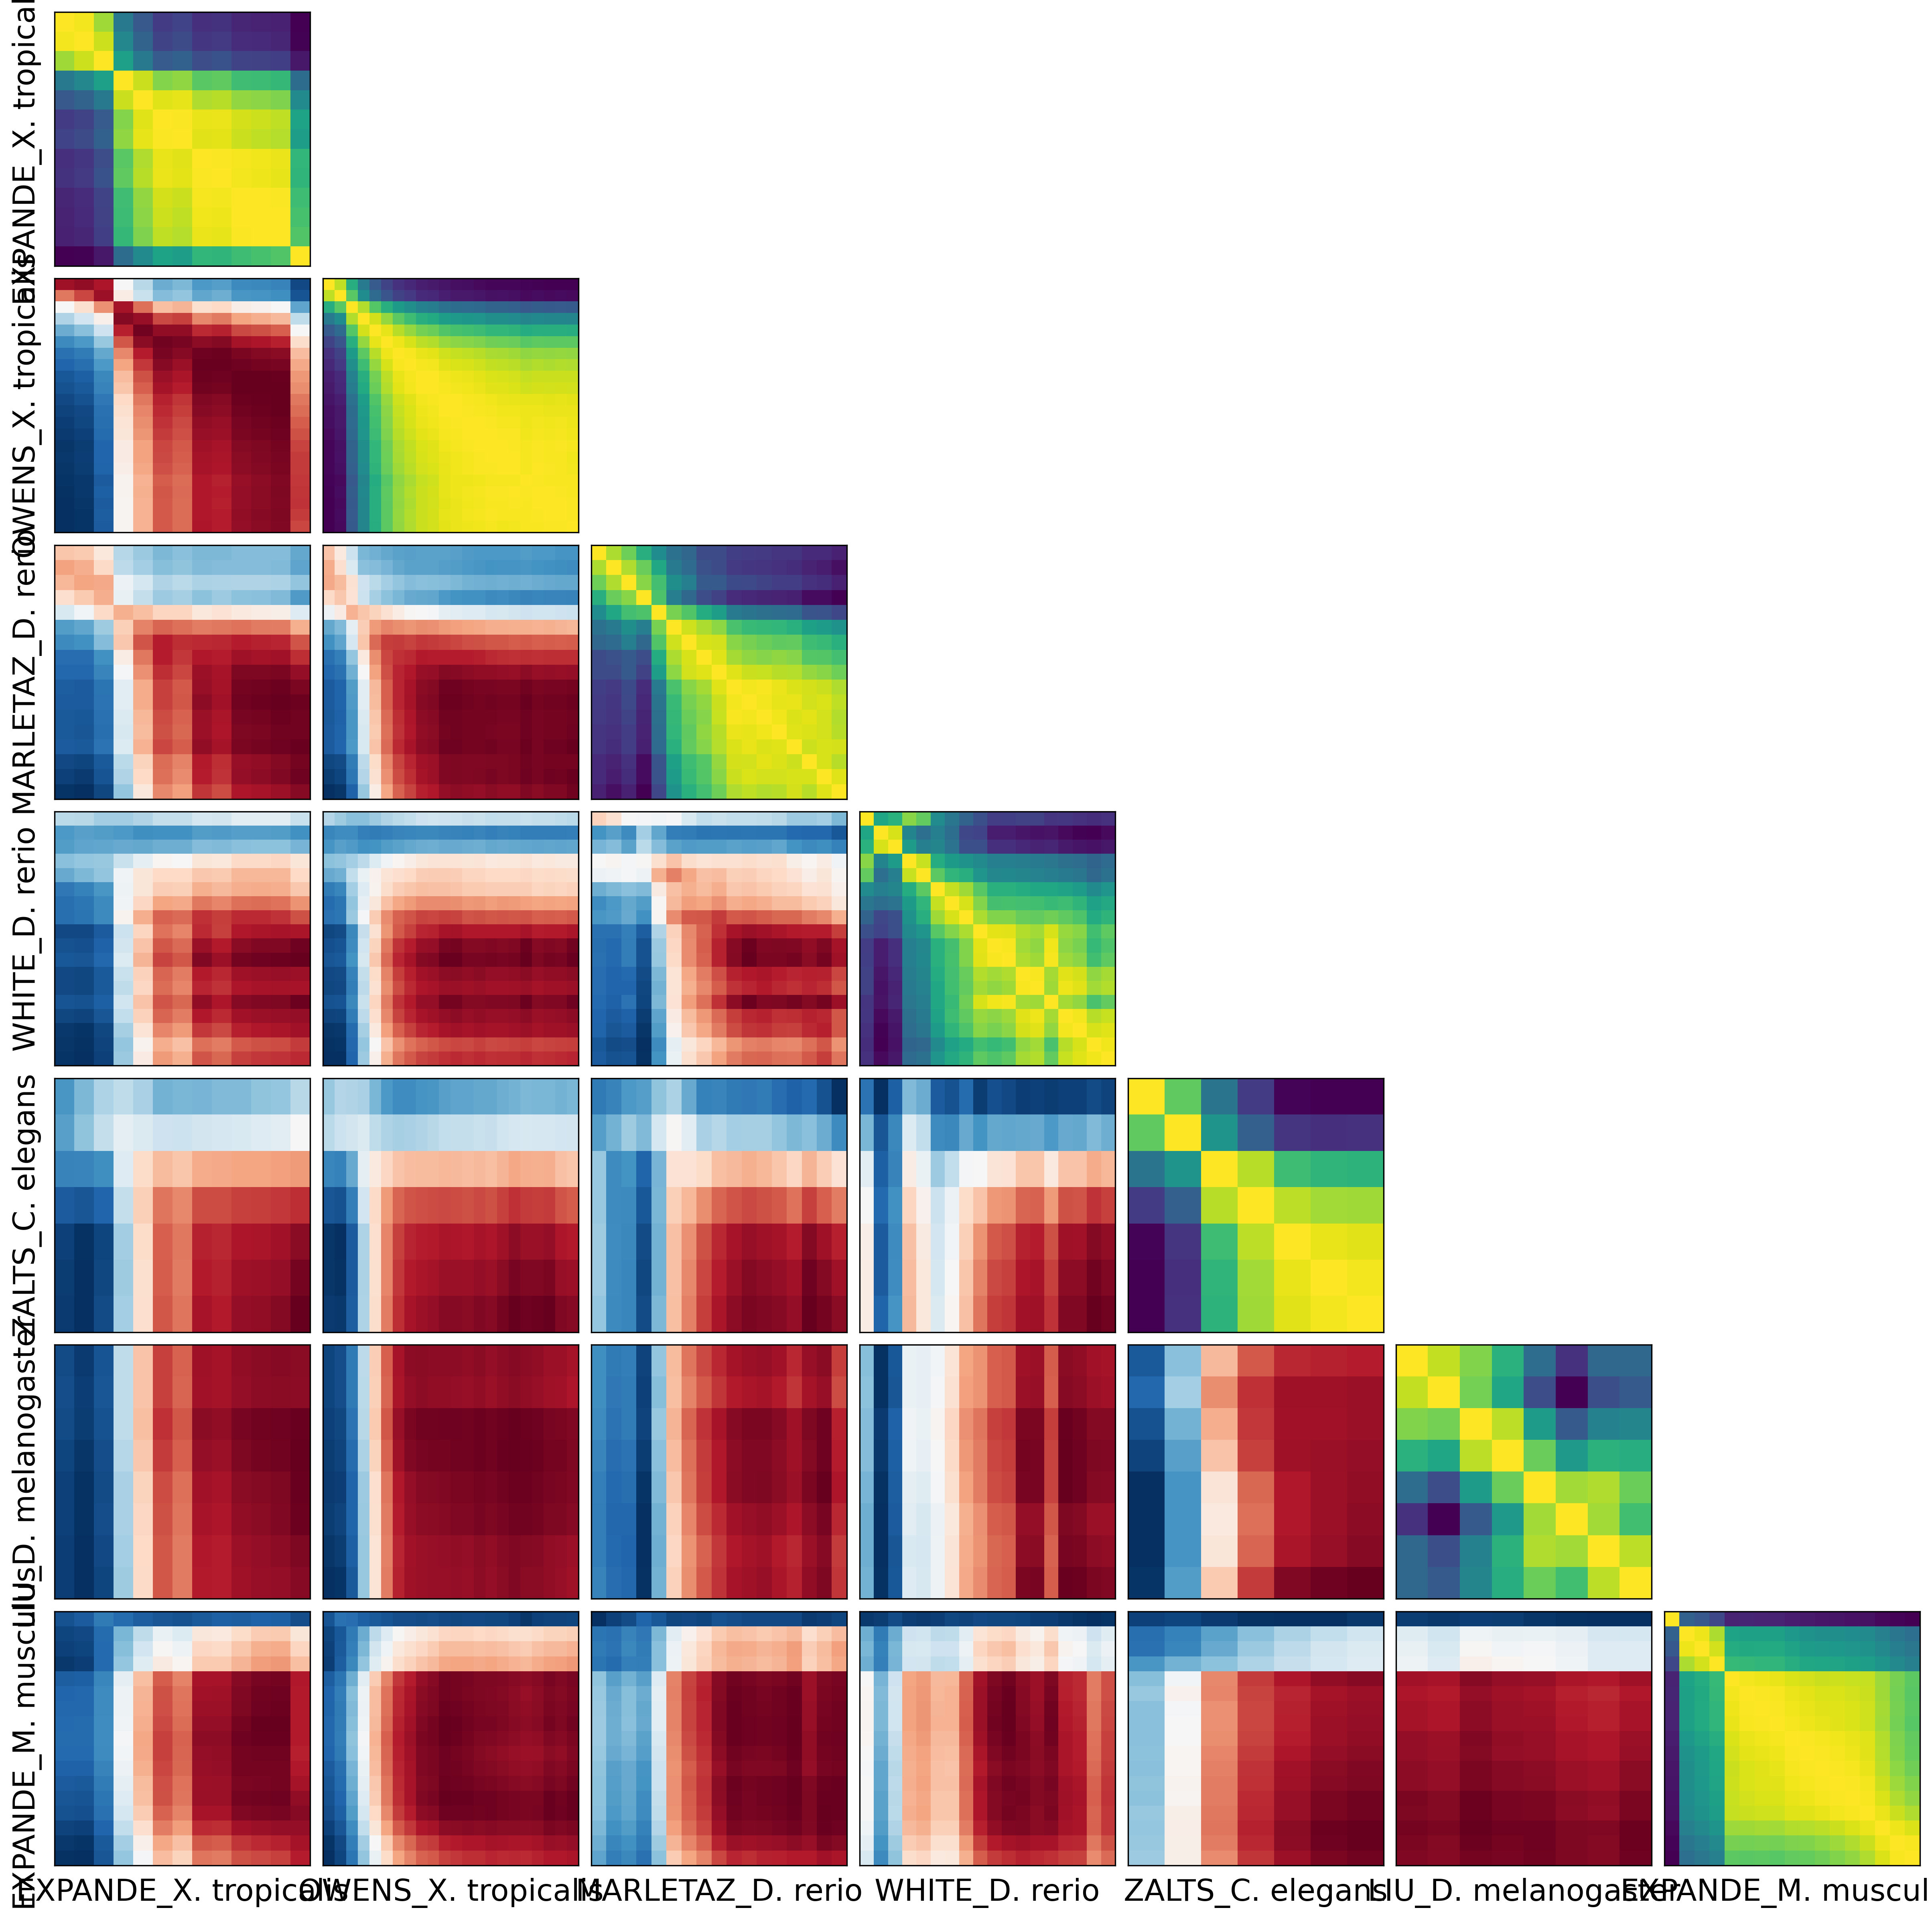

In [19]:
fig, axes = plt.subplots(figsize=(20, 20), nrows=len(study2stages.keys()), ncols=len(study2stages.keys()), dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)


for i, (species_1, study_1) in enumerate(study_dfs.keys()):
    for j, (species_2, study_2) in enumerate(study_dfs.keys()):
        ax = axes[i, j]

        if j > i: 
            ax.axis('off')
            continue
            
        print((species_1, study_1), (species_2, study_2))

        df_X, df_Y = study_dfs[(species_1, study_1)].copy(), study_dfs[(species_2, study_2)].copy()
        
        if i != j or True:
            orthos_X = df_X.index.get_level_values(0)
            orthos_Y = df_Y.index.get_level_values(0)

            # TODO choose:
            # Take mean of all orthogroups
#             shared_orthogroups = list(set(orthos_X).intersection(set(orthos_Y)))

            # Take only one-to-one orthologs
            shared_orthogroups = list(set(orthos_X[~orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[~orthos_Y.duplicated(keep=False)])))

            # Take all orthogroups minus the one-to-one orthologs
#             shared_orthogroups = list(set(orthos_X[orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[orthos_Y.duplicated(keep=False)])))
            
            # keep only the selected orthogroups
            df_X = df_X.loc[shared_orthogroups].groupby(level=0).mean()
            df_Y = df_Y.loc[shared_orthogroups].groupby(level=0).mean()
            
            df_X = qnorm.quantile_normalize(df_X)
            df_Y = qnorm.quantile_normalize(df_Y)
            
#             print(df_X.mean(axis=1))

#         df_X = qnorm.quantile_normalize(df_X)
#         df_Y = qnorm.quantile_normalize(df_Y)
#         df_X.values[:] = df_X.sample(frac=1)
#         df_Y.values[:] = df_Y.sample(frac=1)
        

#         df_X = df_X[df_X.columns[:len(df_X.columns) // 4]]
#         df_Y = df_Y[df_Y.columns[:len(df_Y.columns) // 4]]

#         df_X.values[:] = sklearn.preprocessing.minmax_scale(df_X, axis=1)
#         df_Y.values[:] = sklearn.preprocessing.minmax_scale(df_Y, axis=1)


#         df_X.values[:] = sklearn.preprocessing.minmax_scale(df_X, axis=1)
#         df_Y.values[:] = sklearn.preprocessing.minmax_scale(df_Y, axis=1)

#         df_X.values[:] = scipy.stats.zscore(df_X, axis=1)
#         df_Y.values[:] = scipy.stats.zscore(df_Y, axis=1)
#         correct_orthos = df_X.notnull()[df_X.columns[0]] & df_Y.notnull()[df_Y.columns[0]]
#         df_X = df_X.loc[correct_orthos]
#         df_Y = df_Y.loc[correct_orthos]


        df_X.max(axis="rows")
        corr_matrix = pairwise_pearson(df_X, df_Y)
        
#         corr_matrix = pairwise_jensen_shannon(df_X, df_Y)
#         corr_matrix = pairwise_spearman(df_X, df_Y)
        
        if i == j: 
            ax.imshow(corr_matrix, origin='upper', cmap="viridis", interpolation='None', aspect="auto")#, vmin=0, vmax=1)
        else:
            ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect="auto") # vmin=0, vmax=1)

        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(study_1 + "_" + species_1, fontsize=18)
        if i == len(study2stages.keys()) - 1:
            ax.set_xlabel(study_2 + "_" + species_2, fontsize=18)


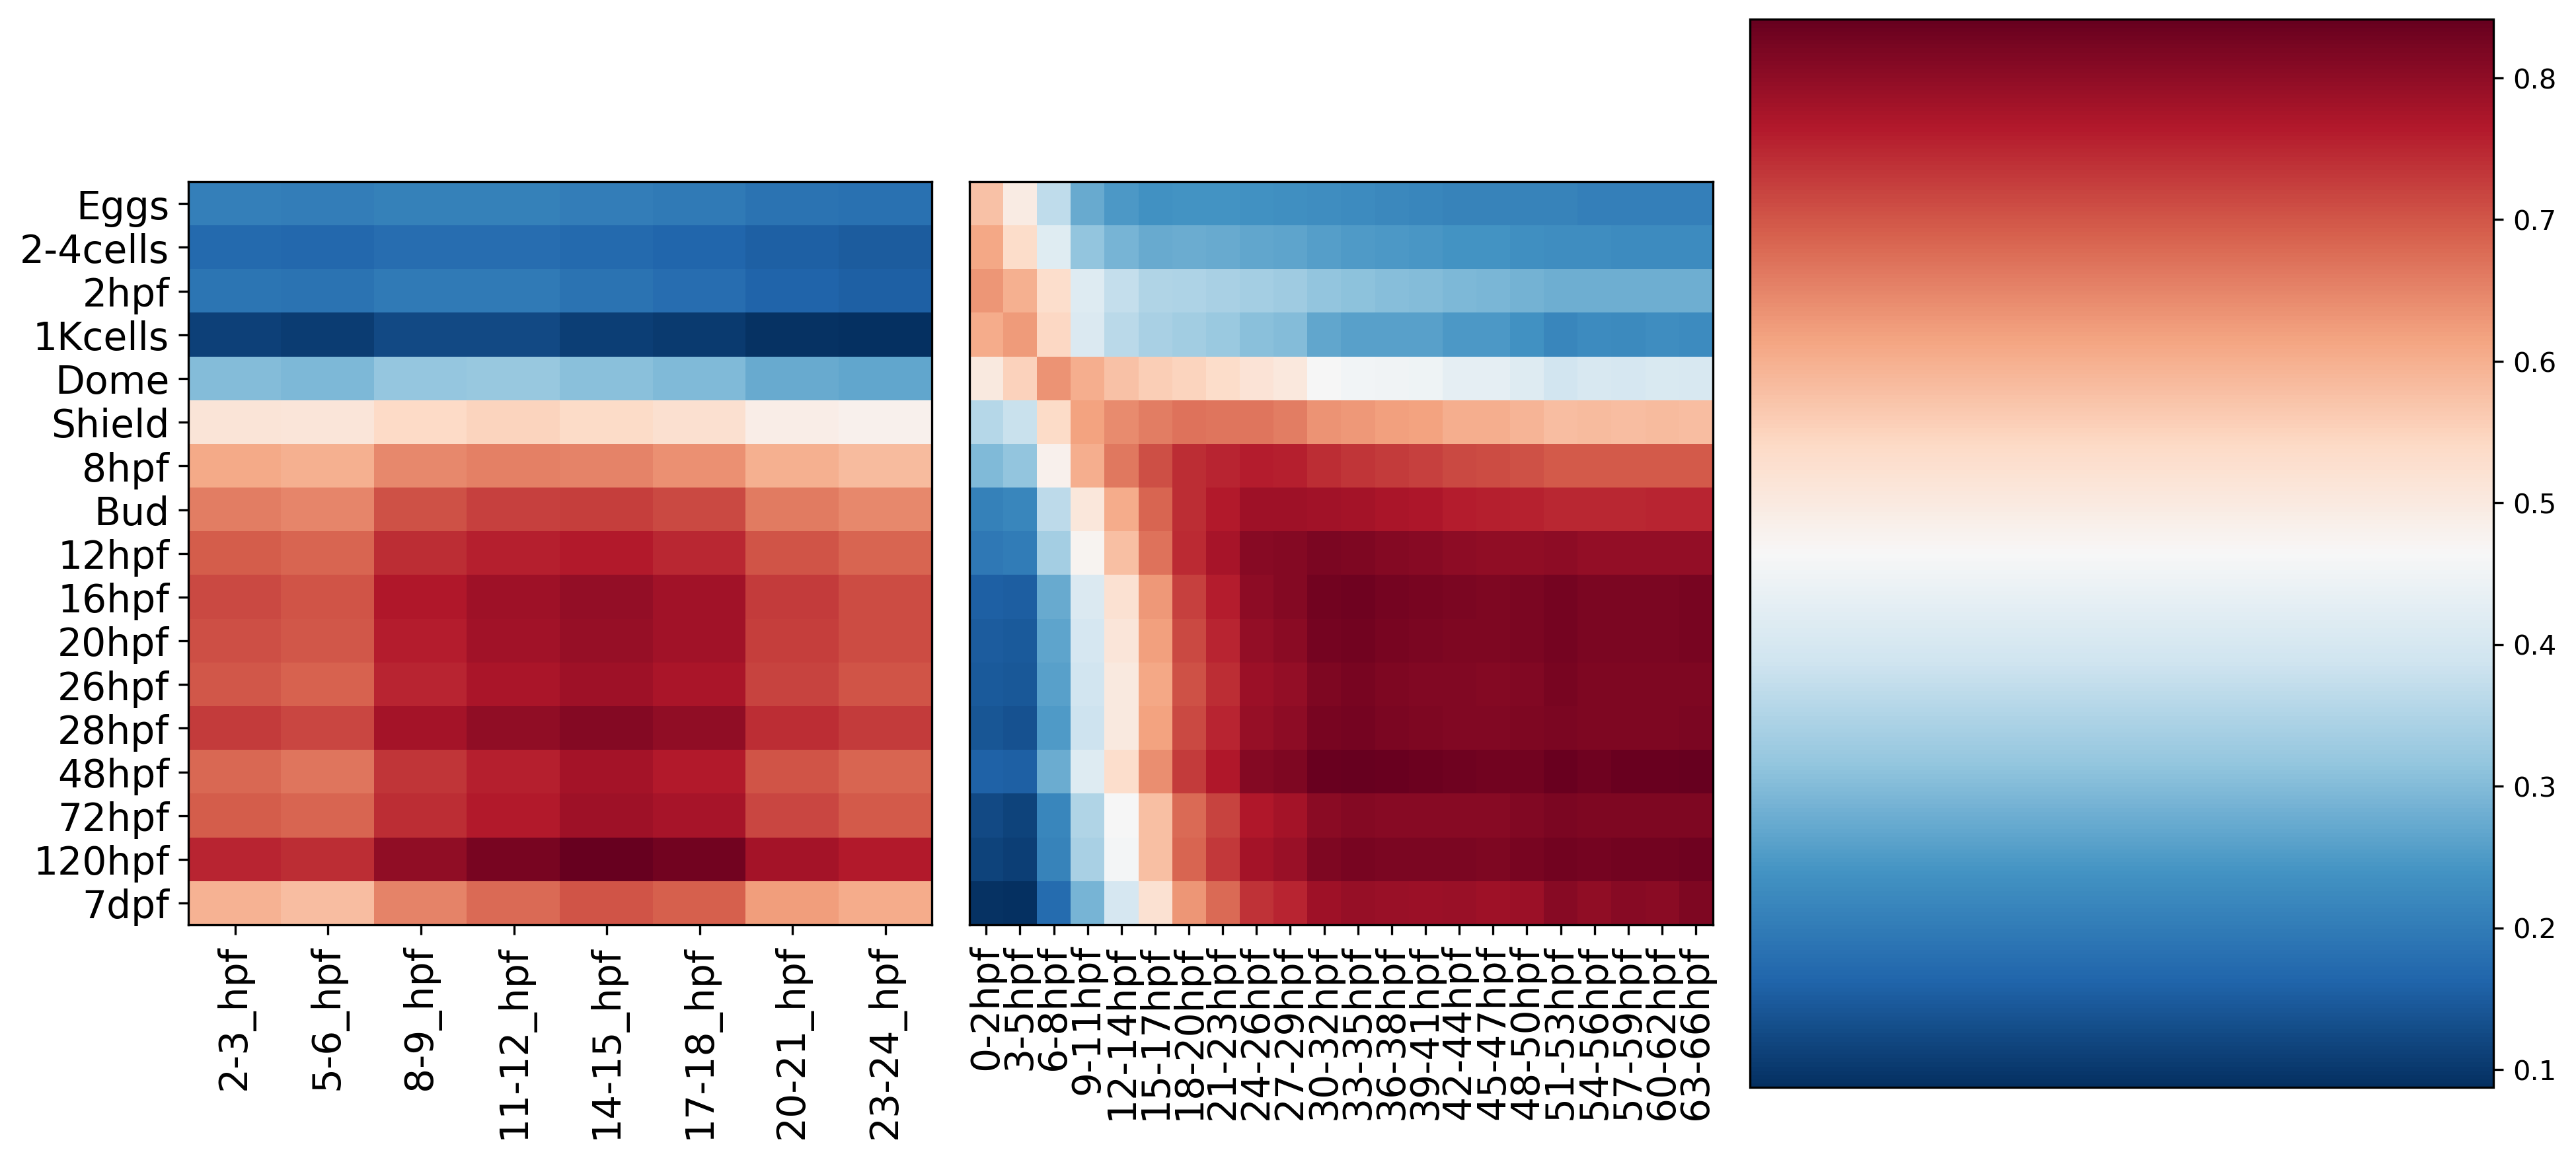

In [20]:
combos = [
    [("D. rerio", "MARLETAZ"), ("D. melanogaster", "LIU")],
    [("D. rerio", "MARLETAZ"), ("X. tropicalis", "OWENS")],
]

# combos = [
#     [("D. rerio", "WHITE"), ("C. elegans", "ZALTS")],
#     [("D. rerio", "WHITE"), ("M. musculus", "EXPANDE")],
# ]

fig, axes = plt.subplots(figsize=(15, 7), nrows=1, ncols=3, dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)



for i, ((species_1, study_1), (species_2, study_2)) in enumerate(combos):
    ax = axes[i]

    df_X, df_Y = study_dfs[(species_1, study_1)].copy(), study_dfs[(species_2, study_2)].copy()

    # keep one to one orthologs
    orthos_X = df_X.index.get_level_values(0)
    orthos_Y = df_Y.index.get_level_values(0)
    shared_orthogroups = list(set(orthos_X[~orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[~orthos_Y.duplicated(keep=False)])))
    df_X = df_X.loc[shared_orthogroups].groupby(level=0).mean()
    df_Y = df_Y.loc[shared_orthogroups].groupby(level=0).mean()

#     df_X.values[:] = scipy.stats.zscore(df_X, axis=1)
#     df_Y.values[:] = scipy.stats.zscore(df_Y, axis=1)
    correct_orthos = df_X.notnull()[df_X.columns[0]] & df_Y.notnull()[df_Y.columns[0]]
    df_X = df_X.loc[correct_orthos]
    df_Y = df_Y.loc[correct_orthos]

    corr_matrix = pairwise_pearson(df_X, df_Y)

    stages_X = df_X.columns
    stages_Y = df_Y.columns

    img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect=len(stages_Y)/len(stages_X)) #, vmin=-0.5, vmax=0.5)

    ax.set_xticks([])
    ax.set_yticks([])
    if i == 0:
        ax.set_yticks(range(len(stages_X)))
        ax.set_yticklabels(stages_X)
    ax.set_xticks(range(len(stages_Y)))
    ax.set_xticklabels(stages_Y)

    fontsize = 14
    _ = plt.setp(ax.get_xticklabels(), rotation=90, ha='center', fontsize=fontsize)
    _ = plt.setp(ax.get_yticklabels(), fontsize=fontsize)

plt.colorbar(img, axes[2], aspect=5)
plt.savefig("../imgs/within_between_phyla.svg")

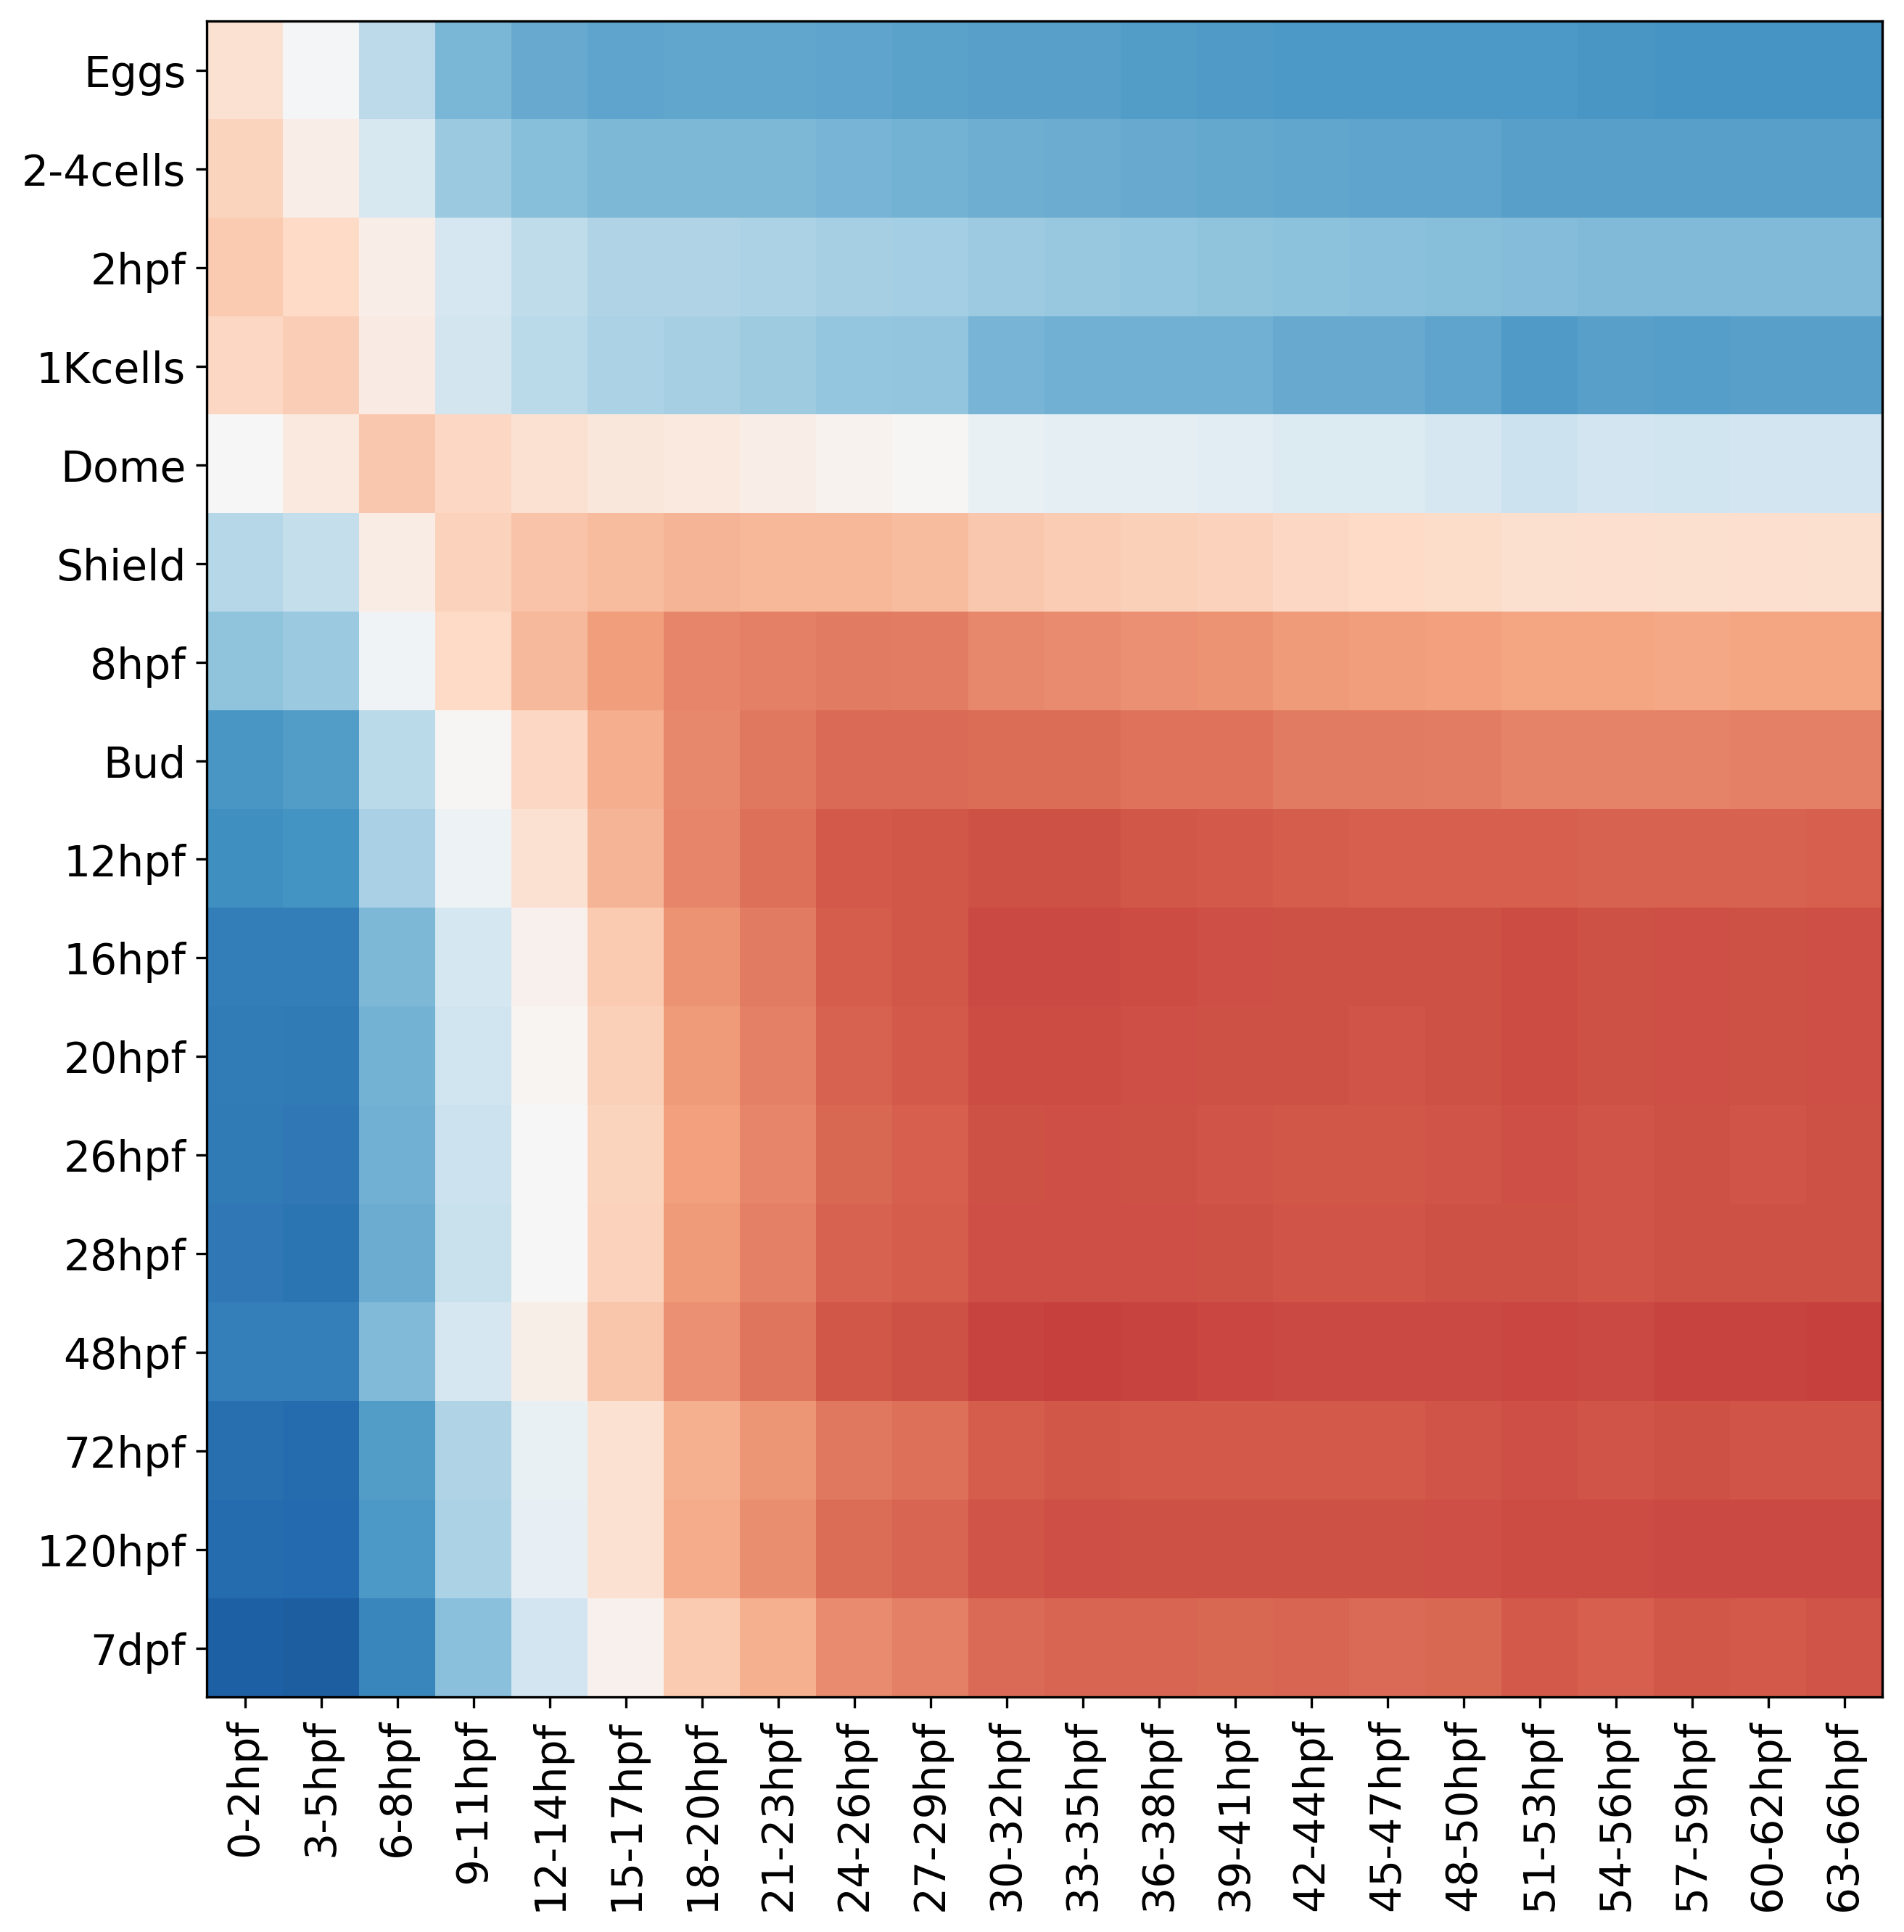

In [29]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1, dpi=300)

orthos_xenopus = study_dfs[("X. tropicalis", "OWENS")].index.get_level_values(0)
orthos_zebrafish = study_dfs[("D. rerio", "MARLETAZ")].index.get_level_values(0)

shared_orthogroups = list(
    set(orthos_xenopus[~orthos_xenopus.duplicated(keep=False)]).intersection(
        set(orthos_zebrafish[~orthos_zebrafish.duplicated(keep=False)])))

df_X = study_dfs[("D. rerio", "MARLETAZ")].loc[shared_orthogroups].groupby(level=0).mean()
df_Y = study_dfs[("X. tropicalis", "OWENS")].loc[shared_orthogroups].groupby(level=0).mean()

corr_matrix = pairwise_pearson(df_X, df_Y)

img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect=len(df_Y.columns)/len(df_X.columns), vmin=0, vmax=1)
ax.set_yticks(range(len(df_X.columns)))
ax.set_yticklabels(df_X.columns)
ax.set_xticks(range(len(df_Y.columns)))
ax.set_xticklabels(df_Y.columns)

fontsize = 14
_ = plt.setp(ax.get_xticklabels(), rotation=90, ha='center', fontsize=fontsize)
_ = plt.setp(ax.get_yticklabels(), fontsize=fontsize)

plt.savefig("../imgs/non_standardized.svg")

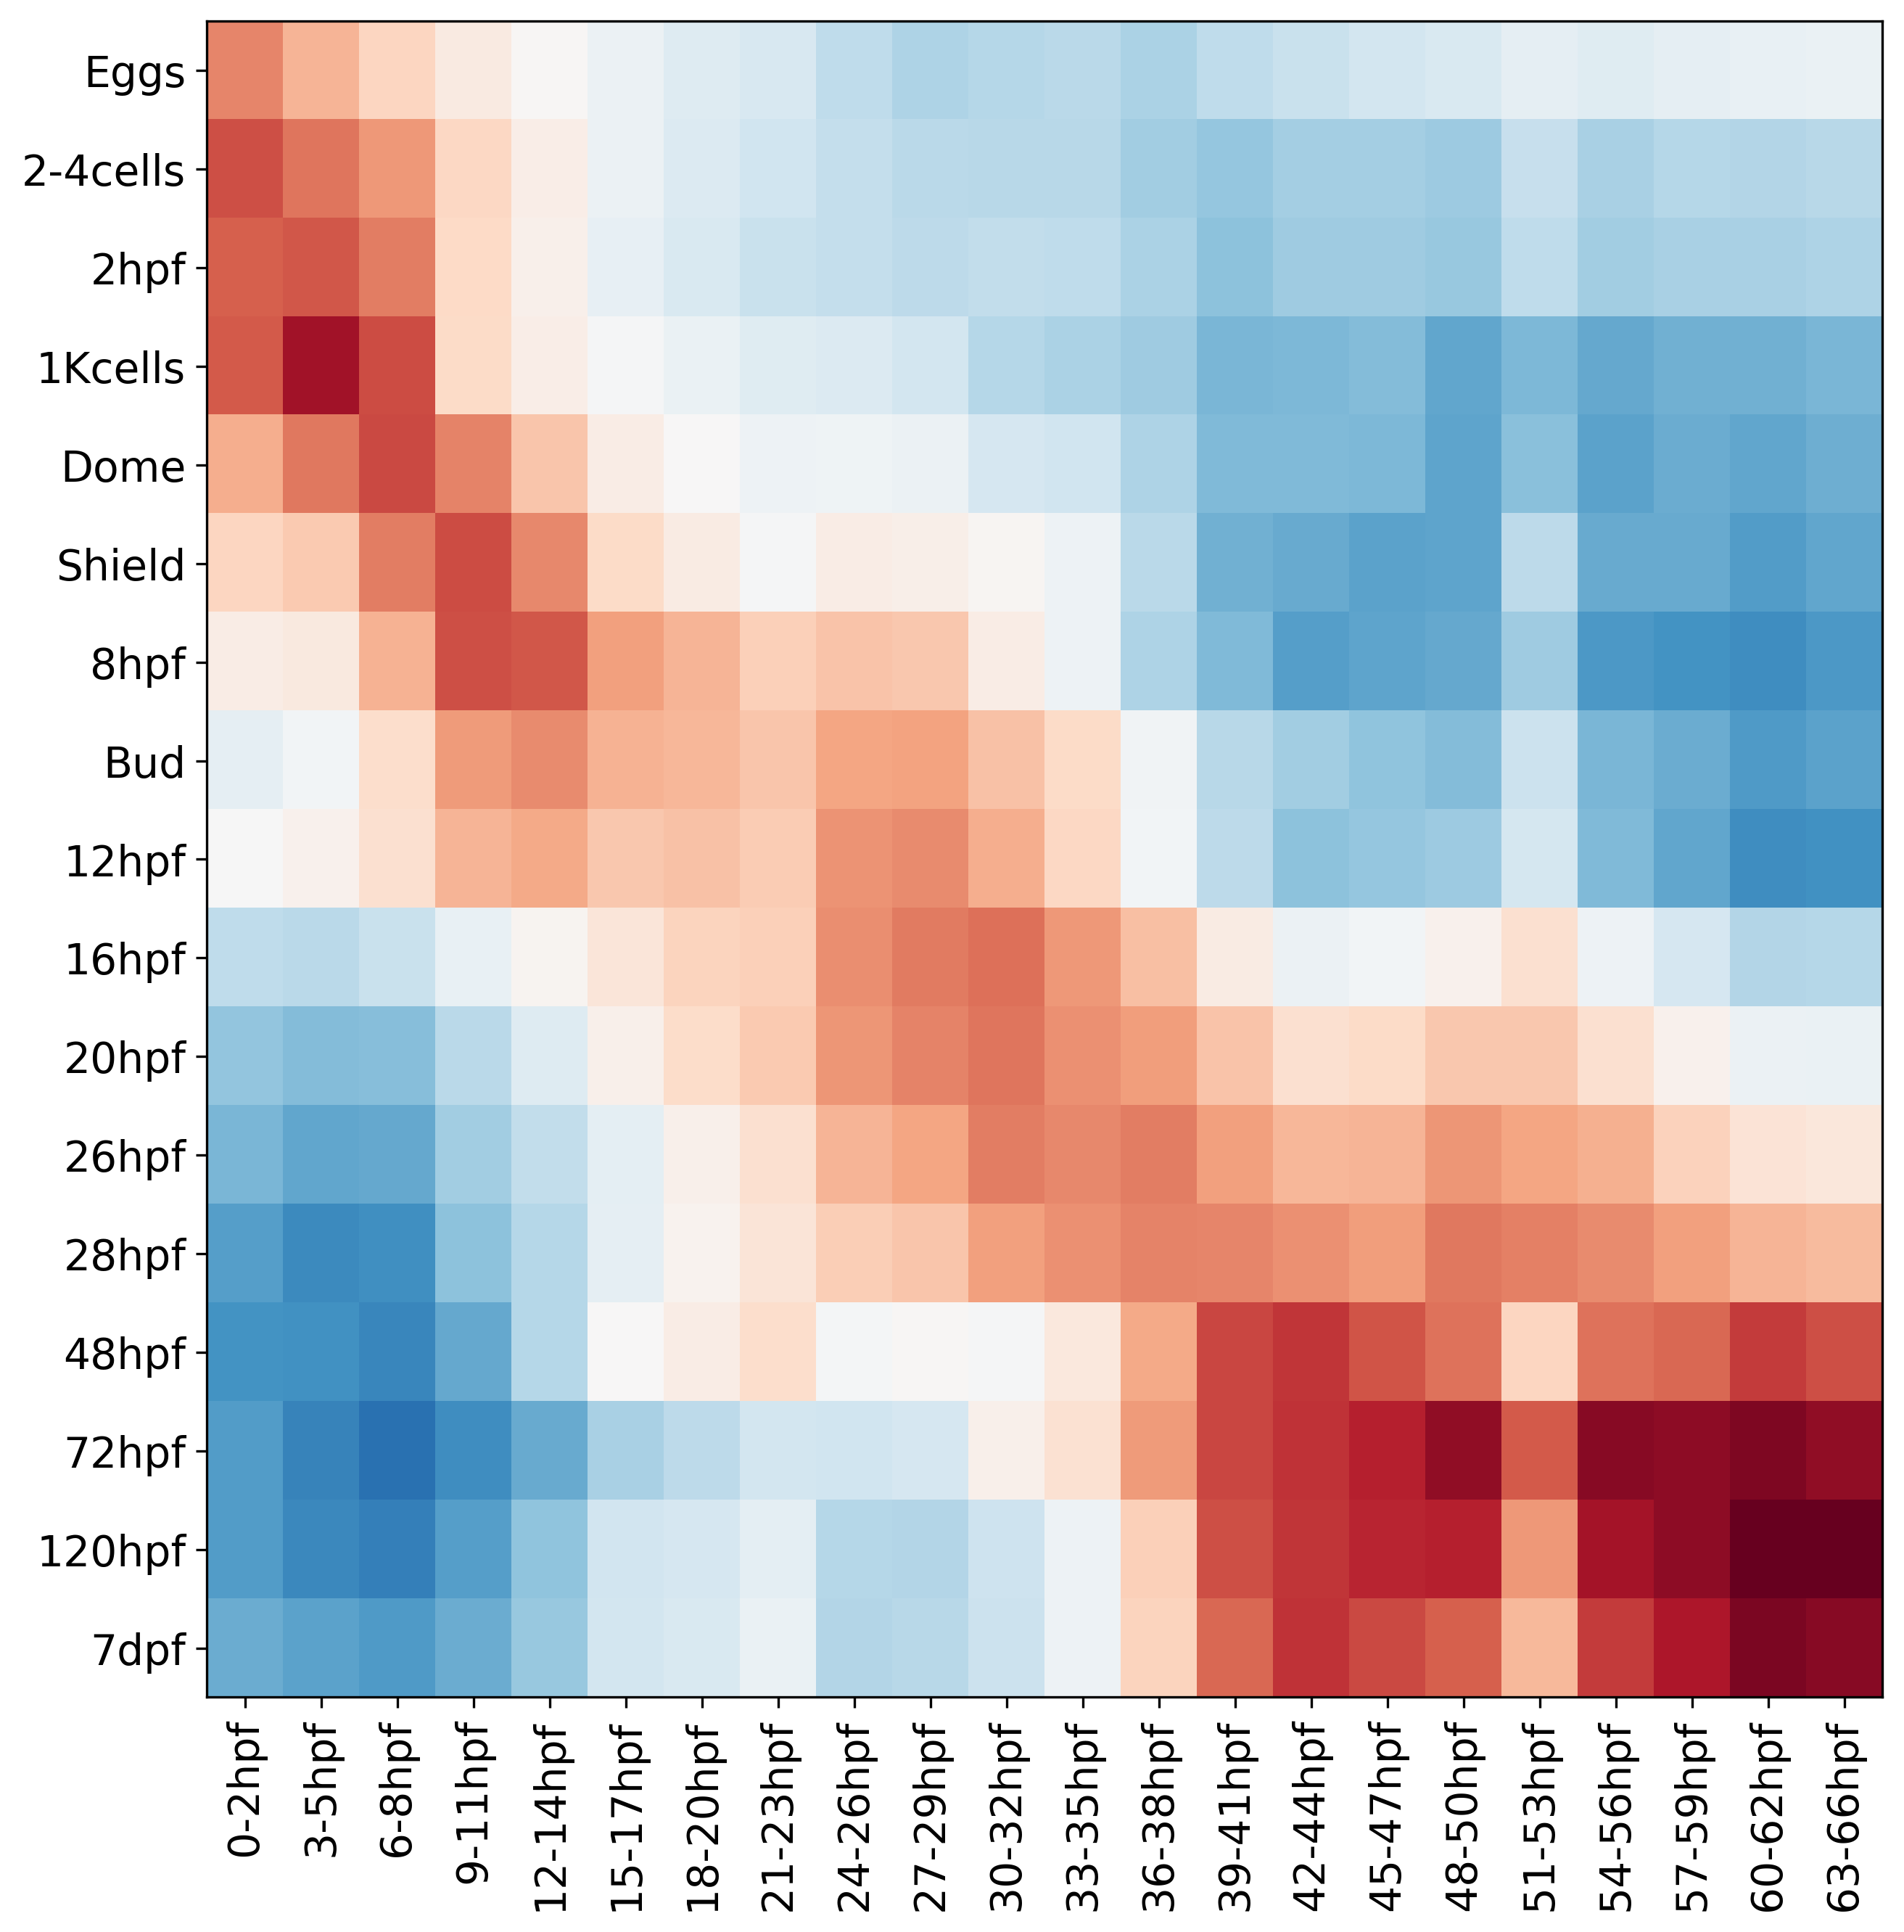

In [30]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1, dpi=300)

orthos_xenopus = study_dfs[("X. tropicalis", "OWENS")].index.get_level_values(0)
orthos_zebrafish = study_dfs[("D. rerio", "MARLETAZ")].index.get_level_values(0)

shared_orthogroups = list(
    set(orthos_xenopus[~orthos_xenopus.duplicated(keep=False)]).intersection(
        set(orthos_zebrafish[~orthos_zebrafish.duplicated(keep=False)])))

df_X = study_dfs[("D. rerio", "MARLETAZ")].loc[shared_orthogroups].groupby(level=0).mean()
df_Y = study_dfs[("X. tropicalis", "OWENS")].loc[shared_orthogroups].groupby(level=0).mean()

df_X.values[:] = scipy.stats.zscore(df_X, axis=1)
df_Y.values[:] = scipy.stats.zscore(df_Y, axis=1)
correct_orthos = df_X.notnull()[df_X.columns[0]] & df_Y.notnull()[df_Y.columns[0]]
df_X = df_X.loc[correct_orthos]
df_Y = df_Y.loc[correct_orthos]


corr_matrix = pairwise_pearson(df_X, df_Y)

img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect=len(df_Y.columns)/len(df_X.columns), vmin=-0.5, vmax=0.5)
ax.set_yticks(range(len(df_X.columns)))
ax.set_yticklabels(df_X.columns)
ax.set_xticks(range(len(df_Y.columns)))
ax.set_xticklabels(df_Y.columns)

fontsize = 14
_ = plt.setp(ax.get_xticklabels(), rotation=90, ha='center', fontsize=fontsize)
_ = plt.setp(ax.get_yticklabels(), fontsize=fontsize)

plt.savefig("../imgs/standardized.svg")

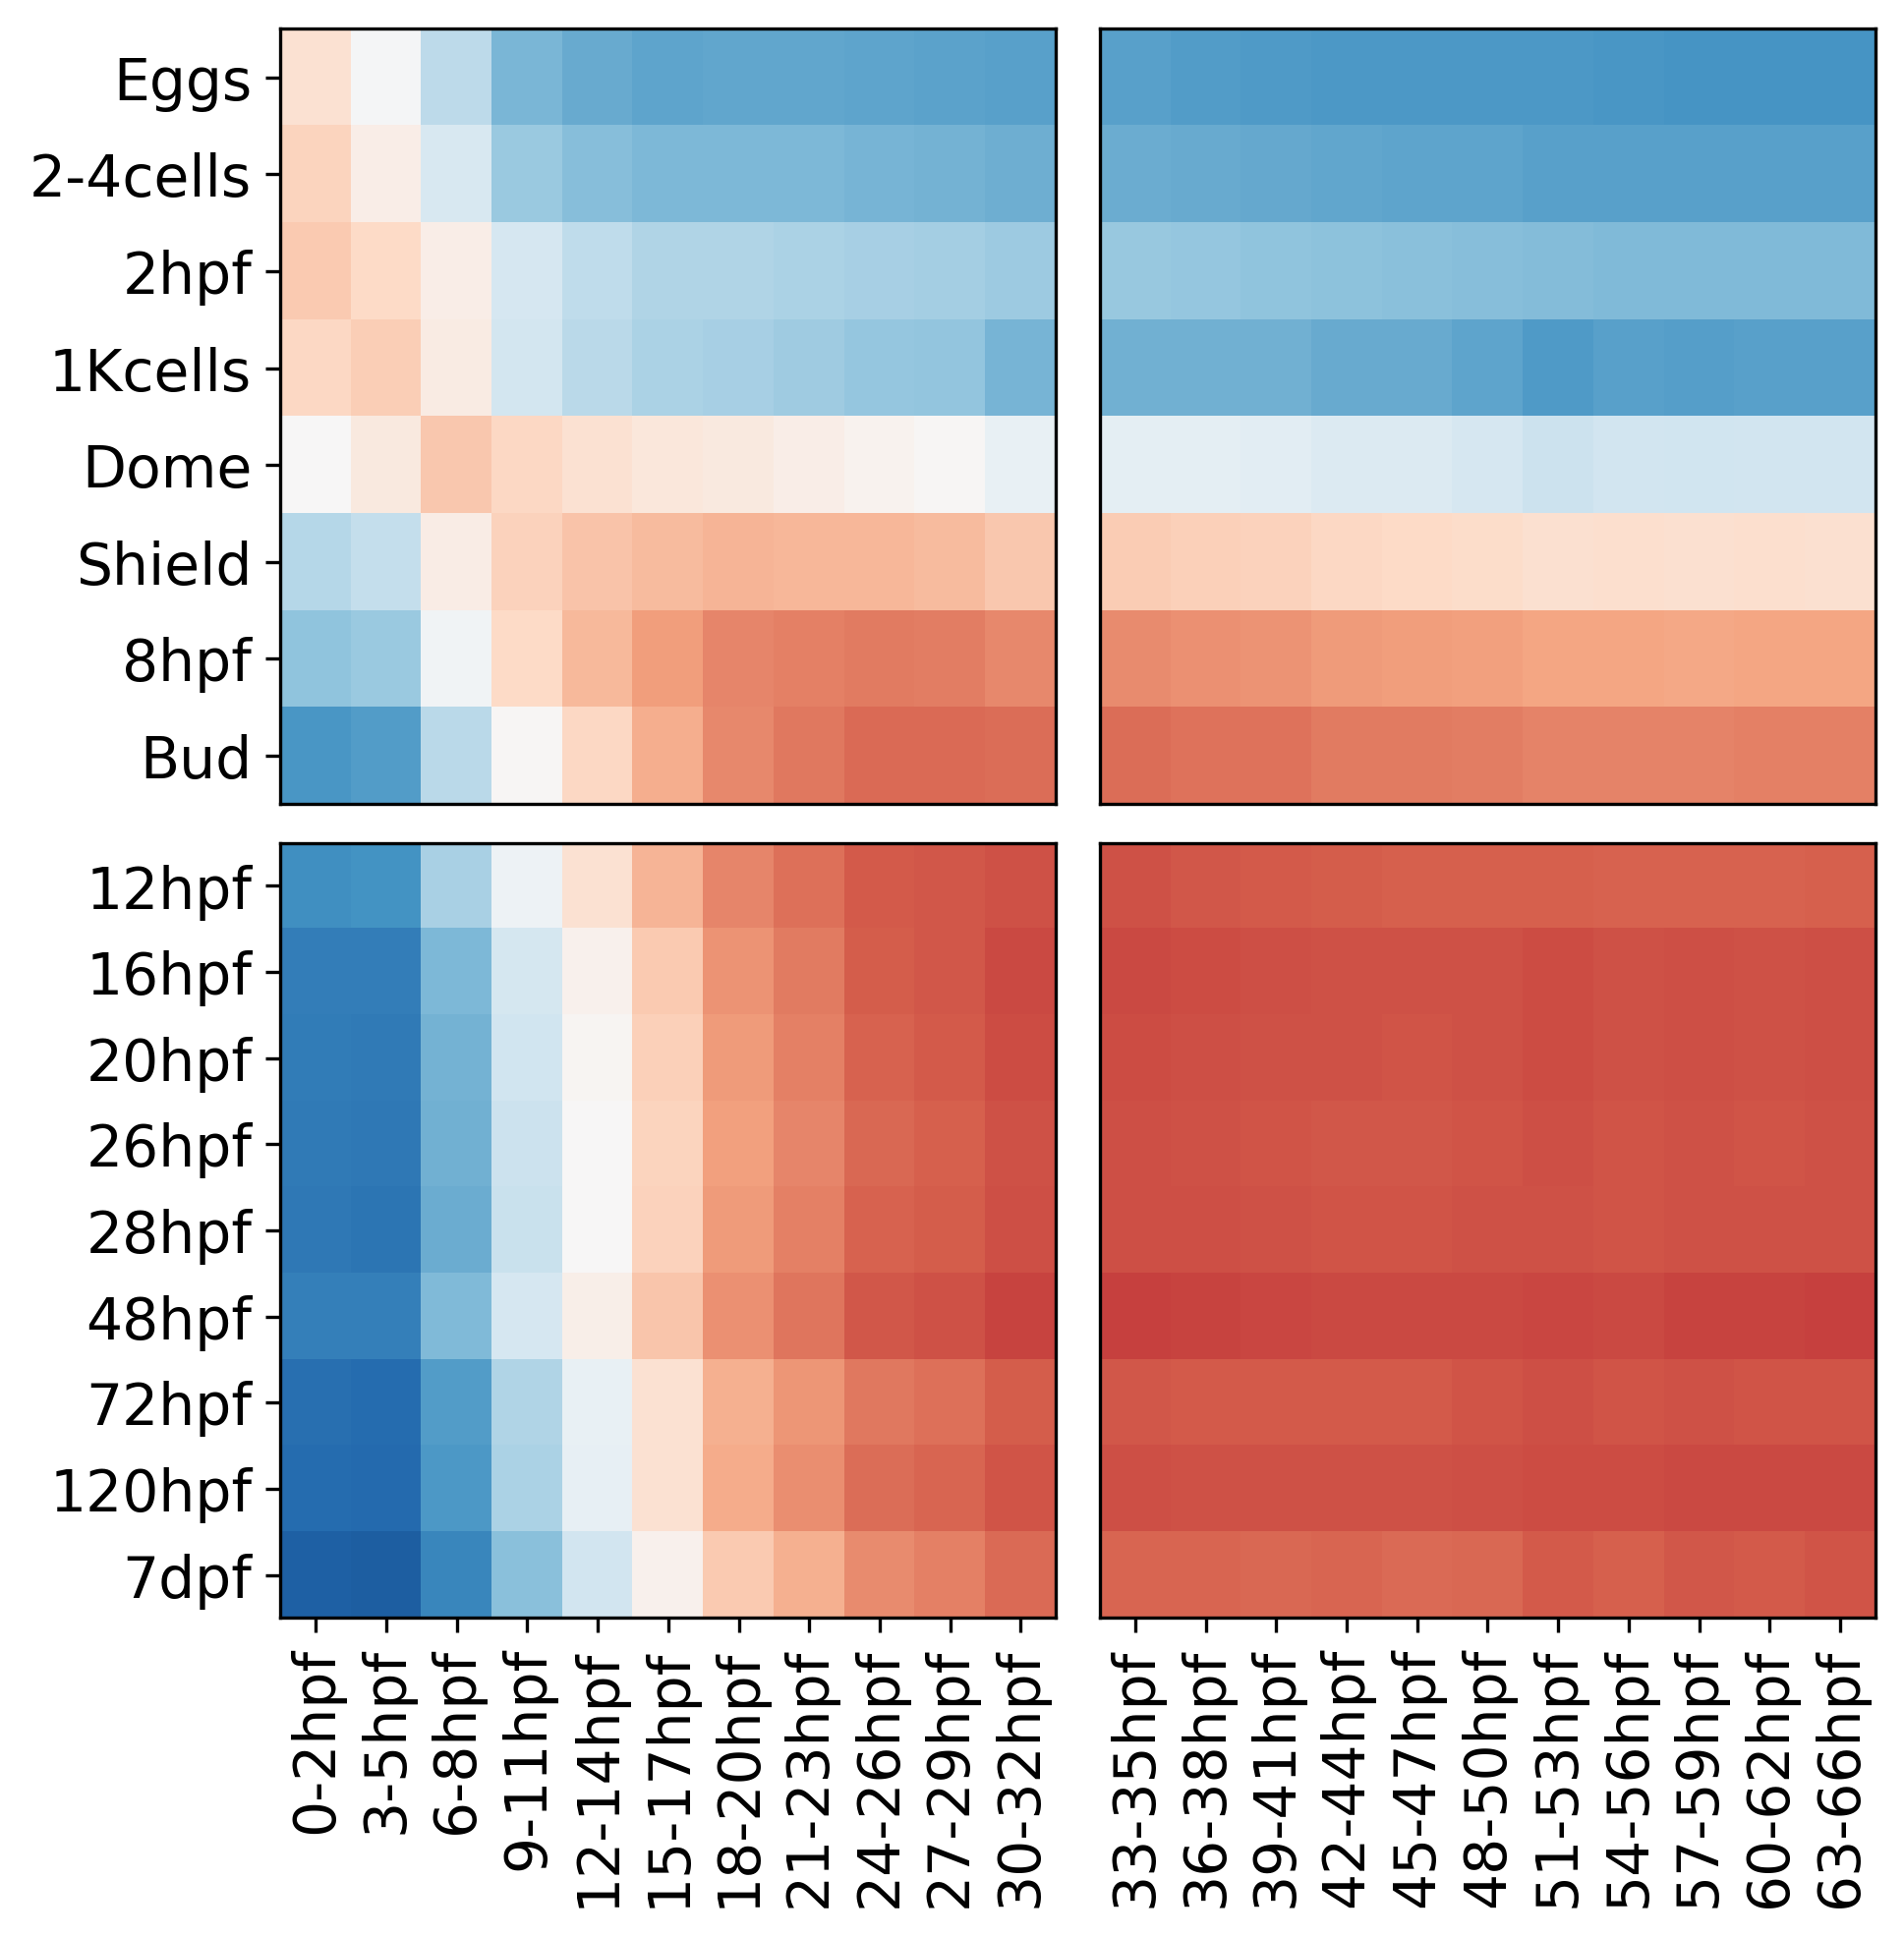

In [21]:
combo = ("D. rerio", "MARLETAZ"), ("X. tropicalis", "OWENS")

fig, axes = plt.subplots(figsize=(7, 7), nrows=2, ncols=2, dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)

df_X, df_Y = study_dfs[combo[0]].copy(), study_dfs[combo[1]].copy()

# keep one to one orthologs
orthos_X = df_X.index.get_level_values(0)
orthos_Y = df_Y.index.get_level_values(0)
shared_orthogroups = list(set(orthos_X[~orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[~orthos_Y.duplicated(keep=False)])))
df_X_orig = df_X.loc[shared_orthogroups].groupby(level=0).mean()
df_Y_orig = df_Y.loc[shared_orthogroups].groupby(level=0).mean()

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        
        if i == 0:
            df_X = df_X_orig[df_X_orig.columns[:len(df_X_orig.columns) // 2]]
        else:
            df_X = df_X_orig[df_X_orig.columns[len(df_X_orig.columns) // 2:]]

        if j == 0:
            df_Y = df_Y_orig[df_Y_orig.columns[:len(df_Y_orig.columns) // 2]]
        else:
            df_Y = df_Y_orig[df_Y_orig.columns[len(df_Y_orig.columns) // 2:]]

#         df_X.values[:] = scipy.stats.zscore(df_X, axis=1)
#         df_Y.values[:] = scipy.stats.zscore(df_Y, axis=1)
        correct_orthos = df_X.notnull()[df_X.columns[0]] & df_Y.notnull()[df_Y.columns[0]]
        df_X = df_X.loc[correct_orthos]
        df_Y = df_Y.loc[correct_orthos]

        corr_matrix = pairwise_pearson(df_X, df_Y)

        stages_X = df_X.columns
        stages_Y = df_Y.columns

        img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect=len(stages_Y)/len(stages_X), vmin=0, vmax=1)
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_yticks(range(len(stages_X)))
            ax.set_yticklabels(stages_X)
        if i == 1:
            ax.set_xticks(range(len(stages_Y)))
            ax.set_xticklabels(stages_Y)

        fontsize = 14
        _ = plt.setp(ax.get_xticklabels(), rotation=90, ha='center', fontsize=fontsize)
        _ = plt.setp(ax.get_yticklabels(), fontsize=fontsize)

plt.savefig("../imgs/inverse_first_half.svg")

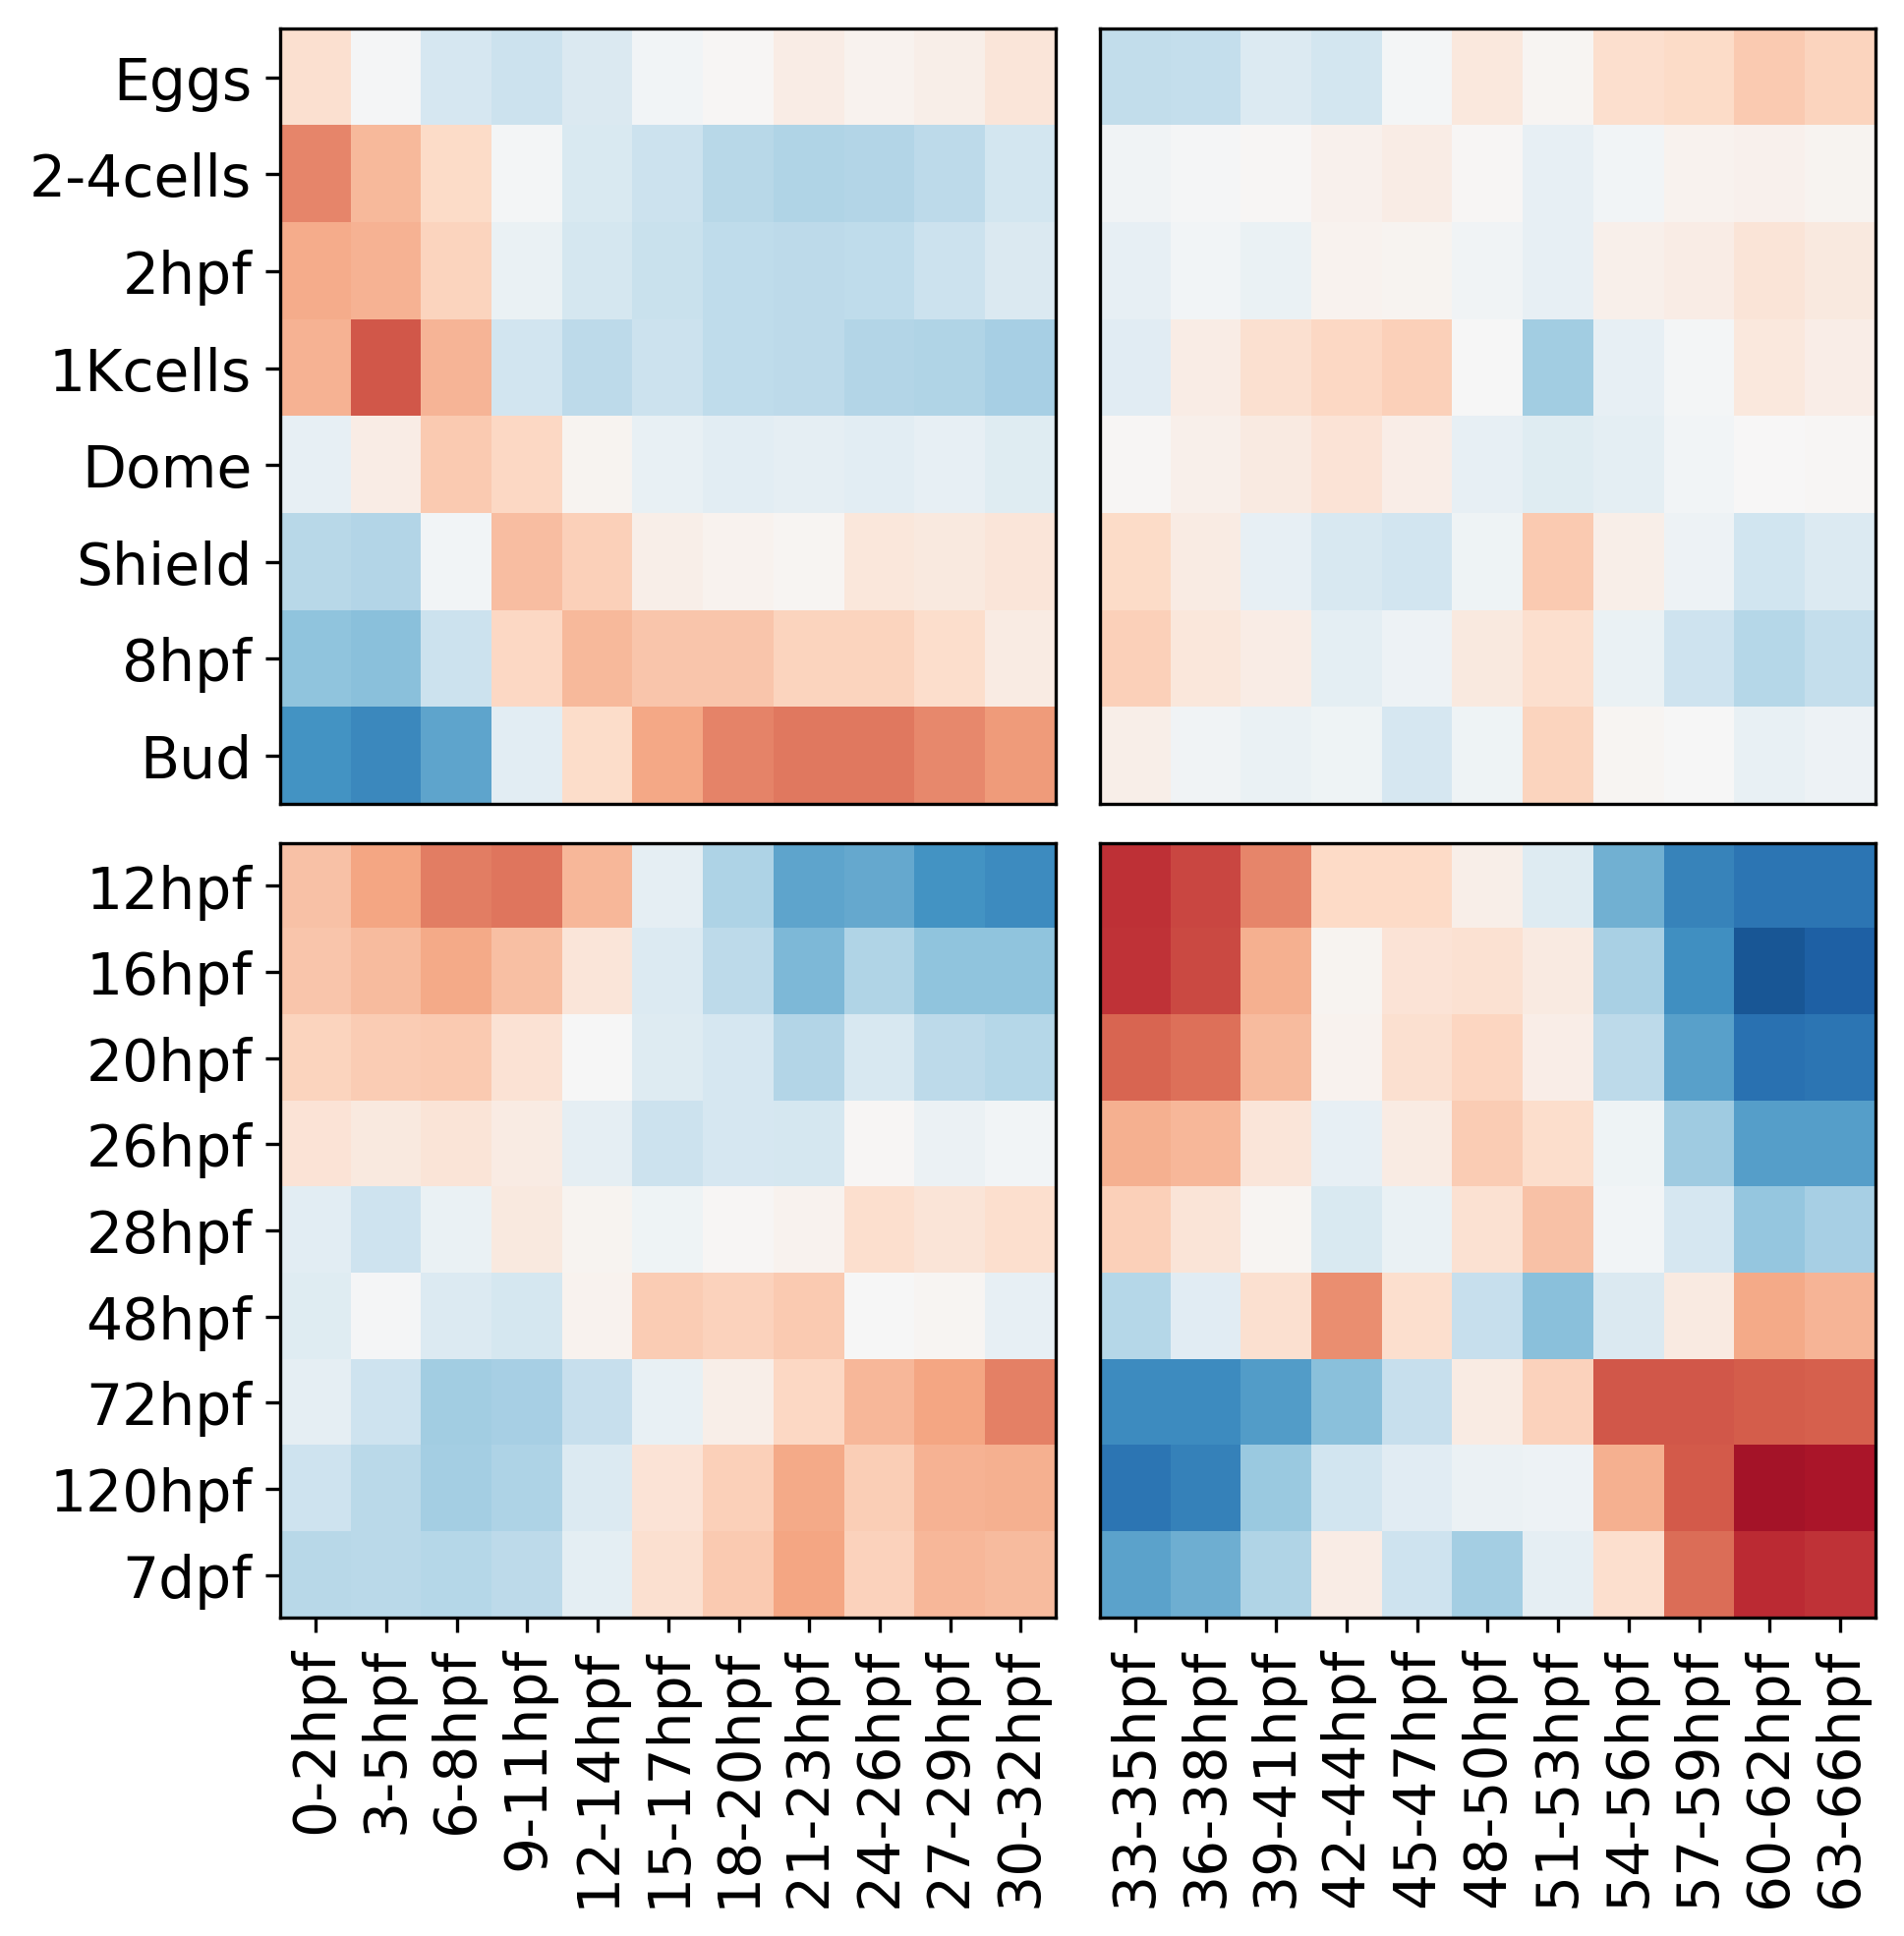

In [56]:
combo = ("D. rerio", "MARLETAZ"), ("X. tropicalis", "OWENS")

fig, axes = plt.subplots(figsize=(7, 7), nrows=2, ncols=2, dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)

df_X, df_Y = study_dfs[combo[0]].copy(), study_dfs[combo[1]].copy()

# keep one to one orthologs
orthos_X = df_X.index.get_level_values(0)
orthos_Y = df_Y.index.get_level_values(0)
shared_orthogroups = list(set(orthos_X[~orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[~orthos_Y.duplicated(keep=False)])))
df_X_orig = df_X.loc[shared_orthogroups].groupby(level=0).mean()
df_Y_orig = df_Y.loc[shared_orthogroups].groupby(level=0).mean()

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        
        if i == 0:
            df_X = df_X_orig[df_X_orig.columns[:len(df_X_orig.columns) // 2]]
        else:
            df_X = df_X_orig[df_X_orig.columns[len(df_X_orig.columns) // 2:]]

        if j == 0:
            df_Y = df_Y_orig[df_Y_orig.columns[:len(df_Y_orig.columns) // 2]]
        else:
            df_Y = df_Y_orig[df_Y_orig.columns[len(df_Y_orig.columns) // 2:]]

        df_X.values[:] = scipy.stats.zscore(df_X, axis=1)
        df_Y.values[:] = scipy.stats.zscore(df_Y, axis=1)
        correct_orthos = df_X.notnull()[df_X.columns[0]] & df_Y.notnull()[df_Y.columns[0]]
        df_X = df_X.loc[correct_orthos]
        df_Y = df_Y.loc[correct_orthos]

        corr_matrix = pairwise_pearson(df_X, df_Y)

        stages_X = df_X.columns
        stages_Y = df_Y.columns

        img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect=len(stages_Y)/len(stages_X), vmin=-0.5, vmax=0.5)

        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_yticks(range(len(stages_X)))
            ax.set_yticklabels(stages_X)
        if i == 1:
            ax.set_xticks(range(len(stages_Y)))
            ax.set_xticklabels(stages_Y)

        fontsize = 14
        _ = plt.setp(ax.get_xticklabels(), rotation=90, ha='center', fontsize=fontsize)
        _ = plt.setp(ax.get_yticklabels(), fontsize=fontsize)

plt.savefig("../imgs/inverse_second_half.svg")

0
13 22


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([9]), array([8]))
0.11311389647826636 0.9855127089014547
Index(['st26'], dtype='object') Index(['24-26hpf'], dtype='object')
1
17 22


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([13]), array([21]))
0.07228109533295057 0.8443913647239961
Index(['48hpf'], dtype='object') Index(['63-66hpf'], dtype='object')
2
17 18


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([10]), array([10]))
0.1553278933477124 0.884513632446392
Index(['20hpf'], dtype='object') Index(['20-25-somites'], dtype='object')


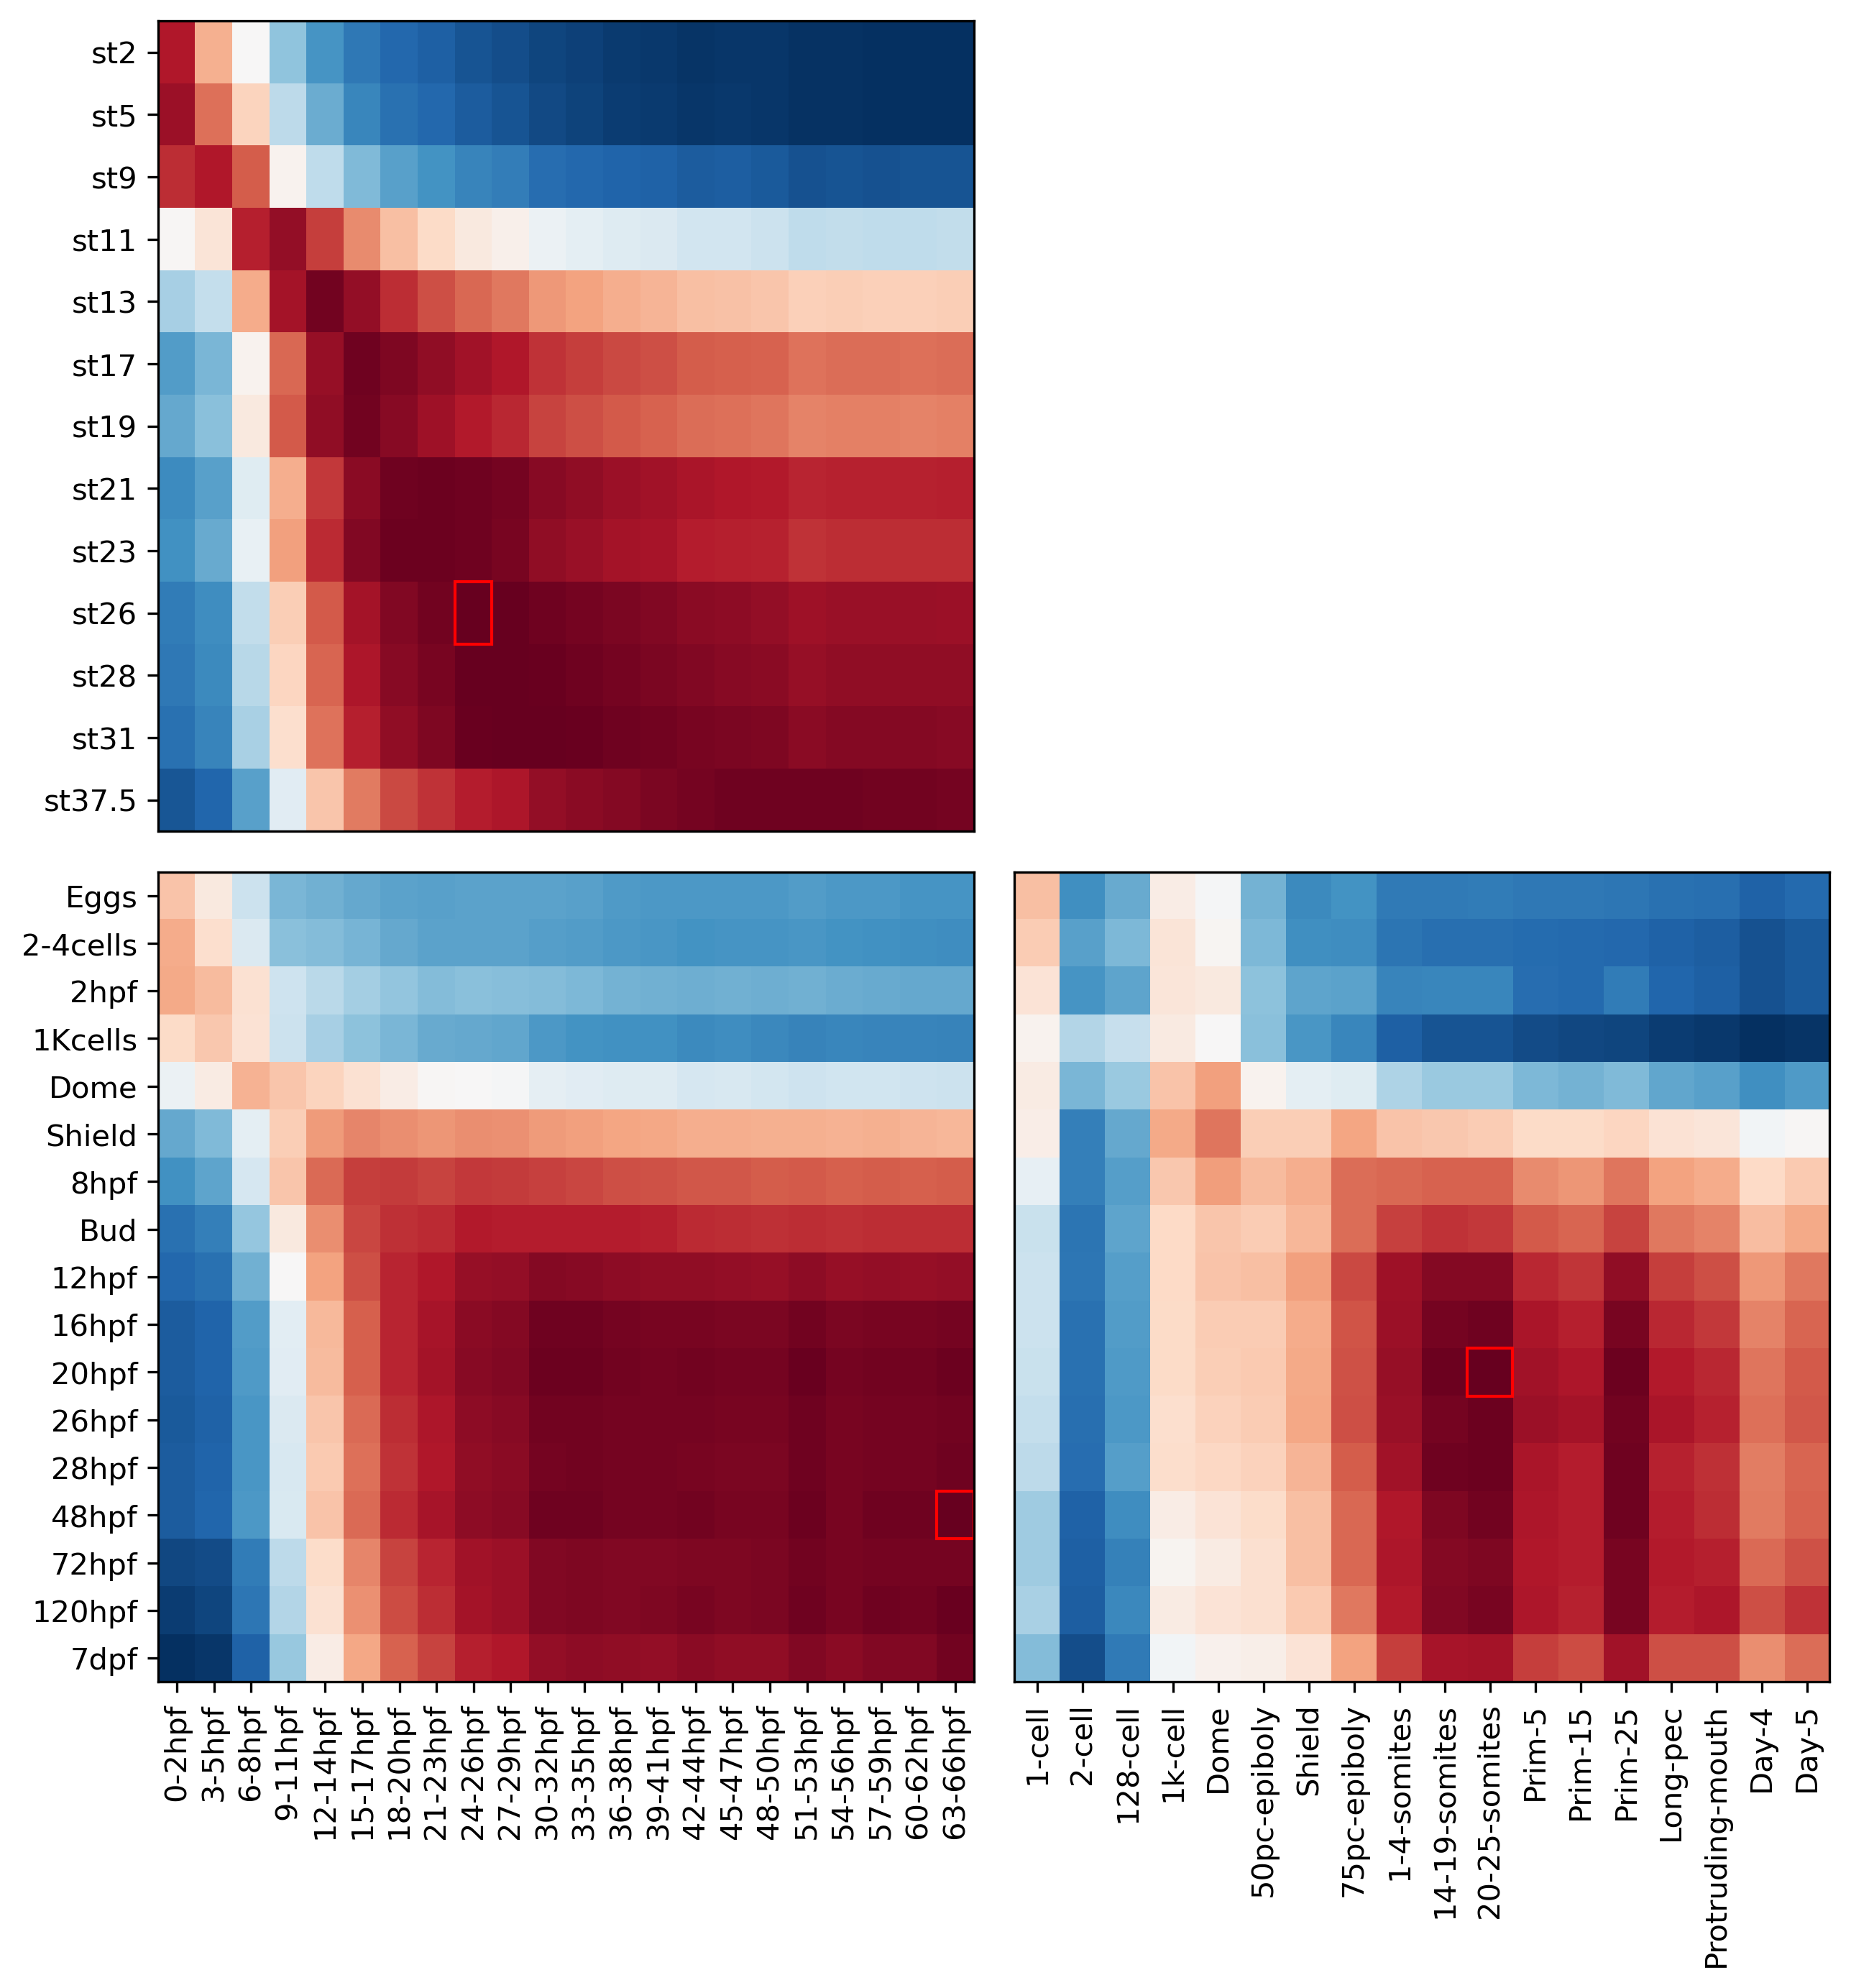

In [121]:
import matplotlib.patches as patches


fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2, dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)

combos = [
    [("X. tropicalis", "EXPANDE"), ("X. tropicalis", "OWENS")],
    [("D. rerio", "MARLETAZ"), ("X. tropicalis", "OWENS")],
    [("D. rerio", "MARLETAZ"), ("D. rerio", "WHITE")],
]

# combos = [
#     [("X. tropicalis", "OWENS"), ("X. tropicalis", "EXPANDE")],
#     [("D. rerio", "WHITE"), ("X. tropicalis", "EXPANDE")],
#     [("D. rerio", "WHITE"), ("D. rerio", "MARLETAZ")],
# ]

orthos_xenopus = study_dfs[("X. tropicalis", "OWENS")].index.get_level_values(0)
orthos_zebrafish = study_dfs[("D. rerio", "MARLETAZ")].index.get_level_values(0)

shared_orthogroups = list(
    set(orthos_xenopus[~orthos_xenopus.duplicated(keep=False)]).intersection(
        set(orthos_zebrafish[~orthos_zebrafish.duplicated(keep=False)])))

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        
        if j > i: 
            ax.axis('off')
            continue
        
        idx = i + j
        print(idx)
        species_1, study_1 = combos[idx][0]
        species_2, study_2 = combos[idx][1]
        df_X, df_Y = study_dfs[(species_1, study_1)].copy(), study_dfs[(species_2, study_2)].copy()
        stages_X = df_X.columns
        stages_Y = df_Y.columns
        
        print(len(stages_X), len(stages_Y))

        # keep only the selected orthogroups
        df_X = df_X.loc[shared_orthogroups].groupby(level=0).mean()
        df_Y = df_Y.loc[shared_orthogroups].groupby(level=0).mean()

        df_X = qnorm.quantile_normalize(df_X)
        df_Y = qnorm.quantile_normalize(df_Y)
        
#         df_X = np.log1p(df_X)
#         df_Y = np.log1p(df_Y)

#         low, high = 0.8, 1.0
#         max_X = df_X.mean(axis="columns").to_frame()
#         p_low = max_X.quantile(low)
#         p_high = max_X.quantile(high)
        
#         print(p_low)
#         break

#         subset = df_X[((p_low < max_X) & (max_X < p_high)).values].index

#         subset = set(df_X.max(axis="columns").nsmallest(4000).index)
#         subset = set(df_X.max(axis="columns").nlargest(160).index)

#         print(df_X.shape, df_X.loc[subset].shape)
#         corr_matrix = pairwise_pearson(df_X, df_Y)
#         corr_matrix = pairwise_spearman(df_X, df_Y)
#         df_X = np.log10(df_X + 1)
#         df_Y = np.log10(df_Y + 1)
        corr_matrix = pairwise_jensen_shannon(df_X, df_Y)
        corr_matrix = pairwise_pearson(df_X, df_Y)
        maximum = np.where(corr_matrix == np.min(corr_matrix))
        maximum = np.where(corr_matrix == np.max(corr_matrix))
        print(maximum)
        print(np.min(corr_matrix), np.max(corr_matrix))
        print(stages_X[maximum[0]], stages_Y[maximum[1]])
        
        img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect="auto") #, vmin=0.0, vmax=1.0) #, vmin=0.1, vmax=0.9)

        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_yticks(range(len(stages_X)))
            ax.set_yticklabels(stages_X)
        if i == 1:
            ax.set_xticks(range(len(stages_Y)))
            ax.set_xticklabels(stages_Y)

        _ = plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
        rect = patches.Rectangle((maximum[1] - 0.5, maximum[0] - 0.5), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
# plt.colorbar(img)
plt.savefig("../imgs/orthologs.svg")

In [ ]:
df_X[((p_low < max_X) & (max_X < p_high)).values]

/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


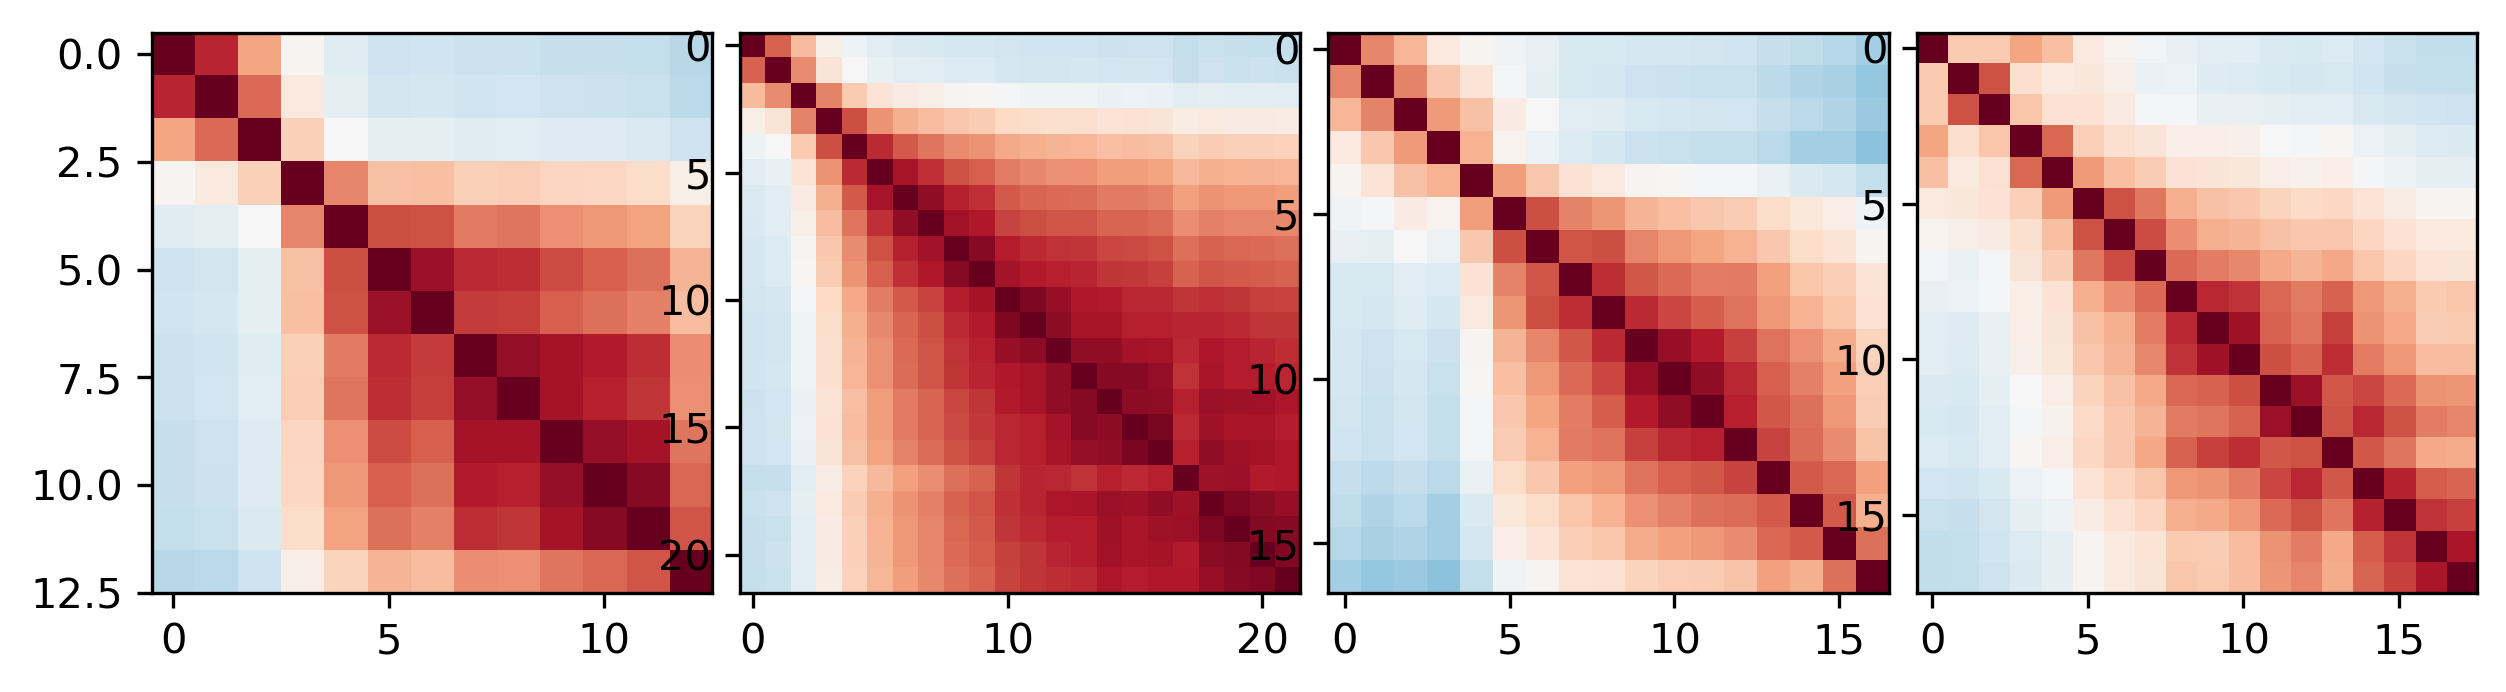

In [19]:
import matplotlib.patches as patches


fig, axes = plt.subplots(figsize=(10, 5), nrows=1, ncols=4, dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)

studies = [
    ("X. tropicalis", "EXPANDE"), ("X. tropicalis", "OWENS"), ("D. rerio", "MARLETAZ"), ("D. rerio", "WHITE")
]


orthos_xenopus = study_dfs[("X. tropicalis", "OWENS")].index.get_level_values(0)
orthos_zebrafish = study_dfs[("D. rerio", "MARLETAZ")].index.get_level_values(0)

shared_orthogroups = list(
    set(orthos_xenopus[~orthos_xenopus.duplicated(keep=False)]).intersection(
        set(orthos_zebrafish[~orthos_zebrafish.duplicated(keep=False)])))

for i, (species, study) in enumerate(studies):
    ax = axes[i]

    df = study_dfs[(species, study)].copy()
    stages = df.columns

    # keep only the selected orthogroups
    df = df.loc[shared_orthogroups].groupby(level=0).mean()

    df = qnorm.quantile_normalize(df)

    corr_matrix = pairwise_jensen_shannon(df, df)

    img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu", interpolation='None', aspect=1, vmin=0.0, vmax=1)

#     ax.set_xticks([])
#     ax.set_yticks([])
#     if j == 0:
#         ax.set_yticks(range(len(stages_X)))
#         ax.set_yticklabels(stages_X)
#     if i == 1:
#         ax.set_xticks(range(len(stages_Y)))
#         ax.set_xticklabels(stages_Y)

#     _ = plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
#     rect = patches.Rectangle((maximum[1] - 0.5, maximum[0] - 0.5), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
#     ax.add_patch(rect)
# plt.colorbar(img)
# plt.savefig("../imgs/orthologs.svg")

/vol/phylotypic_hourglass/notebooks/util.py:183: RuntimeWarning: invalid value encountered in divide
  kl_div = lambda x,y: np.nansum(x * np.log2(x/y))
/vol/phylotypic_hourglass/notebooks/util.py:183: RuntimeWarning: divide by zero encountered in log2
  kl_div = lambda x,y: np.nansum(x * np.log2(x/y))
/vol/phylotypic_hourglass/notebooks/util.py:183: RuntimeWarning: invalid value encountered in multiply
  kl_div = lambda x,y: np.nansum(x * np.log2(x/y))


MultiIndex([(          '1-cell',           '2-cell'),
            (          '2-cell',         '128-cell'),
            (        '128-cell',          '1k-cell'),
            (         '1k-cell',             'Dome'),
            (            'Dome',     '50pc-epiboly'),
            (    '50pc-epiboly',           'Shield'),
            (          'Shield',     '75pc-epiboly'),
            (    '75pc-epiboly',      '1-4-somites'),
            (     '1-4-somites',    '14-19-somites'),
            (   '14-19-somites',    '20-25-somites'),
            (   '20-25-somites',           'Prim-5'),
            (          'Prim-5',          'Prim-15'),
            (         'Prim-15',          'Prim-25'),
            (         'Prim-25',         'Long-pec'),
            (        'Long-pec', 'Protruding-mouth'),
            ('Protruding-mouth',            'Day-4'),
            (           'Day-4',            'Day-5')],
           )

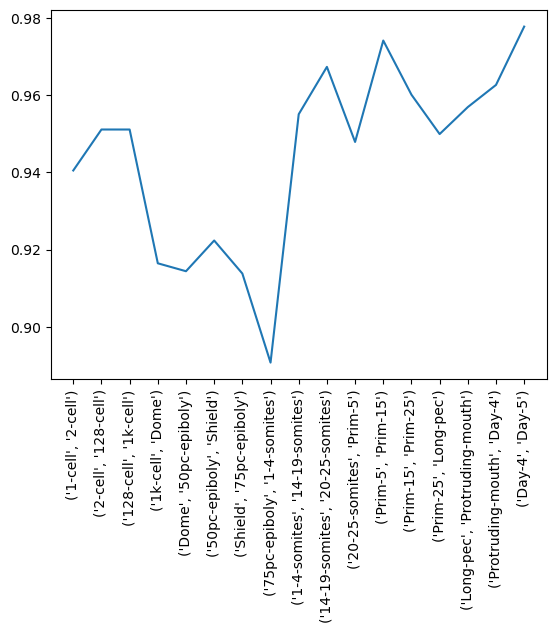

In [20]:
corrs = study_dfs[("D. rerio", "WHITE")].corr(method=jensen_shannon_distance)
corrs = study_dfs[("D. rerio", "WHITE")].corr(method="spearman")

corrs = pd.Series(np.diag(corrs, k=1), index=[corrs.index[:-1], corrs.columns[1:]])

plt.plot(range(len(corrs)), corrs.values)
plt.xticks(range(len(corrs)), corrs.index, rotation=90)
# plt.set_x(range(len(corrs)))

# corrs.plot()
corrs.index

17 22
(5444, 17)


/tmp/ipykernel_5555/3319563398.py:28: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_matrix = pairwise_jensen_shannon(df_X.loc[subset], df_Y.loc[subset])
/tmp/ipykernel_5555/3319563398.py:28: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_matrix = pairwise_jensen_shannon(df_X.loc[subset], df_Y.loc[subset])


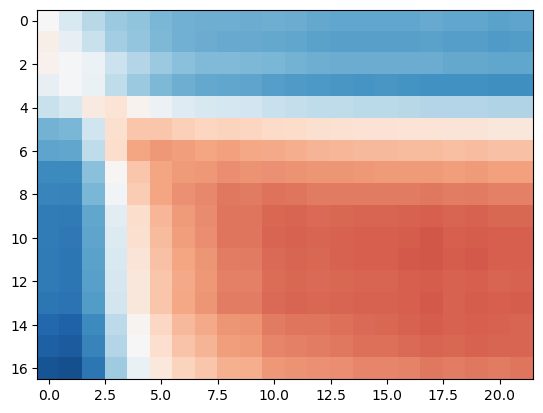

In [100]:
shared_orthogroups = list(
    set(orthos_xenopus[~orthos_xenopus.duplicated(keep=False)]).intersection(
        set(orthos_zebrafish[~orthos_zebrafish.duplicated(keep=False)])))


species_1, study_1 = ("D. rerio", "MARLETAZ")
species_2, study_2 = ("X. tropicalis", "OWENS")
df_X, df_Y = study_dfs[(species_1, study_1)].copy(), study_dfs[(species_2, study_2)].copy()
stages_X = df_X.columns
stages_Y = df_Y.columns

print(len(stages_X), len(stages_Y))

# keep only the selected orthogroups
df_X = df_X.loc[shared_orthogroups].groupby(level=0).mean()
df_Y = df_Y.loc[shared_orthogroups].groupby(level=0).mean()

df_X = qnorm.quantile_normalize(df_X)
df_Y = qnorm.quantile_normalize(df_Y)

print(df_X.shape)

subset = set(df_X.max(axis="columns").nsmallest(5444 - 160).index)
subset = set(df_X.max(axis="columns").nlargest(160).index)

# subset = df_X.index
# print(len(subset))
corr_matrix = pairwise_jensen_shannon(df_X.loc[subset], df_Y.loc[subset])
# corr_matrix = pairwise_spearman(df_X.loc[subset], df_Y.loc[subset])

plt.imshow(corr_matrix, origin='upper', cmap="RdBu", interpolation='None', aspect="auto", vmin=0.1, vmax=0.9)


<AxesSubplot: >

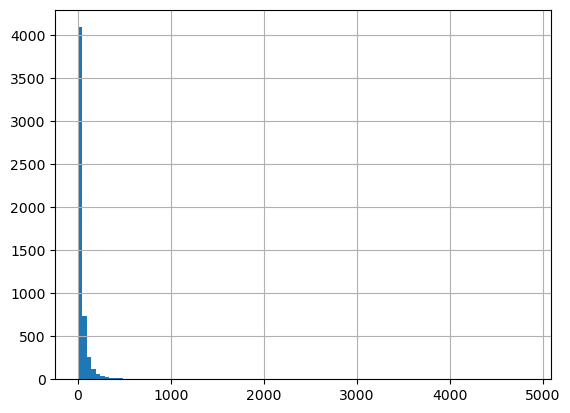

In [30]:
df_Y["0-2hpf"].hist(bins=100)

<AxesSubplot: >

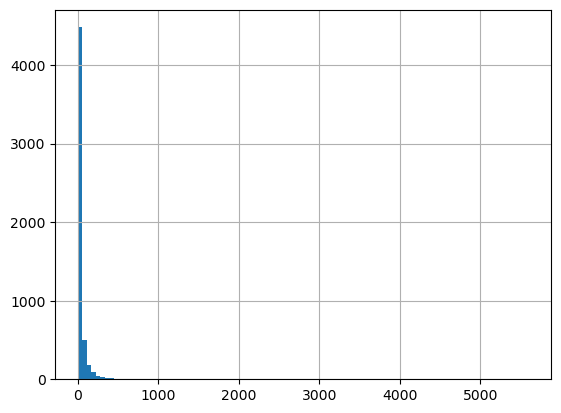

In [23]:
df_X["Eggs"].hist(bins=100)

In [27]:
list(sorted(df_X["Eggs"].values))[-100:]

[404.15284492950656,
 408.09950772201375,
 410.94015300472734,
 418.0293175998397,
 420.81425388503897,
 425.95555228725397,
 433.31716201393317,
 439.85901490414153,
 442.3606502792004,
 447.0286870386567,
 451.486911765493,
 457.53291791781,
 460.2284127015316,
 465.64989072016965,
 472.36594882959497,
 478.5527348969486,
 488.22640764407106,
 493.71076289528816,
 504.43877543173704,
 512.183978415051,
 523.1014093185315,
 535.8486190814485,
 543.8123657071097,
 553.4039574584649,
 563.5266185203582,
 574.3224752296965,
 584.3130524259402,
 598.9834702356662,
 610.6976704806266,
 625.3623981052582,
 639.3150970757438,
 651.7723825765852,
 665.2582974236417,
 677.8527118103966,
 696.7210034356212,
 702.5634397231448,
 714.8778386212097,
 738.9242136626377,
 757.223700747142,
 786.4995433249244,
 830.964173840251,
 868.3544135274377,
 897.0341965132677,
 921.7731391161547,
 971.6783158492809,
 1028.8199734072437,
 1048.2965408742496,
 1090.4069895291184,
 1115.8546981029742,
 1137.9234

0
13 22


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.10589540221361905 0.6536148864462911
Index(['st31'], dtype='object') Index(['27-29hpf'], dtype='object')
1
17 22


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.33457179080640065 0.7250800377400597
Index(['20hpf'], dtype='object') Index(['30-32hpf'], dtype='object')
2
17 18


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.33471907312996607 0.7445081102641281
Index(['20hpf'], dtype='object') Index(['20-25-somites'], dtype='object')


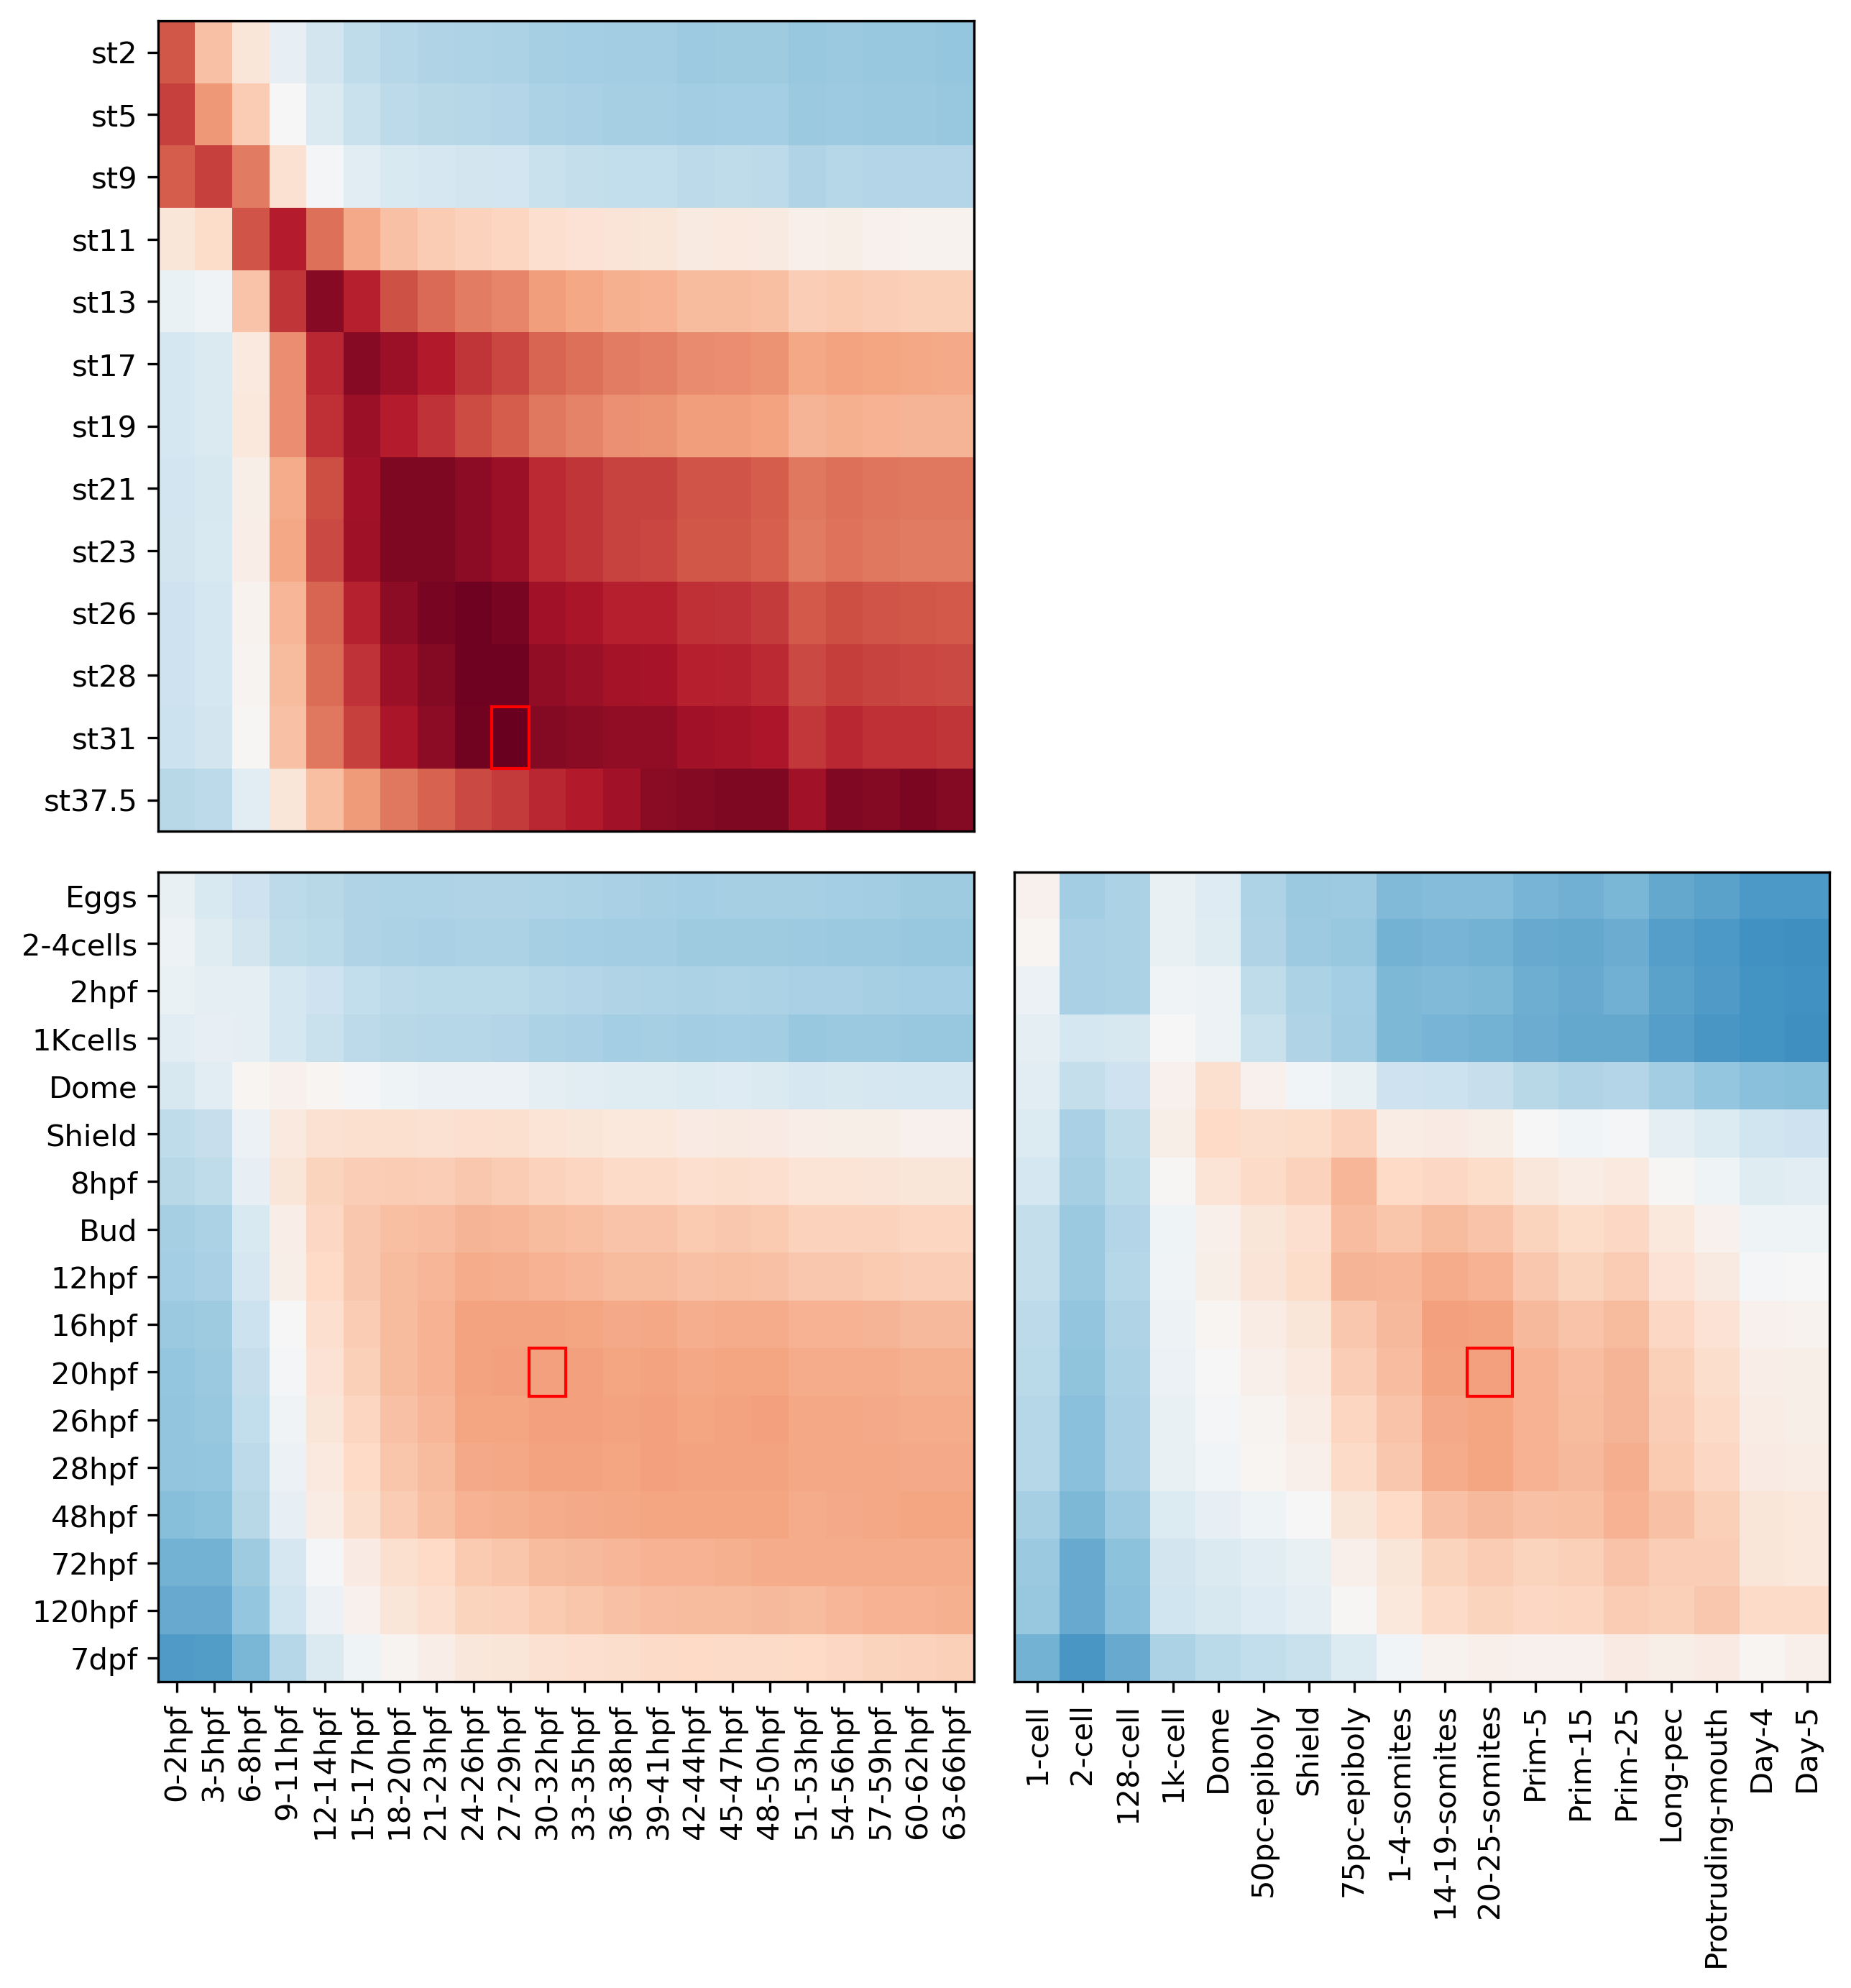

In [28]:
# import matplotlib.patches as patches


# fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2, dpi=300)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)

# combos = [
#     [("D. rerio", "WHITE"), ("D. rerio", "MARLETAZ")],
#     [("X. tropicalis", "OWENS"), ("D. rerio", "MARLETAZ")],
#     [("X. tropicalis", "OWENS"), ("X. tropicalis", "EXPANDE")],
# ]

# combos = [
#     [("X. tropicalis", "EXPANDE"), ("X. tropicalis", "OWENS")],
#     [("D. rerio", "MARLETAZ"), ("X. tropicalis", "OWENS")],
#     [("D. rerio", "MARLETAZ"), ("D. rerio", "WHITE")],
# ]

# orthos_xenopus = study_dfs[("X. tropicalis", "OWENS")].index.get_level_values(0)
# orthos_zebrafish = study_dfs[("D. rerio", "MARLETAZ")].index.get_level_values(0)

# shared_orthogroups = list(
#     set(orthos_xenopus[~orthos_xenopus.duplicated(keep=False)]).intersection(
#         set(orthos_zebrafish[~orthos_zebrafish.duplicated(keep=False)])))

# for i in range(2):
#     for j in range(2):
#         ax = axes[i, j]
        
#         if j > i: 
#             ax.axis('off')
#             continue
        
#         idx = i + j
#         print(idx)
#         species_1, study_1 = combos[idx][0]
#         species_2, study_2 = combos[idx][1]
#         df_X, df_Y = study_dfs[(species_1, study_1)].copy(), study_dfs[(species_2, study_2)].copy()
#         stages_X = df_X.columns
#         stages_Y = df_Y.columns
        
#         print(len(stages_X), len(stages_Y))

#         # keep only the selected orthogroups
# #         if i != j:
#         df_X = df_X.loc[shared_orthogroups].groupby(level=0).mean()
#         df_Y = df_Y.loc[shared_orthogroups].groupby(level=0).mean()

#         df_X = qnorm.quantile_normalize(df_X)
#         df_Y = qnorm.quantile_normalize(df_Y)

#         corr_matrix = pairwise_jensen_shannon(df_X, df_Y)
#         maximum = np.where(corr_matrix == np.min(corr_matrix))
#         print(np.min(corr_matrix), np.max(corr_matrix))
#         print(stages_X[maximum[0]], stages_Y[maximum[1]])
        
#         ax.imshow(corr_matrix, origin='upper', cmap="RdBu", interpolation='None', aspect="auto", vmin=0.1, vmax=0.9)

#         ax.set_xticks([])
#         ax.set_yticks([])
#         if j == 0:
#             ax.set_yticks(range(len(stages_X)))
#             ax.set_yticklabels(stages_X)
#         if i == 1:
#             ax.set_xticks(range(len(stages_Y)))
#             ax.set_xticklabels(stages_Y)

#         _ = plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
#         rect = patches.Rectangle((maximum[1] - 0.5, maximum[0] - 0.5), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
#         ax.add_patch(rect)

# plt.colorbar(img)
# plt.savefig("../imgs/orthologs.svg")

# single pairwise

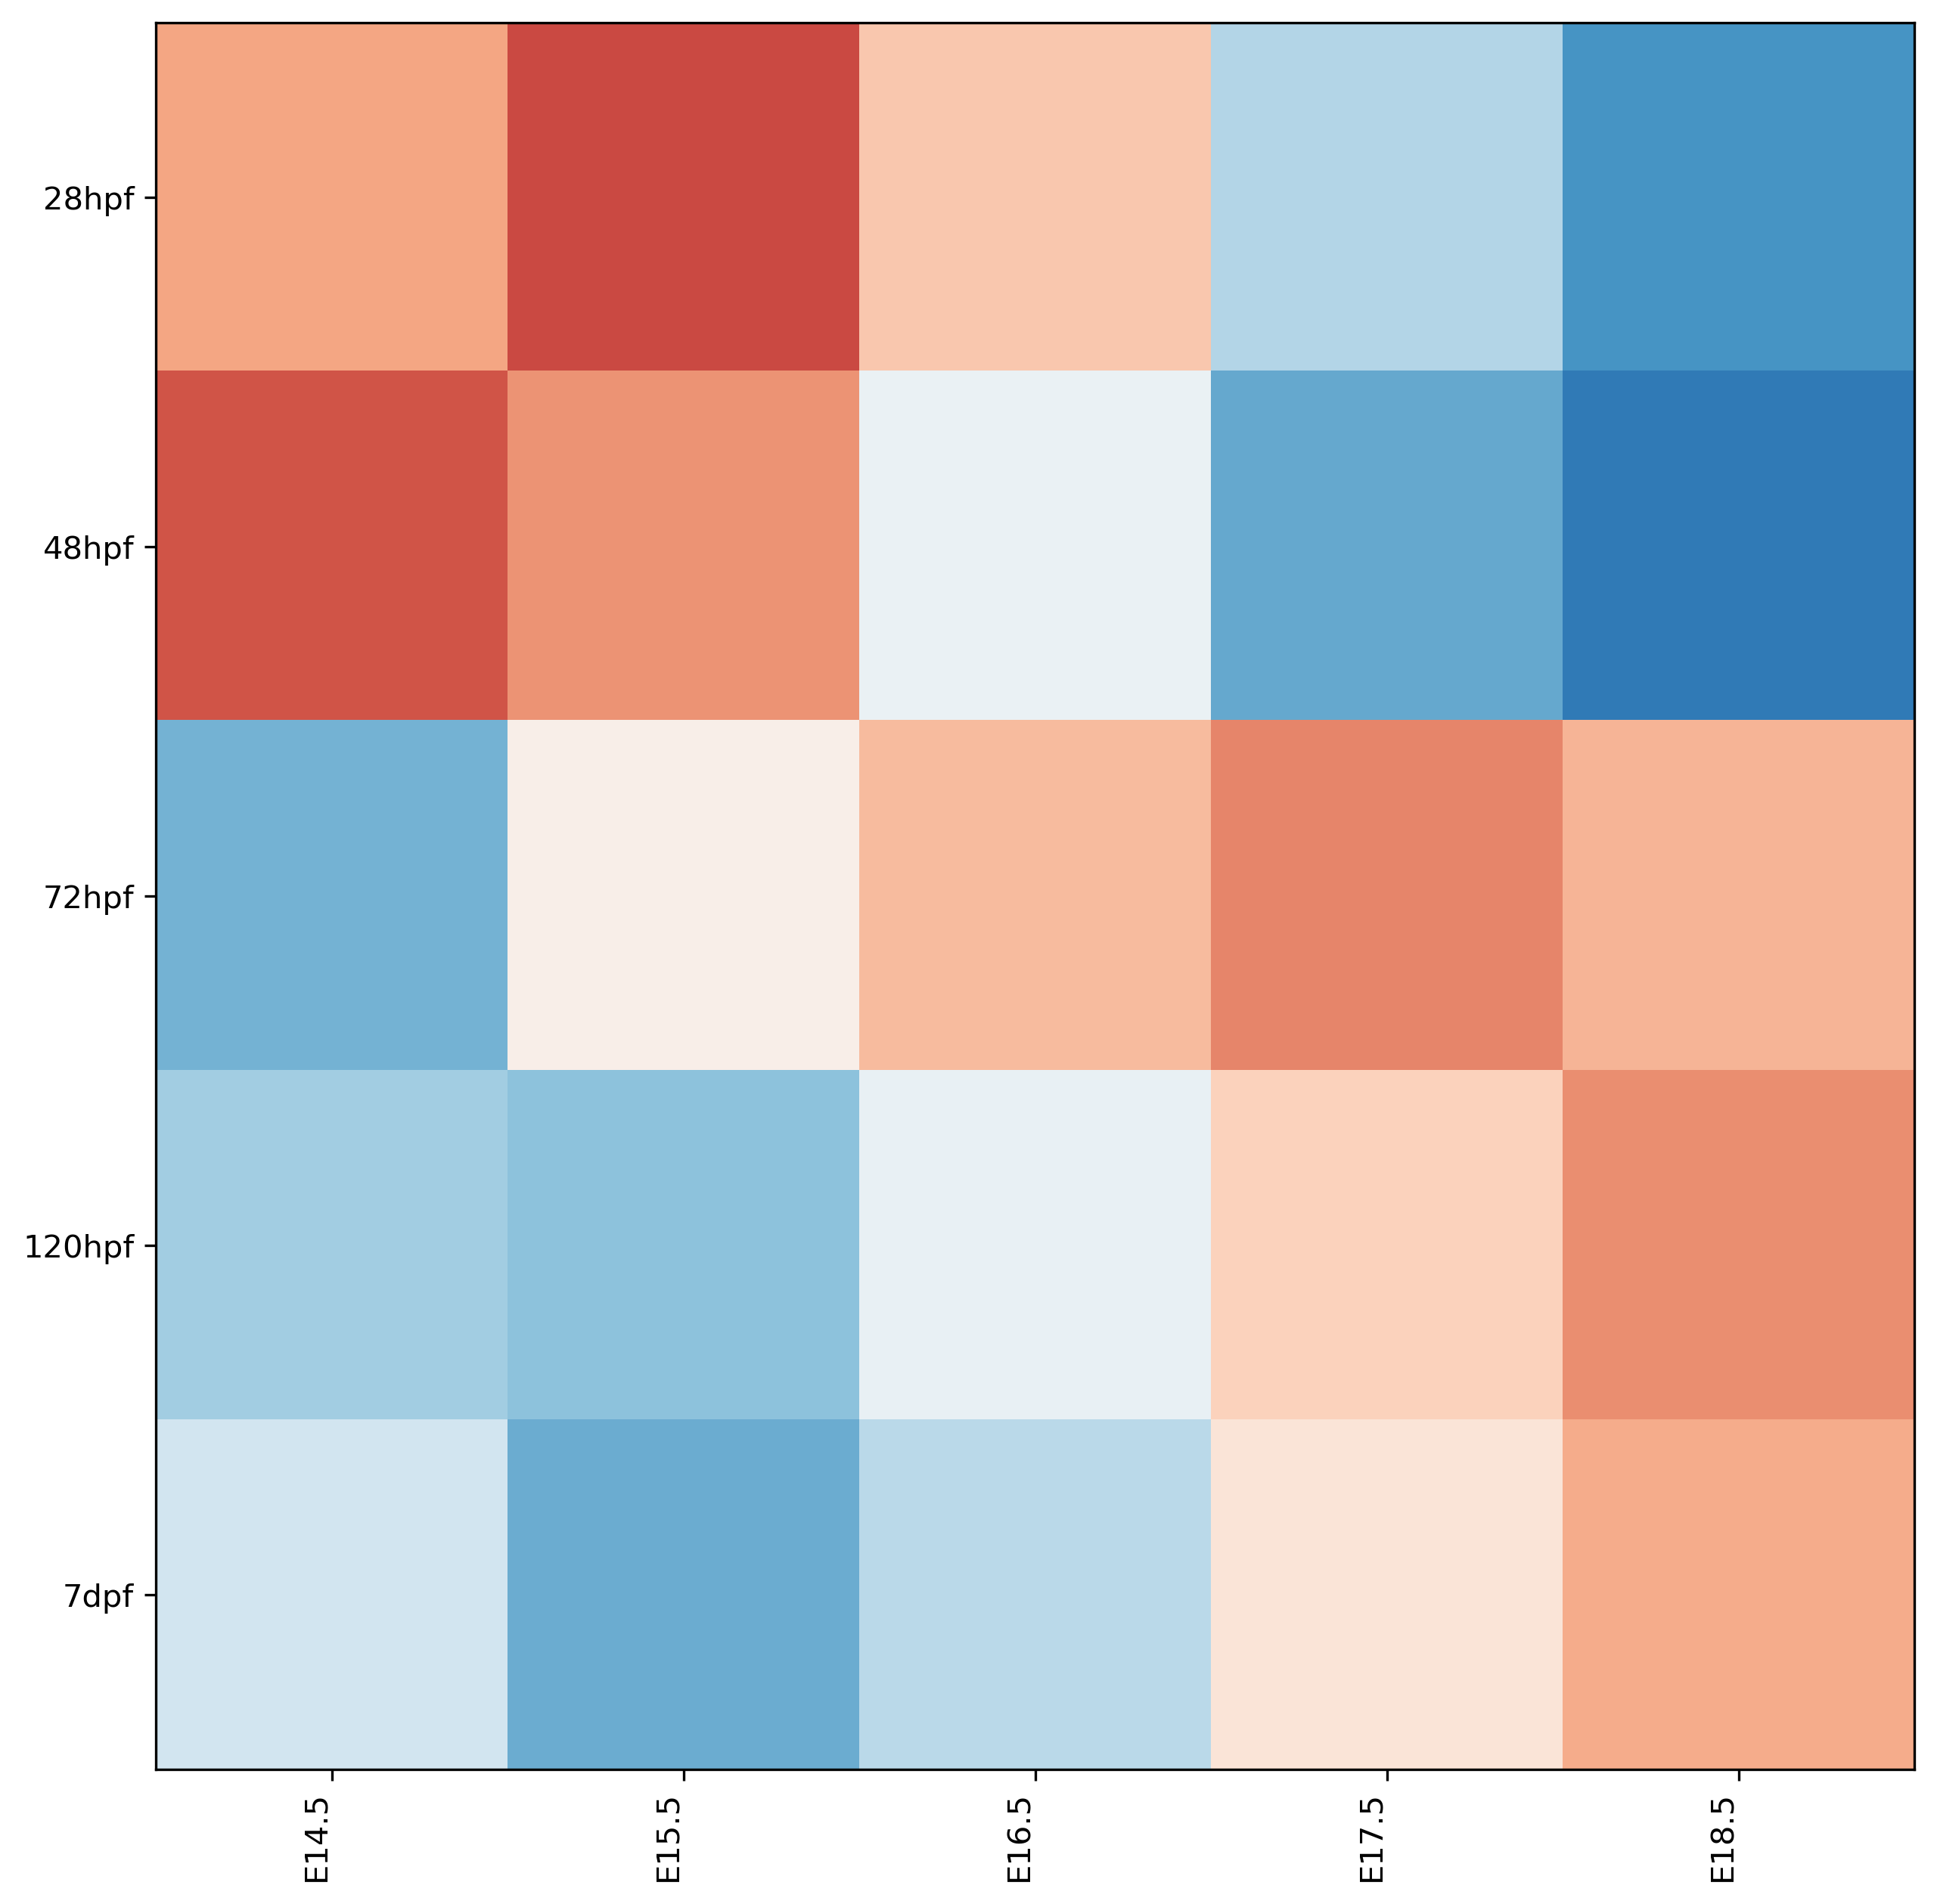

In [11]:
plt.rcParams['svg.fonttype'] = 'none'

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

study_X = ("D. rerio", "MARLETAZ")
study_Y = ("M. musculus", "EXPANDE")

df_X, df_Y = study_dfs[study_X].copy(), study_dfs[study_Y].copy()

orthos_X = df_X.index.get_level_values(0)
orthos_Y = df_Y.index.get_level_values(0)

# shared_orthogroups = list(set(orthos_X[orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[orthos_Y.duplicated(keep=False)])))
# shared_orthogroups = list(set(orthos_X[~orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[~orthos_Y.duplicated(keep=False)])))
shared_orthogroups = list(set(orthos_X).intersection(set(orthos_Y)))

# keep only the selected orthogroups
df_X = df_X.loc[shared_orthogroups].groupby(level=0).mean()
df_Y = df_Y.loc[shared_orthogroups].groupby(level=0).mean()

df_X = qnorm.quantile_normalize(df_X)
df_Y = qnorm.quantile_normalize(df_Y)


df_X = df_X[df_X.columns[len(df_X.columns) // 2 + len(df_X.columns) // 4:]]
df_Y = df_Y[df_Y.columns[len(df_Y.columns) // 2 + len(df_Y.columns) // 4:]]
stages_X = study2stages[study_X]
stages_Y = study2stages[study_Y]

df_X.values[:] = sklearn.preprocessing.minmax_scale(df_X, axis=1)
df_Y.values[:] = sklearn.preprocessing.minmax_scale(df_Y, axis=1)

corr_matrix = pairwise_pearson(df_X, df_Y)
# corr_matrix = pairwise_jensen_shannon(df_X, df_Y)

# aspect = len(study2stages[study_Y]) / len(study2stages[study_X])
# aspect = 0.4
aspect = "auto"
# img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect=aspect, vmin=0, vmax=0.8)
img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect=aspect, vmin=-0.4, vmax=0.4)
# ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect=aspect, vmin=-0.4, vmax=.4)

aspect


ax.set_xticks(range(len(df_Y.columns)))
ax.set_yticks(range(len(df_X.columns)))
ax.set_xticklabels(df_Y.columns)
ax.set_yticklabels(df_X.columns)

# ax.set_xticks([])
# ax.set_yticks([])

_ = plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
# fig.colorbar(img)
plt.savefig("../imgs/test.svg")

# if assembly_2_i == 0:
#     ax.set_ylabel(study2species[assembly_1] + "_" + assembly_1, fontsize=18)
# if assembly_1_i == len(study2species.keys()) - 1:
#     ax.set_xlabel(study2species[assembly_2] + "_" + assembly_2, fontsize=18)


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


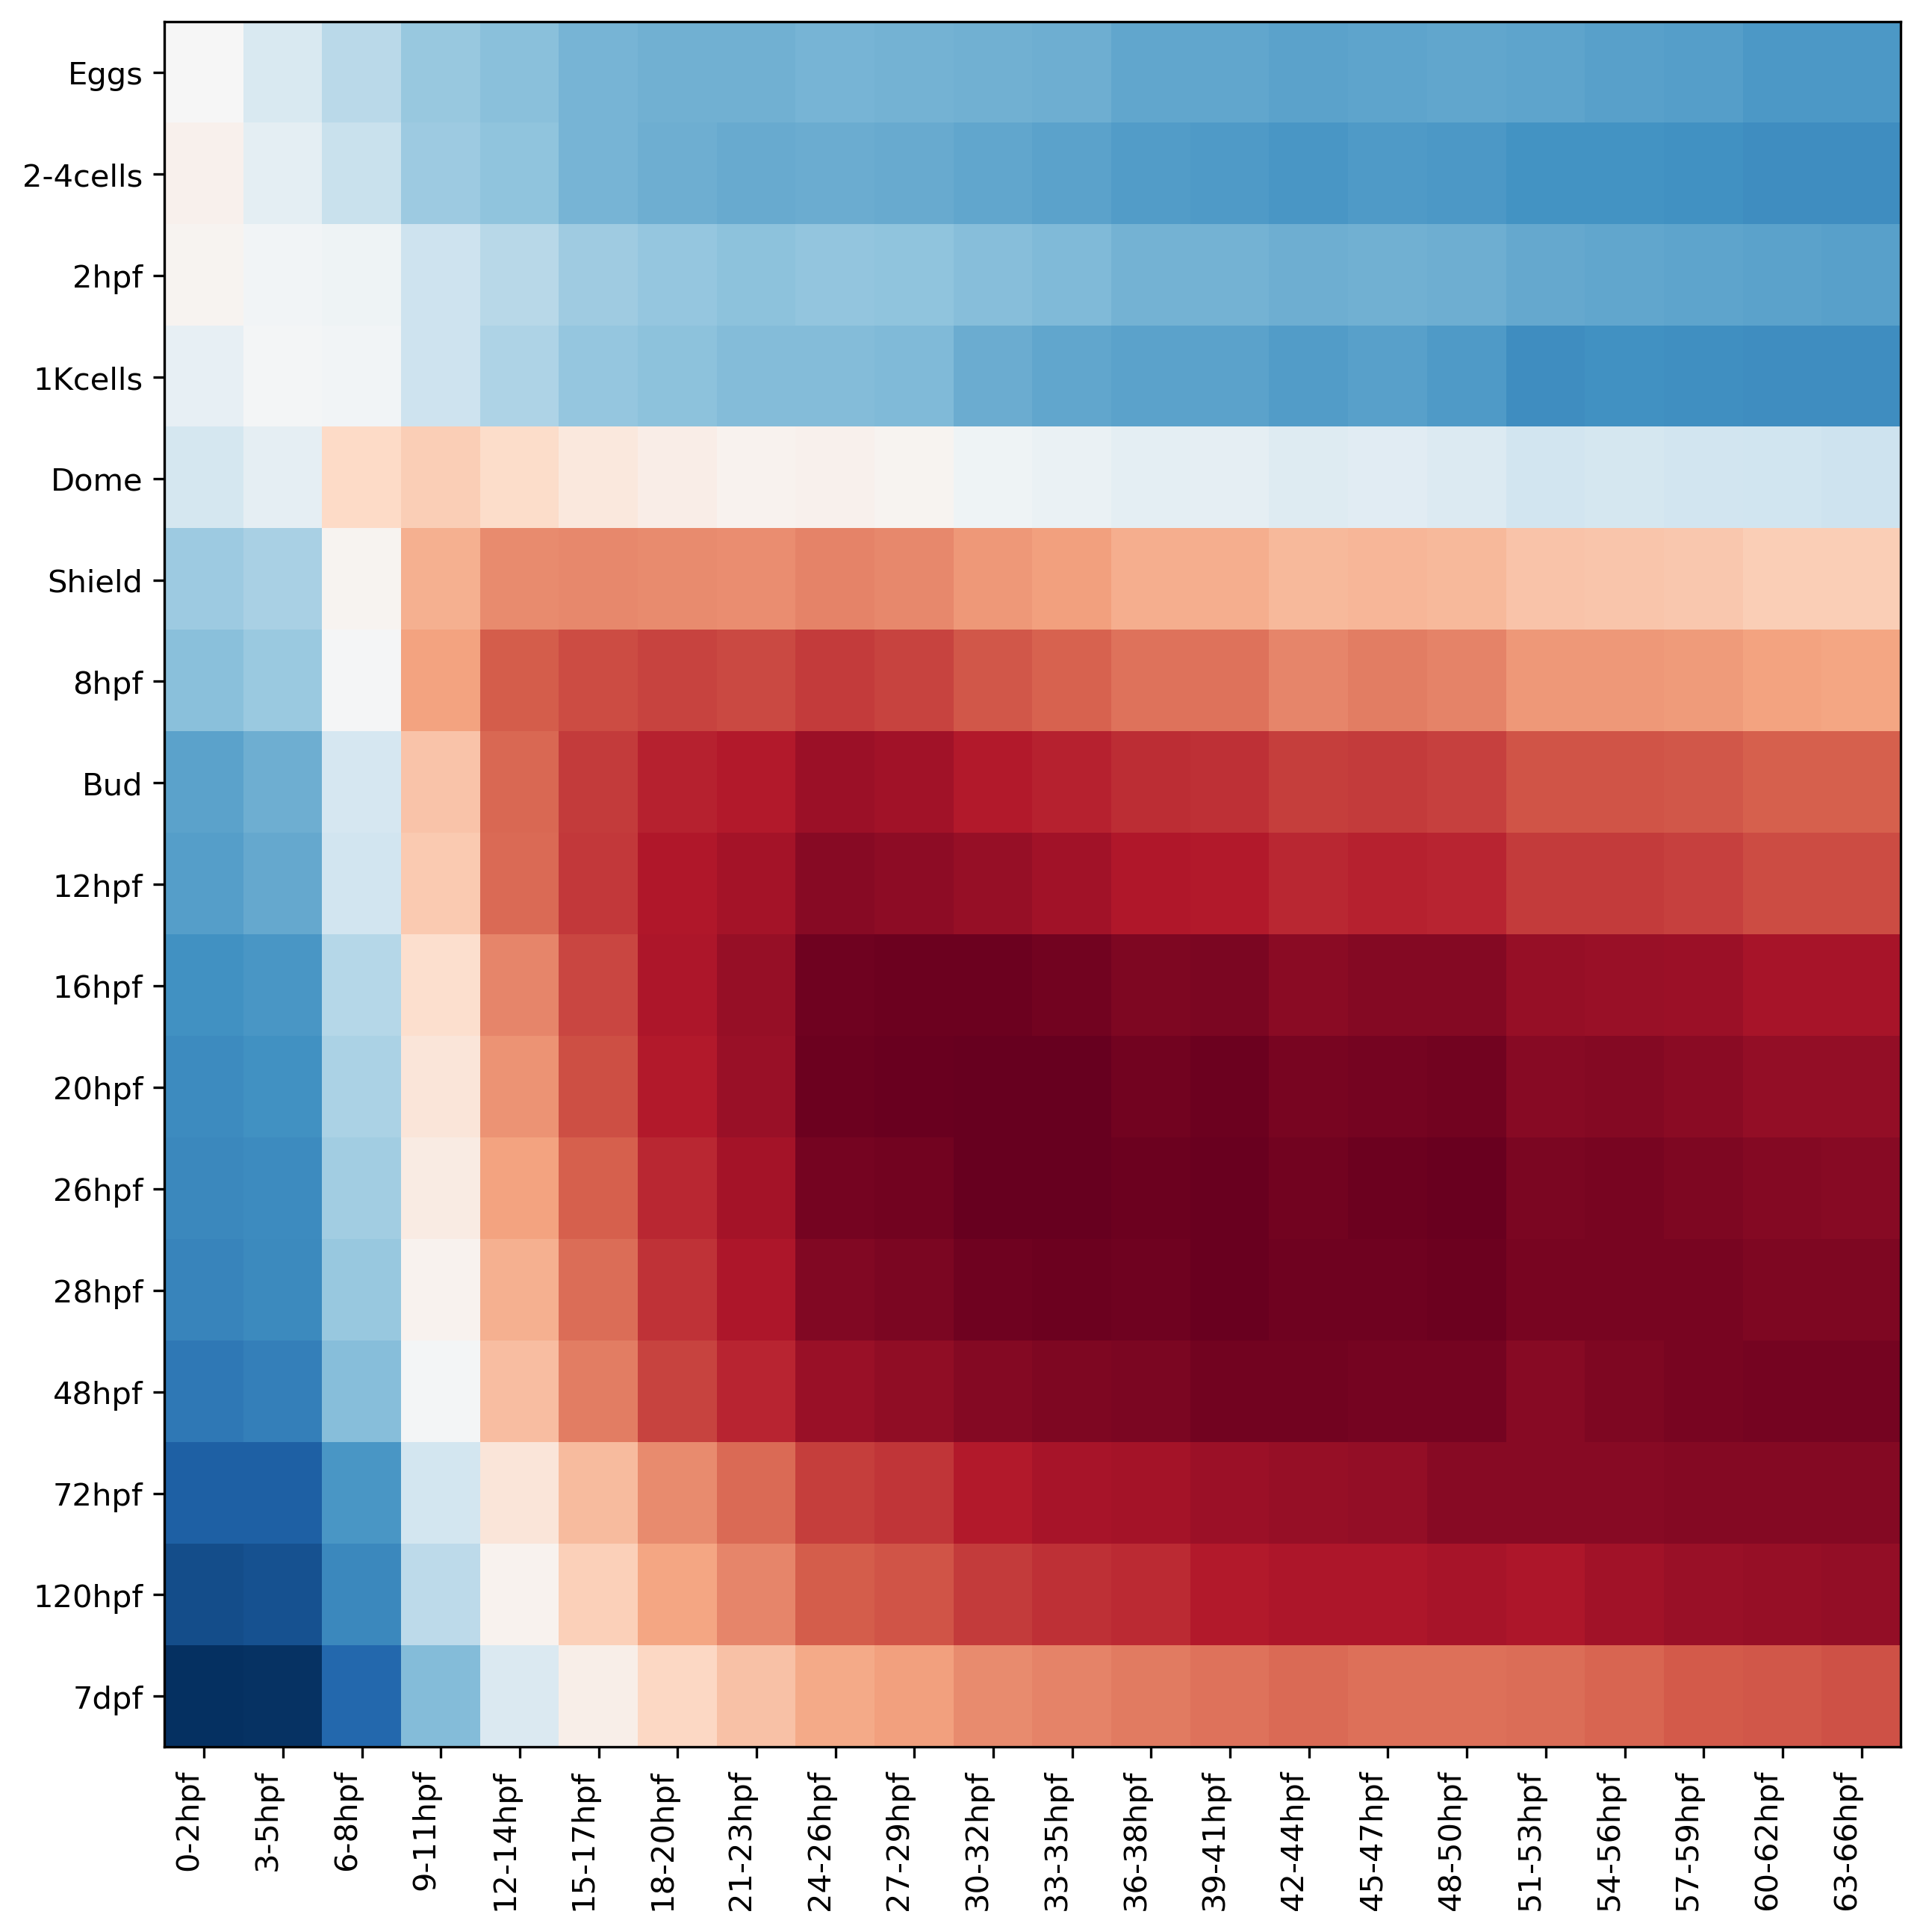

In [39]:
plt.rcParams['svg.fonttype'] = 'none'

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# combos = [
#     [("X. tropicalis", "EXPANDE"), ("X. tropicalis", "OWENS")],
#     [("D. rerio", "MARLETAZ"), ("X. tropicalis", "OWENS")],
#     [("D. rerio", "MARLETAZ"), ("D. rerio", "WHITE")],
# ]


study_X = ("D. rerio", "MARLETAZ")
# study_Y = ("D. rerio", "WHITE")

# study_X = ("X. tropicalis", "EXPANDE")
study_Y = ("X. tropicalis", "OWENS")


df_X, df_Y = study_dfs[study_X].copy(), study_dfs[study_Y].copy()

orthos_X = df_X.index.get_level_values(0)
orthos_Y = df_Y.index.get_level_values(0)

# shared_orthogroups = list(set(orthos_X[orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[orthos_Y.duplicated(keep=False)])))
shared_orthogroups = list(set(orthos_X[~orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[~orthos_Y.duplicated(keep=False)])))
# shared_orthogroups = list(set(orthos_X).intersection(set(orthos_Y)))

# # keep only the selected orthogroups
df_X = df_X.loc[shared_orthogroups].groupby(level=0).mean()
df_Y = df_Y.loc[shared_orthogroups].groupby(level=0).mean()

df_X = qnorm.quantile_normalize(df_X)
df_Y = qnorm.quantile_normalize(df_Y)


# df_X = df_X[df_X.columns[len(df_X.columns) // 2 + len(df_X.columns) // 4:]]
# df_Y = df_Y[df_Y.columns[len(df_Y.columns) // 2 + len(df_Y.columns) // 4:]]
stages_X = study2stages[study_X]
stages_Y = study2stages[study_Y]

# df_X.values[:] = sklearn.preprocessing.minmax_scale(df_X, axis=1)
# df_Y.values[:] = sklearn.preprocessing.minmax_scale(df_Y, axis=1)

# corr_matrix = pairwise_pearson(df_X, df_Y)
corr_matrix = pairwise_jensen_shannon(df_X, df_Y)

# aspect = len(study2stages[study_Y]) / len(study2stages[study_X])
# aspect = 0.4
aspect = "auto"
# img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect=aspect, vmin=0, vmax=0.8)
# img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu", interpolation='None', aspect=aspect, vmin=0, vmax=0.8)
# ax.imshow(corr_matrix, origin='upper', cmap="RdBu_r", interpolation='None', aspect=aspect, vmin=-0.4, vmax=.4)
img = ax.imshow(corr_matrix, origin='upper', cmap="RdBu", interpolation='None', aspect="auto") #, vmin=0.1, vmax=1)

aspect


ax.set_xticks(range(len(df_Y.columns)))
ax.set_yticks(range(len(df_X.columns)))
ax.set_xticklabels(df_Y.columns)
ax.set_yticklabels(df_X.columns)

# ax.set_xticks([])
# ax.set_yticks([])

_ = plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
# fig.colorbar(img)
plt.savefig("../imgs/test.svg")

# if assembly_2_i == 0:
#     ax.set_ylabel(study2species[assembly_1] + "_" + assembly_1, fontsize=18)
# if assembly_1_i == len(study2species.keys()) - 1:
#     ax.set_xlabel(study2species[assembly_2] + "_" + assembly_2, fontsize=18)


In [66]:
corr_matrix

array([[0.80396175, 0.80411836, 0.75755621, 0.7437649 , 0.78825271,
        0.72926661, 0.71098154, 0.64063235, 0.66590172],
       [0.85742392, 0.86119296, 0.80306742, 0.78780681, 0.85029423,
        0.77609403, 0.75949179, 0.68228019, 0.70984061],
       [0.88265605, 0.89081013, 0.81580098, 0.80206221, 0.88225666,
        0.79904032, 0.78227168, 0.70381455, 0.73053719],
       [0.86168921, 0.86940608, 0.82283551, 0.81246053, 0.86173743,
        0.80459743, 0.7889967 , 0.70945651, 0.73383559],
       [0.86635237, 0.86920347, 0.81104362, 0.79909825, 0.86539585,
        0.79035595, 0.77597876, 0.69792278, 0.72182548],
       [0.8625455 , 0.87368791, 0.7999172 , 0.78880408, 0.87507916,
        0.79135491, 0.77319974, 0.69584472, 0.71975923],
       [0.84909681, 0.8550234 , 0.80684343, 0.80141939, 0.86094529,
        0.80387563, 0.79638739, 0.72184728, 0.74573293],
       [0.86684002, 0.87542592, 0.80530574, 0.79211429, 0.87550218,
        0.79943481, 0.80702407, 0.74778533, 0.77384854],


In [16]:
df_X = study_dfs["OWENS"]
df_Y = study_dfs["MARLETAZ"]

orthos_X = df_X.index.get_level_values(0)
orthos_Y = df_Y.index.get_level_values(0)

# shared_orthogroups = list(set(orthos_X[orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[orthos_Y.duplicated(keep=False)])))
shared_orthogroups = list(set(orthos_X[~orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[~orthos_Y.duplicated(keep=False)])))

shared_orthogroups

['N0.HOG0012184',
 'N0.HOG0009251',
 'N0.HOG0009029',
 'N0.HOG0003893',
 'N0.HOG0009461',
 'N0.HOG0009021',
 'N0.HOG0009061',
 'N0.HOG0006015',
 'N0.HOG0012669',
 'N0.HOG0007885',
 'N0.HOG0005832',
 'N0.HOG0010236',
 'N0.HOG0011937',
 'N0.HOG0009901',
 'N0.HOG0006603',
 'N0.HOG0010297',
 'N0.HOG0005663',
 'N0.HOG0007603',
 'N0.HOG0011028',
 'N0.HOG0007515',
 'N0.HOG0006787',
 'N0.HOG0007689',
 'N0.HOG0003166',
 'N0.HOG0002201',
 'N0.HOG0009230',
 'N0.HOG0007847',
 'N0.HOG0012095',
 'N0.HOG0002053',
 'N0.HOG0006328',
 'N0.HOG0007807',
 'N0.HOG0006906',
 'N0.HOG0012245',
 'N0.HOG0013145',
 'N0.HOG0006553',
 'N0.HOG0007128',
 'N0.HOG0008524',
 'N0.HOG0011700',
 'N0.HOG0004711',
 'N0.HOG0012556',
 'N0.HOG0011672',
 'N0.HOG0004257',
 'N0.HOG0009490',
 'N0.HOG0004995',
 'N0.HOG0006903',
 'N0.HOG0005754',
 'N0.HOG0005000',
 'N0.HOG0007613',
 'N0.HOG0009854',
 'N0.HOG0011109',
 'N0.HOG0009297',
 'N0.HOG0012175',
 'N0.HOG0007046',
 'N0.HOG0006674',
 'N0.HOG0007828',
 'N0.HOG0004080',
 'N0.HOG00

In [18]:
res = cur.execute(
f"""
SELECT genes.assembly, genes.orthogroup, genes.gene_name, genes.gene_id from 
ORTHOGROUPS INNER JOIN genes ON ORTHOGROUPS.orthogroup=genes.orthogroup
WHERE genes.orthogroup='N0.HOG0009461'
""").fetchall()
res

[('ARS-UCD1.2', 'N0.HOG0009461', 'CCDC43', 'ENSBTAG00000005693'),
 ('BDGP6.32', 'N0.HOG0009461', 'CG9586', 'FBgn0032101'),
 ('BraLan2', 'N0.HOG0009461', None, 'BL05676'),
 ('BraLan3', 'N0.HOG0009461', 'CCDC43', 'CCDC43'),
 ('GRCh38.p13', 'N0.HOG0009461', 'CCDC43', 'ENSG00000180329'),
 ('GRCm38.p6', 'N0.HOG0009461', 'Ccdc43', 'Ccdc43'),
 ('GRCz11', 'N0.HOG0009461', 'ccdc43', 'ENSDARG00000054446'),
 ('UCB_Xtro_10.0', 'N0.HOG0009461', 'ccdc43', 'ENSXETG00000003386'),
 ('galGal6', 'N0.HOG0009461', 'CCDC43', 'CCDC43'),
 ('phaCin_unsw_v4.1', 'N0.HOG0009461', None, 'ENSPCIG00000017059'),
 ('rCheMyd1.pri', 'N0.HOG0009461', 'CCDC43', 'CCDC43')]

/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


GRCm38.p6 galGal6 2451


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


GRCm38.p6 UCB_Xtro_10.0 2564


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


GRCm38.p6 GRCz11 2626
GRCm38.p6 BraLan3 453
GRCm38.p6 ce11 533


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


GRCm38.p6 BDGP6.32 571
GRCm38.p6 Zm-B73-REFERENCE-NAM-5.0 636


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


galGal6 GRCm38.p6 2451


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


galGal6 UCB_Xtro_10.0 2379


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


galGal6 GRCz11 2429
galGal6 BraLan3 430
galGal6 ce11 488
galGal6 BDGP6.32 516


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


galGal6 Zm-B73-REFERENCE-NAM-5.0 532


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


UCB_Xtro_10.0 GRCm38.p6 2564


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


UCB_Xtro_10.0 galGal6 2379
UCB_Xtro_10.0 GRCz11 2685
UCB_Xtro_10.0 BraLan3 472
UCB_Xtro_10.0 ce11 534


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


UCB_Xtro_10.0 BDGP6.32 566


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


UCB_Xtro_10.0 Zm-B73-REFERENCE-NAM-5.0 584


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


GRCz11 GRCm38.p6 2626


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


GRCz11 galGal6 2429
GRCz11 UCB_Xtro_10.0 2685
GRCz11 BraLan3 487
GRCz11 ce11 603


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


GRCz11 BDGP6.32 646


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


GRCz11 Zm-B73-REFERENCE-NAM-5.0 746


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


BraLan3 GRCm38.p6 453
BraLan3 galGal6 430
BraLan3 UCB_Xtro_10.0 472
BraLan3 GRCz11 487
BraLan3 ce11 224


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


BraLan3 BDGP6.32 240
BraLan3 Zm-B73-REFERENCE-NAM-5.0 143
ce11 GRCm38.p6 533
ce11 galGal6 488
ce11 UCB_Xtro_10.0 534


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


ce11 GRCz11 603
ce11 BraLan3 224
ce11 BDGP6.32 348


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


ce11 Zm-B73-REFERENCE-NAM-5.0 319
BDGP6.32 GRCm38.p6 571


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


BDGP6.32 galGal6 516
BDGP6.32 UCB_Xtro_10.0 566
BDGP6.32 GRCz11 646


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


BDGP6.32 BraLan3 240
BDGP6.32 ce11 348


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


BDGP6.32 Zm-B73-REFERENCE-NAM-5.0 336


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Zm-B73-REFERENCE-NAM-5.0 GRCm38.p6 636


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Zm-B73-REFERENCE-NAM-5.0 galGal6 532


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Zm-B73-REFERENCE-NAM-5.0 UCB_Xtro_10.0 584


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Zm-B73-REFERENCE-NAM-5.0 GRCz11 746
Zm-B73-REFERENCE-NAM-5.0 BraLan3 143
Zm-B73-REFERENCE-NAM-5.0 ce11 319


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Zm-B73-REFERENCE-NAM-5.0 BDGP6.32 336


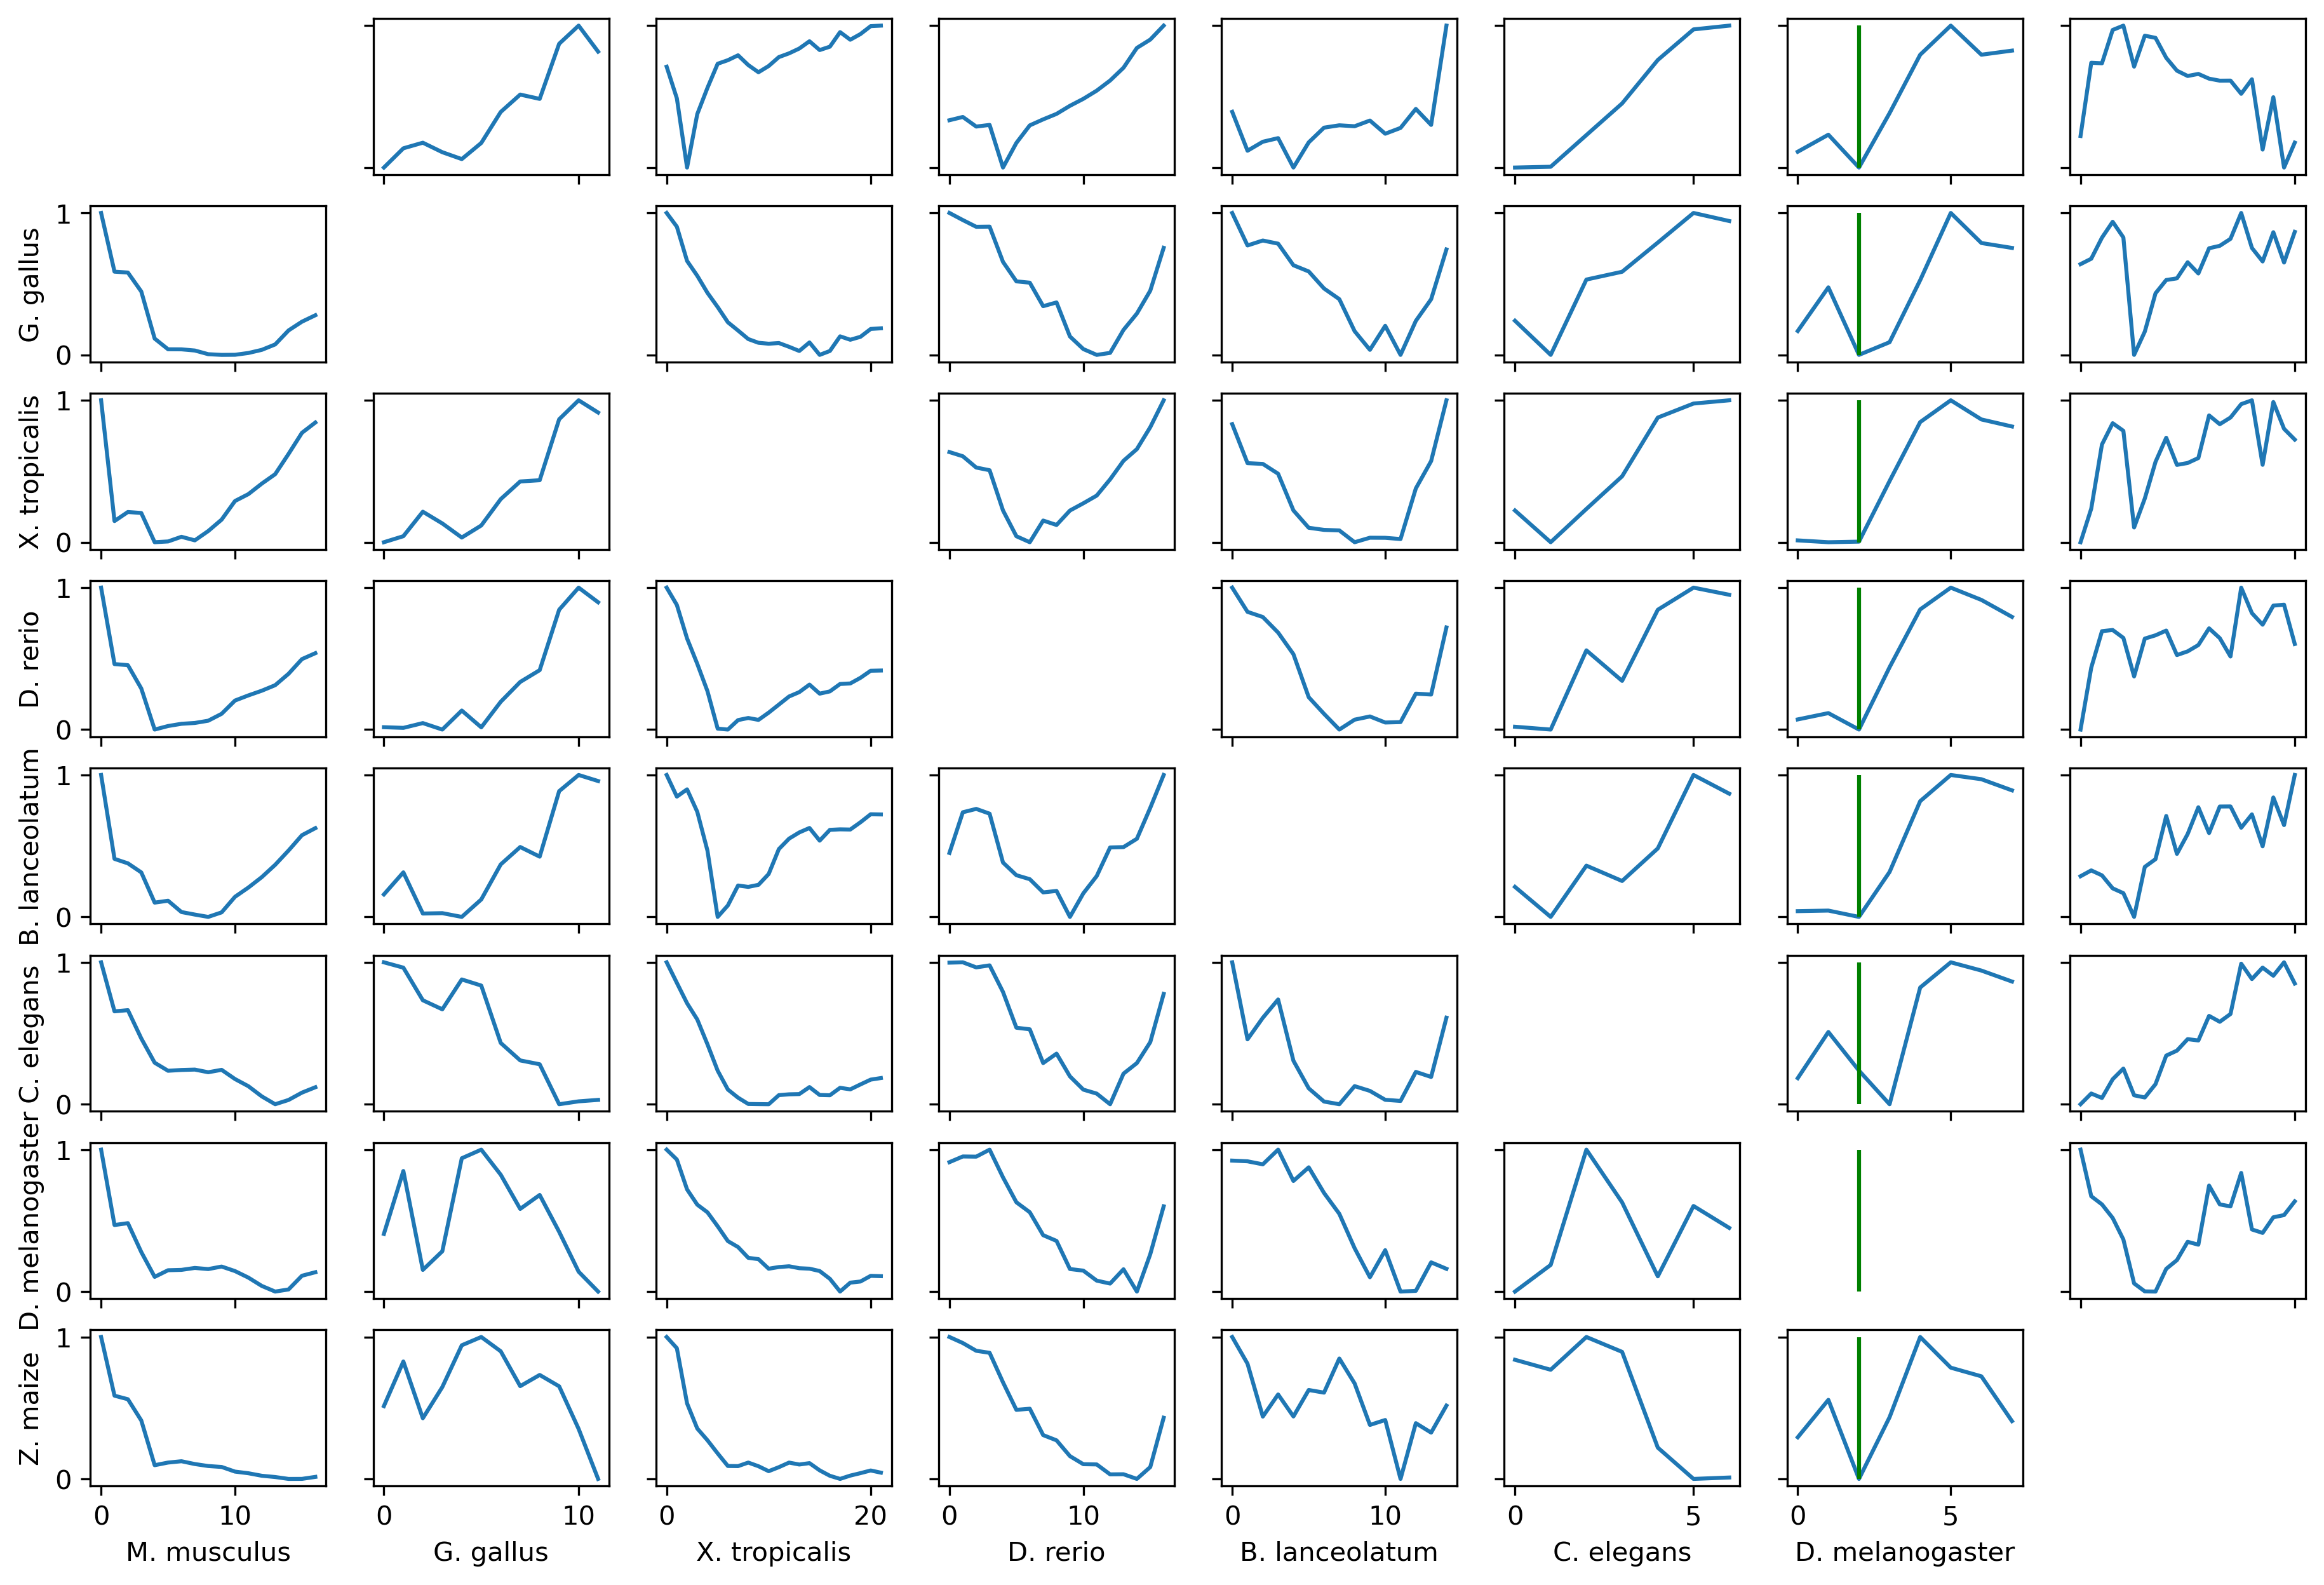

In [18]:
fig, axes = plt.subplots(figsize=(15, 10), nrows=len(assembly2species.keys()), ncols=len(assembly2species.keys()), dpi=300, sharey=True, sharex="col")
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)


for assembly_1_i, assembly_1 in enumerate(assembly2species.keys()):
    for assembly_2_i, assembly_2 in enumerate(assembly2species.keys()):
        ax = axes[assembly_2_i, assembly_1_i]

        if assembly_2_i == assembly_1_i: 
            ax.axis('off')
            continue
            
        df_X, df_Y = dfs_stages[assembly_1].copy(), dfs_stages[assembly_2].copy()
        
#         shared_orthogroups = list(set(df_X.index.get_level_values(0)).intersection(set(df_Y.index.get_level_values(0))))
#         vals = []
#         for i in range(1):
#             bootstrap_orthogroups = random.sample(shared_orthogroups, 200)
#             bootstrap_orthogroups = shared_orthogroups
#             df_X_bootstrap = df_X.loc[bootstrap_orthogroups].groupby(level=0).mean()
#             df_Y_bootstrap = df_Y.loc[bootstrap_orthogroups].groupby(level=0).mean()
            
        orthos_X = df_X.index.get_level_values(0)
        orthos_Y = df_Y.index.get_level_values(0)
        # TODO choose:
        # Take mean of all orthogroups
        shared_orthogroups = list(set(orthos_X).intersection(set(orthos_Y)))

        # Take only one-to-one orthologs
        shared_orthogroups = list(set(orthos_X[~orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[~orthos_Y.duplicated(keep=False)])))

        # Take all orthogroups minus the one-to-one orthologs
        shared_orthogroups = list(set(orthos_X[orthos_X.duplicated(keep=False)]).intersection(set(orthos_Y[orthos_Y.duplicated(keep=False)])))
        df_X_bootstrap = df_X.loc[shared_orthogroups].groupby(level=0).mean()
        df_Y_bootstrap = df_Y.loc[shared_orthogroups].groupby(level=0).mean()
        df_X_bootstrap = qnorm.quantile_normalize(df_X_bootstrap)
        df_Y_bootstrap = qnorm.quantile_normalize(df_Y_bootstrap)

        corr_matrix = -pairwise_jensen_shannon(df_X_bootstrap, df_Y_bootstrap)
        sns.lineplot(
            pd.DataFrame([sklearn.preprocessing.minmax_scale(np.max(corr_matrix, axis=1))]).melt(value_name="corr", var_name="tp"),
            x="tp", 
            y="corr", 
            ax=ax,
        )
        
#         corr_matrix = pairwise_spearman(df_X_bootstrap, df_Y_bootstrap)
#         sns.lineplot(
#             pd.DataFrame([sklearn.preprocessing.minmax_scale(np.max(corr_matrix, axis=1))]).melt(value_name="corr", var_name="tp"),
#             x="tp", 
#             y="corr", 
#             ax=ax,
#         )
        
#         corr_matrix = pairwise_pearson(df_X_bootstrap, df_Y_bootstrap)
#         sns.lineplot(
#             pd.DataFrame([sklearn.preprocessing.minmax_scale(np.max(corr_matrix, axis=1))]).melt(value_name="corr", var_name="tp"),
#             x="tp", 
#             y="corr", 
#             ax=ax,
#         )
        
        print(assembly_1, assembly_2, len(shared_orthogroups))





for label, ax in zip(assembly2species.values(), axes[:, 0]):
    ax.set(ylabel=label)

for label, ax in zip(assembly2species.values(), axes[-1, :]):
    ax.set(xlabel=label)

# for ax in axes[:, 1]:
#     ax.vlines([3, 4], ymin=0, ymax=1, colors="g")
    
for ax in axes[:, 6]:
    ax.vlines(2, ymin=0, ymax=1, colors="g")
    
# for ax in axes[:, 3]:
#     ax.vlines([11,12,13], ymin=0, ymax=1, colors="g")
#     ax.vlines([6], ymin=0, ymax=1, colors="r")

WIP below

In [17]:
mg = mygene.MyGeneInfo()


dfs

{'BraLan2':                        blastula_rep1  blastula_rep2  7hpf_rep1  7hpf_rep2  \
 N0.HOG0002485 BL00000       9.006864      10.473768  11.131918  11.321815   
 N0.HOG0001034 BL00001       0.314530       0.505632   1.582768   1.885674   
 NaN           BL00002     199.480507     208.011127  85.017797  81.173553   
 N0.HOG0000120 BL00003       0.000000       0.000000   0.168061   0.000000   
 N0.HOG0000339 BL00004       3.301539       2.508992   2.809257   3.364099   
 ...                              ...            ...        ...        ...   
 N0.HOG0000781 BL97479       8.252439       6.307818   7.616011   4.261596   
 NaN           BL97480      44.600949      49.672246  10.581812   9.588239   
 N0.HOG0016913 BL97481       1.508400       1.454923   0.490464   0.362937   
 N0.HOG0000735 BL97482       0.000000       0.000000   0.000000   0.662167   
 N0.HOG0014660 BL97483       0.000000       0.000000   0.328765   0.000000   
 
                         8hpf_rep1   8hpf_rep2  10h

In [ ]:
# TODO add **all** species (zebrafish & xenopus & ce11 & dm6)
# TODO prefer ENSG instead of gene name / alias
# mouse and human


# all_genes = [gene for genes in cur.execute(f"SELECT gene_id FROM genes WHERE assembly='human' OR assembly='mouse'").fetchall() for gene in genes]
# all_genes = mg.querymany(all_genes, scopes="ensembl.gene,symbol,alias", fields="symbol,go,alias", as_dataframe=True, returnall=True)["out"]
# all_genes


all_genes_index = set(all_genes.index)
all_genes_index_iloc = {gene: i for i, gene in enumerate(all_genes.index)}
all_genes_index_iloc
for orthogroup, *_ in set(cur.execute(f"""
    SELECT genes.orthogroup from 
    ORTHOGROUPS INNER JOIN genes ON ORTHOGROUPS.orthogroup=genes.orthogroup
    WHERE genes.assembly='human' OR genes.assembly='mouse'""").fetchall()):
#     print(orthogroup)
    genes = tuple({gene for genes in cur.execute(f"SELECT gene_id FROM genes WHERE (assembly='human' OR assembly='mouse') AND orthogroup='{orthogroup}'").fetchall() for gene in genes if gene is not None})
    good_genes = all_genes_index.intersection(genes)
    good_genes_idx = [all_genes_index_iloc[gene] for gene in good_genes]
    good_genes_idx = [x for x in good_genes_idx if x]
    
    go_terms = all_genes.iloc[good_genes_idx][["go.MF", "go.BP", "go.CC"]].stack().values
    if len(go_terms) == 0:
        continue
    go_terms = {x["id"] for x in go_terms[0]}

    hits = all_go_terms.intersection(go_terms)

    if hits:
        go_orthogroups.append(orthogroup)
        print(genes)
        print(go_terms)

    
#     orthos_checked.append(orthogroup)
#     genes_checked.append(good_genes)

# all_genes.loc[genes_checked, ["go.MF", "go.BP", "go.CC"]]
    
# for orthogroup, good_genes in zip(orthos_checked, genes_checked):
#     print(orthogroup)
#     go_terms = all_genes.loc[good_genes, ["go.MF", "go.BP", "go.CC"]]#.stack().values
#     if len(go_terms) == 0:
#         continue
#     go_terms = {x["id"] for x in go_terms[0]}

#     hits = all_go_terms.intersection(go_terms)

#     if hits:
#         go_orthogroups.append(orthogroup)
#         print(genes)
#         print(go_terms)


In [28]:
dfs

{'BraLan2':                        blastula_rep1  blastula_rep2  7hpf_rep1  7hpf_rep2  \
 orthogroup    gene                                                          
 N0.HOG0002485 BL00000       9.006864      10.473768  11.131918  11.321815   
 N0.HOG0001034 BL00001       0.314530       0.505632   1.582768   1.885674   
 NaN           BL00002     199.480507     208.011127  85.017797  81.173553   
 N0.HOG0000120 BL00003       0.000000       0.000000   0.168061   0.000000   
 N0.HOG0000339 BL00004       3.301539       2.508992   2.809257   3.364099   
 ...                              ...            ...        ...        ...   
 N0.HOG0000781 BL97479       8.252439       6.307818   7.616011   4.261596   
 NaN           BL97480      44.600949      49.672246  10.581812   9.588239   
 N0.HOG0016913 BL97481       1.508400       1.454923   0.490464   0.362937   
 N0.HOG0000735 BL97482       0.000000       0.000000   0.000000   0.662167   
 N0.HOG0014660 BL97483       0.000000       0.000000 

In [30]:
mg.querymany(["zyg-12"], scopes="ensembl.gene,symbol,alias", fields="symbol,go,alias", as_dataframe=True, returnall=True)["out"]

querying 1-1...done.
Finished.
1 input query terms found dup hits:
	[('zyg-12', 2)]


_id     _score        symbol  \
query                                        
zyg-12   24105291  17.235743        zyg-12   
zyg-12  105218057  16.133139  LOC105218057   

                                                    go.BP  \
query                                                       
zyg-12  [{'evidence': 'IMP', 'gocategory': 'BP', 'id':...   
zyg-12                                                NaN   

                                                    go.CC  \
query                                                       
zyg-12  [{'evidence': 'IEA', 'gocategory': 'CC', 'id':...   
zyg-12                                                NaN   

                                                    go.MF   alias  
query                                                              
zyg-12  [{'category': 'MF', 'evidence': 'IPI', 'id': '...     NaN  
zyg-12                                                NaN  zyg-12

In [56]:
all_genes = [x[1] for df in dfs_stages.values() for x in df.index]
all_genes = mg.querymany(all_genes, scopes="ensembl.gene,symbol,alias", fields="symbol,go,alias", as_dataframe=True, returnall=True)["out"]
all_genes

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

_id     _score        symbol go.BP go.CC  \
query                                                                         
BL00045                        BL00045  16.580470           NaN   NaN   NaN   
BL00317                        BL00317  16.580496           NaN   NaN   NaN   
BL00340                        BL00340  16.580542           NaN   NaN   NaN   
BL00510                        BL00510  16.580465           NaN   NaN   NaN   
BL01246                        BL01246  16.580550           NaN   NaN   NaN   
...                                ...        ...           ...   ...   ...   
ENSXETG00000039818           116407982  16.580580  LOC116407982   NaN   NaN   
ENSXETG00000018647              448362  16.060162      MGC89221   NaN   NaN   
ENSXETG00000031036           100493330  16.580496  LOC100493330   NaN   NaN   
ENSXETG00000005337           116408069  16.580470  LOC116408069   NaN   NaN   
ENSXETG00000036396  ENSXETG00000036396  16.580470           NaN   NaN   NaN   

                   go.MF go.MF.category go.MF.evidence    go.MF.id  \
query                                                                
BL00045              NaN            NaN            NaN         NaN   
BL00317              NaN            NaN            NaN         NaN   
BL00340              NaN            NaN            NaN         NaN   
BL00510              NaN            NaN            NaN         NaN   
BL01246              NaN            NaN            NaN         NaN   
...                  ...            ...            ...         ...   
ENSXETG00000039818   NaN            NaN            NaN         NaN   
ENSXETG00000018647   NaN             MF            IEA  GO:0003796   
ENSXETG00000031036   NaN            NaN            NaN         NaN   
ENSXETG00000005337   NaN            NaN            NaN         NaN   
ENSXETG00000036396   NaN            NaN            NaN         NaN   

                   go.MF.qualifier  ... go.BP.term go.CC.evidence  \
query                               ...                             
BL00045                        NaN  ...        NaN            NaN   
BL00317                        NaN  ...        NaN            NaN   
BL00340                        NaN  ...        NaN            NaN   
BL00510                        NaN  ...        NaN            NaN   
BL01246                        NaN  ...        NaN            NaN   
...                            ...  ...        ...            ...   
ENSXETG00000039818             NaN  ...        NaN            NaN   
ENSXETG00000018647         enables  ...        NaN            NaN   
ENSXETG00000031036             NaN  ...        NaN            NaN   
ENSXETG00000005337             NaN  ...        NaN            NaN   
ENSXETG00000036396             NaN  ...        NaN            NaN   

                   go.CC.gocategory go.CC.id go.CC.qualifier go.CC.term alias  \
query                                                                           
BL00045                         NaN      NaN             NaN        NaN   NaN   
BL00317                         NaN      NaN             NaN        NaN   NaN   
BL00340                         NaN      NaN             NaN        NaN   NaN   
BL00510                         NaN      NaN             NaN        NaN   NaN   
BL01246                         NaN      NaN             NaN        NaN   NaN   
...                             ...      ...             ...        ...   ...   
ENSXETG00000039818              NaN      NaN             NaN        NaN   NaN   
ENSXETG00000018647              NaN      NaN             NaN        NaN   NaN   
ENSXETG00000031036              NaN      NaN             NaN        NaN   NaN   
ENSXETG00000005337              NaN      NaN             NaN        NaN   NaN   
ENSXETG00000036396              NaN      NaN             NaN        NaN   NaN   

                   go.CC.pubmed go.MF.pubmed notfound  
query                                                  
BL00045                     NaN 

In [35]:
FLYBASE
HGNC

NameError: name 'FLYBASE' is not defined

In [366]:
# load data
df_xenopus = dfs_stages["UCB_Xtro_10.0"].copy()
df_zebrafish = dfs_stages["GRCz11"].copy()
df_zebrafish_se = pd.read_table(f"../data_new/GRCz11-TPM_singleembryo.tsv.gz", index_col=0)
df_zebrafish_se

# get only orthogroups
orthos_xenopus = df_xenopus.index.get_level_values(0)
orthos_zebrafish = df_zebrafish.index.get_level_values(0)
shared_orthogroups = list(set(orthos_xenopus[~orthos_xenopus.duplicated(keep=False)]).intersection(set(orthos_zebrafish[~orthos_zebrafish.duplicated(keep=False)])))
# shared_orthogroups = list(set(orthos_xenopus[orthos_xenopus.duplicated(keep=False)]).intersection(set(orthos_zebrafish[orthos_zebrafish.duplicated(keep=False)])))
df_xenopus = df_xenopus.loc[shared_orthogroups]
df_zebrafish = df_zebrafish.loc[shared_orthogroups]

# subset single embryo on orthogroups
df_zebrafish_se = df_zebrafish_se.loc[df_zebrafish.index.get_level_values(1)]
df_zebrafish_se.index = df_zebrafish.index.get_level_values(0)

# keep only orthogroup identifier
df_xenopus = df_xenopus.loc[shared_orthogroups].groupby(level=0).mean()
df_zebrafish = df_zebrafish.loc[shared_orthogroups].groupby(level=0).mean()
df_zebrafish_se = df_zebrafish_se.loc[df_zebrafish.index]

# quantile normalize
df_xenopus = qnorm.quantile_normalize(df_xenopus)
df_zebrafish = qnorm.quantile_normalize(df_zebrafish)

In [367]:
df_zebrafish_se

1-cell_rep1  1-cell_rep2  1-cell_rep3  1-cell_rep4  \
orthogroup                                                          
N0.HOG0000101     1.817105     1.997768     1.609723     1.285500   
N0.HOG0000146    55.792141    59.285217    53.566669    61.599171   
N0.HOG0000205     1.997491     1.220049     2.602238     4.289806   
N0.HOG0000218    11.321606     9.322624     7.997377     9.153602   
N0.HOG0000249     0.390690     0.000000     0.203589     0.000000   
...                    ...          ...          ...          ...   
N0.HOG0024951     7.655396     2.877444     3.068644     2.678125   
N0.HOG0024954     0.000000     0.000000     0.000000     0.000000   
N0.HOG0024971     0.000000     0.000000     0.000000     0.000000   
N0.HOG0024978     0.000000     0.000000     0.000000     0.000000   
N0.HOG0024981     0.000000     0.427545     0.273572     0.000000   

               1-cell_rep5  1-cell_rep6  1-cell_rep7  1-cell_rep8  \
orthogroup                                                          
N0.HOG0000101     2.551246     1.764183     2.776308     2.310847   
N0.HOG0000146    57.676764    62.762249    64.366862    54.151185   
N0.HOG0000205     2.921365     1.414084     4.838401     3.326514   
N0.HOG0000218     9.419688     7.531466     9.281848     7.922656   
N0.HOG0000249     0.228556     0.000000     0.291183     0.000000   
...                    ...          ...          ...          ...   
N0.HOG0024951     2.411478     5.479040     1.755569     2.496286   
N0.HOG0024954     0.000000     0.000000     0.000000     0.000000   
N0.HOG0024971     0.000000     0.000000     0.000000     0.000000   
N0.HOG0024978     0.000000     0.000000     0.000000     0.000000   
N0.HOG0024981     0.000000     0.000000     0.000000     0.000000   

               1-cell_rep9  1-cell_rep10  ...  Day-5_rep5  Day-5_rep7  \
orthogroup                                ...                           
N0.HOG0000101     3.087172      1.440732  ...    0.000000    0.171070   
N0.HOG0000146    65.253472     60.240865  ...   11.124432   19.786895   
N0.HOG0000205     3.307359      3.260672  ...   16.267880   21.626058   
N0.HOG0000218    14.489530     10.443351  ...    1.395063    1.658015   
N0.HOG0000249     0.225004      0.000000  ...    0.000000    1.103438   
...                    ...           ...  ...         ...         ...   
N0.HOG0024951     5.595862      5.767637  ...    0.000000    0.000000   
N0.HOG0024954     0.000000      0.000000  ...   70.998532   79.126354   
N0.HOG0024971     0.000000      0.000000  ...    0.204758    0.278117   
N0.HOG0024978     0.000000      0.000000  ...    0.000000    0.000000   
N0.HOG0024981     0.151175      0.000000  ...    0.727761    0.494248   

               Day-5_rep9  Day-5_rep11  Day-5_rep13  Day-5_rep15  Day-5_rep17  \
orthogroup                                                                      
N0.HOG0000101    0.000000     0.148184     0.142349     0.000000     0.188822   
N0.HOG0000146    8.144086    10.907096    11.675058     7.123892    15.883778   
N0.HOG0000205   20.905068    20.769011    15.648006    10.688575    25.945880   
N0.HOG0000218    1.148976     2.256883     1.182554     1.563405     2.352945   
N0.HOG0000249    0.892107     0.000000     0.000000     0.000000     0.405981   
...                   ...          ...          ...          ...          ...   
N0.HOG0024951    0.000000     0.000000     0.000000     0.000000     0.000000   
N0.HOG0024954   70.969034    62.828792    48.695379    50.172598   138.284141   
N0.HOG0024971    1.124261     0.722728     0.231423     0.407940     0.306977   
N0.HOG0024978    0.000000     0.000000     0.000000     0.000000     0.000000   
N0.HOG0024981    0.399590     1.284377     0.000000     0.000000     2.182146   

               Day-5_rep19  Day-5_rep21  Day-5_rep23  
orthogroup                                            
N0.HOG0000101     0.000000     0.000000     0.000000  
N0.HOG0000146     9.944061     5.241907    12.2387

In [368]:
df_zebrafish

Eggs   2-4cells        2hpf      1Kcells        Dome  \
orthogroup                                                                  
N0.HOG0000101   22.828324  41.778631   50.465544    40.940440   35.534878   
N0.HOG0000146  151.051252  30.591169  100.832313  2586.652656  394.996992   
N0.HOG0000205    6.351853  11.876697   16.510674    10.422738    9.515545   
N0.HOG0000218   38.616111  27.886037   32.157755    22.780489   25.100699   
N0.HOG0000249    0.216271   0.288060    0.623793     0.792954    0.212827   
...                   ...        ...         ...          ...         ...   
N0.HOG0024951    7.921216  23.320108    9.793177     9.681150    3.480610   
N0.HOG0024954    0.061303   0.081395    0.077059     0.053680    0.035811   
N0.HOG0024971    2.134677   1.894618    1.748406     1.398083    1.145466   
N0.HOG0024978    0.061303   0.081395    0.317843     0.053680    0.256523   
N0.HOG0024981    2.621320   2.978576    5.359113     3.729622    2.494538   

                   Shield        8hpf         Bud       12hpf       16hpf  \
orthogroup                                                                  
N0.HOG0000101   12.159136    8.619821   10.002444    9.449723    7.816487   
N0.HOG0000146  131.331020  113.874988  146.506213  122.803896  226.619397   
N0.HOG0000205    4.275556    6.423507    9.721591   15.214011   26.069258   
N0.HOG0000218   21.466780   32.678694   18.879154   25.913473   15.957975   
N0.HOG0000249    0.862857    0.835787    1.279958    1.385027    1.856463   
...                   ...         ...         ...         ...         ...   
N0.HOG0024951    2.655163    1.217002    0.496952    0.276944    0.088749   
N0.HOG0024954    0.164447    0.223970    0.196518    0.037136    0.098753   
N0.HOG0024971    1.414466    1.496489    1.259705    2.271585    1.422954   
N0.HOG0024978    0.596025    0.454165    0.308269    0.743547    0.271042   
N0.HOG0024981    1.787655    1.621058    0.655737    2.274956    1.142916   

                    20hpf       26hpf       28hpf       48hpf       72hpf  \
orthogroup                                                                  
N0.HOG0000101    5.932361    5.726529    6.002031    5.077501    2.931899   
N0.HOG0000146  246.471218  226.619397  222.679238  339.390392  267.572179   
N0.HOG0000205   38.678967   66.054042   65.379478   80.828121  140.634466   
N0.HOG0000218   14.499134   13.783502   10.585448    4.441846    5.938755   
N0.HOG0000249    1.076358    0.781823    0.539051    0.321560    0.136662   
...                   ...         ...         ...         ...         ...   
N0.HOG0024951    0.027410    0.041123    0.036619    0.065162    0.003449   
N0.HOG0024954    0.174573    0.510119    3.026889  226.005595  702.563440   
N0.HOG0024971    1.037859    0.934030    0.230399    0.341503    0.389230   
N0.HOG0024978    0.164447    0.096636    0.197398    0.104462    0.029780   
N0.HOG0024981    0.916562    1.073180    0.142094    0.966461    0.918824   

                   120hpf        7dpf  
orthogroup                             
N0.HOG0000101    2.577397    4.128474  
N0.HOG0000146  227.741237  118.939103  
N0.HOG0000205   63.024204   33.525071  
N0.HOG0000218    2.315099    0.567062  
N0.HOG0000249    0.155866    0.046021  
...                   ...         ...  
N0.HOG0024951    0.051039    0.062954  
N0.HOG0024954  651.772383  563.526619  
N0.HOG0024971    1.824427   41.609035  
N0.HOG0024978    0.090420    0.122114  
N0.HOG0024981    0.199410    5.022026  

[5444 rows x 17 columns]

In [369]:
df_xenopus

0-2hpf     3-5hpf     6-8hpf    9-11hpf    12-14hpf  \
orthogroup                                                              
N0.HOG0000101   4.817913   5.104328   5.155512   3.913937    3.240134   
N0.HOG0000146  49.058618  91.664147  64.484988  78.213224  116.954429   
N0.HOG0000205   5.759038   5.032205   3.688484   2.422323    1.561212   
N0.HOG0000218  85.446496  62.577415  75.082339  70.150264   40.205976   
N0.HOG0000249   1.150460   0.879804   0.258990   0.073638    0.047470   
...                  ...        ...        ...        ...         ...   
N0.HOG0024951  90.432114  15.459077  15.860148   8.211625    3.928479   
N0.HOG0024954   0.184200   0.258990   0.580779   0.397699    0.252429   
N0.HOG0024971   5.119624   6.498206   8.095123  12.085696    6.824919   
N0.HOG0024978   1.186790   0.970817   0.462288   0.666256    0.623483   
N0.HOG0024981   0.176218   0.030591   0.056797   0.044009    0.020978   

                 15-17hpf    18-20hpf    21-23hpf    24-26hpf    27-29hpf  \
orthogroup                                                                  
N0.HOG0000101    2.817622    2.528091    2.612989    2.769209    2.869191   
N0.HOG0000146  247.111105  388.985192  396.305008  424.258635  411.191055   
N0.HOG0000205    1.369825    1.664605    2.067601    4.401180    3.569334   
N0.HOG0000218   23.419553   23.853529   26.213974   30.243057   26.558294   
N0.HOG0000249    0.008489    0.007223    0.006921    0.000180    0.001628   
...                   ...         ...         ...         ...         ...   
N0.HOG0024951    2.250312    1.228659    0.977161    0.714920    0.726321   
N0.HOG0024954    0.053094    0.052161    0.087554    0.172680    0.397699   
N0.HOG0024971    4.304268    3.834870    4.687657    8.677365   11.436820   
N0.HOG0024978    0.190534    0.186962    0.237549    0.477873    0.827612   
N0.HOG0024981    0.015173    0.008489    0.025022    0.042190    0.054232   

               ...    36-38hpf    39-41hpf    42-44hpf    45-47hpf  \
orthogroup     ...                                                   
N0.HOG0000101  ...    3.437275    2.636048    3.077283    2.678494   
N0.HOG0000146  ...  452.309238  407.402865  400.370164  411.191055   
N0.HOG0000205  ...    6.568735    6.688039    8.513749    8.361201   
N0.HOG0000218  ...   29.492121   27.151283   26.200249   27.328253   
N0.HOG0000249  ...    0.001319    0.005896    0.001030    0.000500   
...            ...         ...         ...         ...         ...   
N0.HOG0024951  ...    0.367816    0.190534    0.235775    0.239574   
N0.HOG0024954  ...    0.721378    0.596057    0.680064    0.642311   
N0.HOG0024971  ...   14.148725   12.473473   12.893046   11.835767   
N0.HOG0024978  ...    1.082397    1.563769    2.143860    2.135058   
N0.HOG0024981  ...    0.041247    0.044842    0.069838    0.072622   

                 48-50hpf    51-53hpf    54-56hpf    57-59hpf    60-62hpf  \
orthogroup                                                                  
N0.HOG0000101    2.645447    4.221101    2.696396    3.166736    2.431424   
N0.HOG0000146  375.956482  276.235434  315.646405  331.161594  331.161594   
N0.HOG0000205    9.234582   17.168405   13.633468   16.192251   16.938815   
N0.HOG0000218   29.648791   33.756059   29.027558   25.627906   23.466945   
N0.HOG0000249    0.000319    0.014243    0.019402    0.000319    0.000242   
...                   ...         ...         ...         ...         ...   
N0.HOG0024951    0.104343    0.112675    0.060802    0.103073    0.066534   
N0.HOG0024954    0.757386    1.456090    0.973754    1.138712    1.150460   
N0.HOG0024971   11.742807   22.594084   13.206758   11.742807   12.338563   
N0.HOG0024978    1.954403    2.262110    1.758887    1.753043    1.776258   
N0.HOG0024981    0.050314    0.068263    0.032122    0.095042    0.072622   

                 63-66hpf  
orthogroup                 
N0.HOG0000101    2.510106  
N0.HOG0000146  304.671862  
N0.HOG0000205   19.172976  
N0.HOG0000218

In [370]:
orthoggroup = "N0.HOG0000101"
orthogroups_table.loc[orthoggroup, ["UCB_Xtro_10.0.pep", "GRCz11.pep"]]

UCB_Xtro_10.0.pep    abcc10|ENSXETG00000010586
GRCz11.pep           abcc10|ENSDARG00000077988
Name: N0.HOG0000101, dtype: object

In [418]:
corrs = pairwise_jensen_shannon(df_xenopus, df_zebrafish)
corrs

/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[0.52984665, 0.52101215, 0.52522984, 0.5465549 , 0.56380887,
        0.60078545, 0.6116682 , 0.63425714, 0.63675363, 0.64809437,
        0.65323407, 0.65641323, 0.65884339, 0.66880581, 0.68912314,
        0.7029223 , 0.72508004],
       [0.559667  , 0.54916936, 0.53581988, 0.5336907 , 0.54680742,
        0.59260636, 0.60239867, 0.62567701, 0.62991336, 0.64318692,
        0.6482913 , 0.65197364, 0.65442543, 0.66322436, 0.68878693,
        0.70019347, 0.72222415],
       [0.58275556, 0.57283624, 0.53875777, 0.53546632, 0.49095941,
        0.52498358, 0.5319105 , 0.56209964, 0.56777611, 0.58490504,
        0.59153892, 0.59769757, 0.60314379, 0.61243384, 0.64339714,
        0.65540197, 0.68279288],
       [0.60401573, 0.60083574, 0.5705654 , 0.57083388, 0.48236809,
        0.46006235, 0.45089455, 0.47345994, 0.47802812, 0.49746032,
        0.5056644 , 0.51448578, 0.52239029, 0.53305041, 0.56628071,
        0.58096498, 0.61484647],
       [0.61072791, 0.6089623 , 0.58355211, 0.589830

([<matplotlib.axis.XTick at 0x7f20afe52ce0>,
 [Text(0, 0, 'Eggs'),
  Text(1, 0, '2-4cells'),
  Text(2, 0, '2hpf'),
  Text(3, 0, '1Kcells'),
  Text(4, 0, 'Dome'),
  Text(5, 0, 'Shield'),
  Text(6, 0, '8hpf'),
  Text(7, 0, 'Bud'),
  Text(8, 0, '12hpf'),
  Text(9, 0, '16hpf'),
  Text(10, 0, '20hpf'),
  Text(11, 0, '26hpf'),
  Text(12, 0, '28hpf'),
  Text(13, 0, '48hpf'),
  Text(14, 0, '72hpf'),
  Text(15, 0, '120hpf'),
  Text(16, 0, '7dpf')])

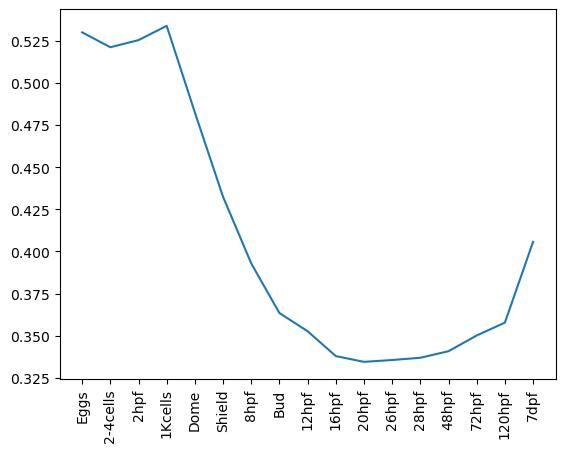

In [422]:
plt.plot(corrs.min(axis=0))
plt.xticks(range(len(df_zebrafish.columns)), df_zebrafish.columns, rotation='vertical')

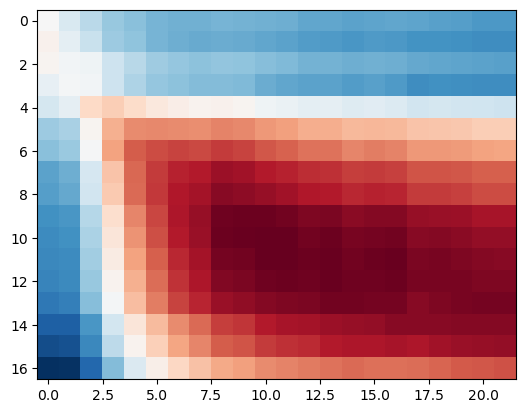

In [420]:
plt.imshow(-corrs.T, cmap="RdBu_r")

In [460]:
n_reps = 10

df_zebrafish_se
stages = ["1-cell", "2-cell", "128-cell", "1k-cell", "Dome", "50pc-epiboly", "Shield", "75pc-epiboly", "1-4-somites", "14-19-somites", "20-25-somites", "Prim-5", "Prim-15", "Prim-25", "Long-pec", "Protruding-mouth", "Day-4", "Day-5"]
stages

reps_per_stage = {}
for stage in stages:
    reps_per_stage[stage] = [col for col in df_zebrafish_se.columns if stage in col]
    
nr_reps = 1
table = []
for stage in stages:
    df = pd.DataFrame(df_zebrafish_se[random.choices(reps_per_stage[stage], k=nr_reps)].mean(axis=1))
    df.columns = [stage]
    table.append(df)

df_zebrafish_se_mean = pd.concat(table, axis=1)
df_zebrafish_se_mean = qnorm.quantile_normalize(df_zebrafish_se_mean, target=df_zebrafish["Eggs"])

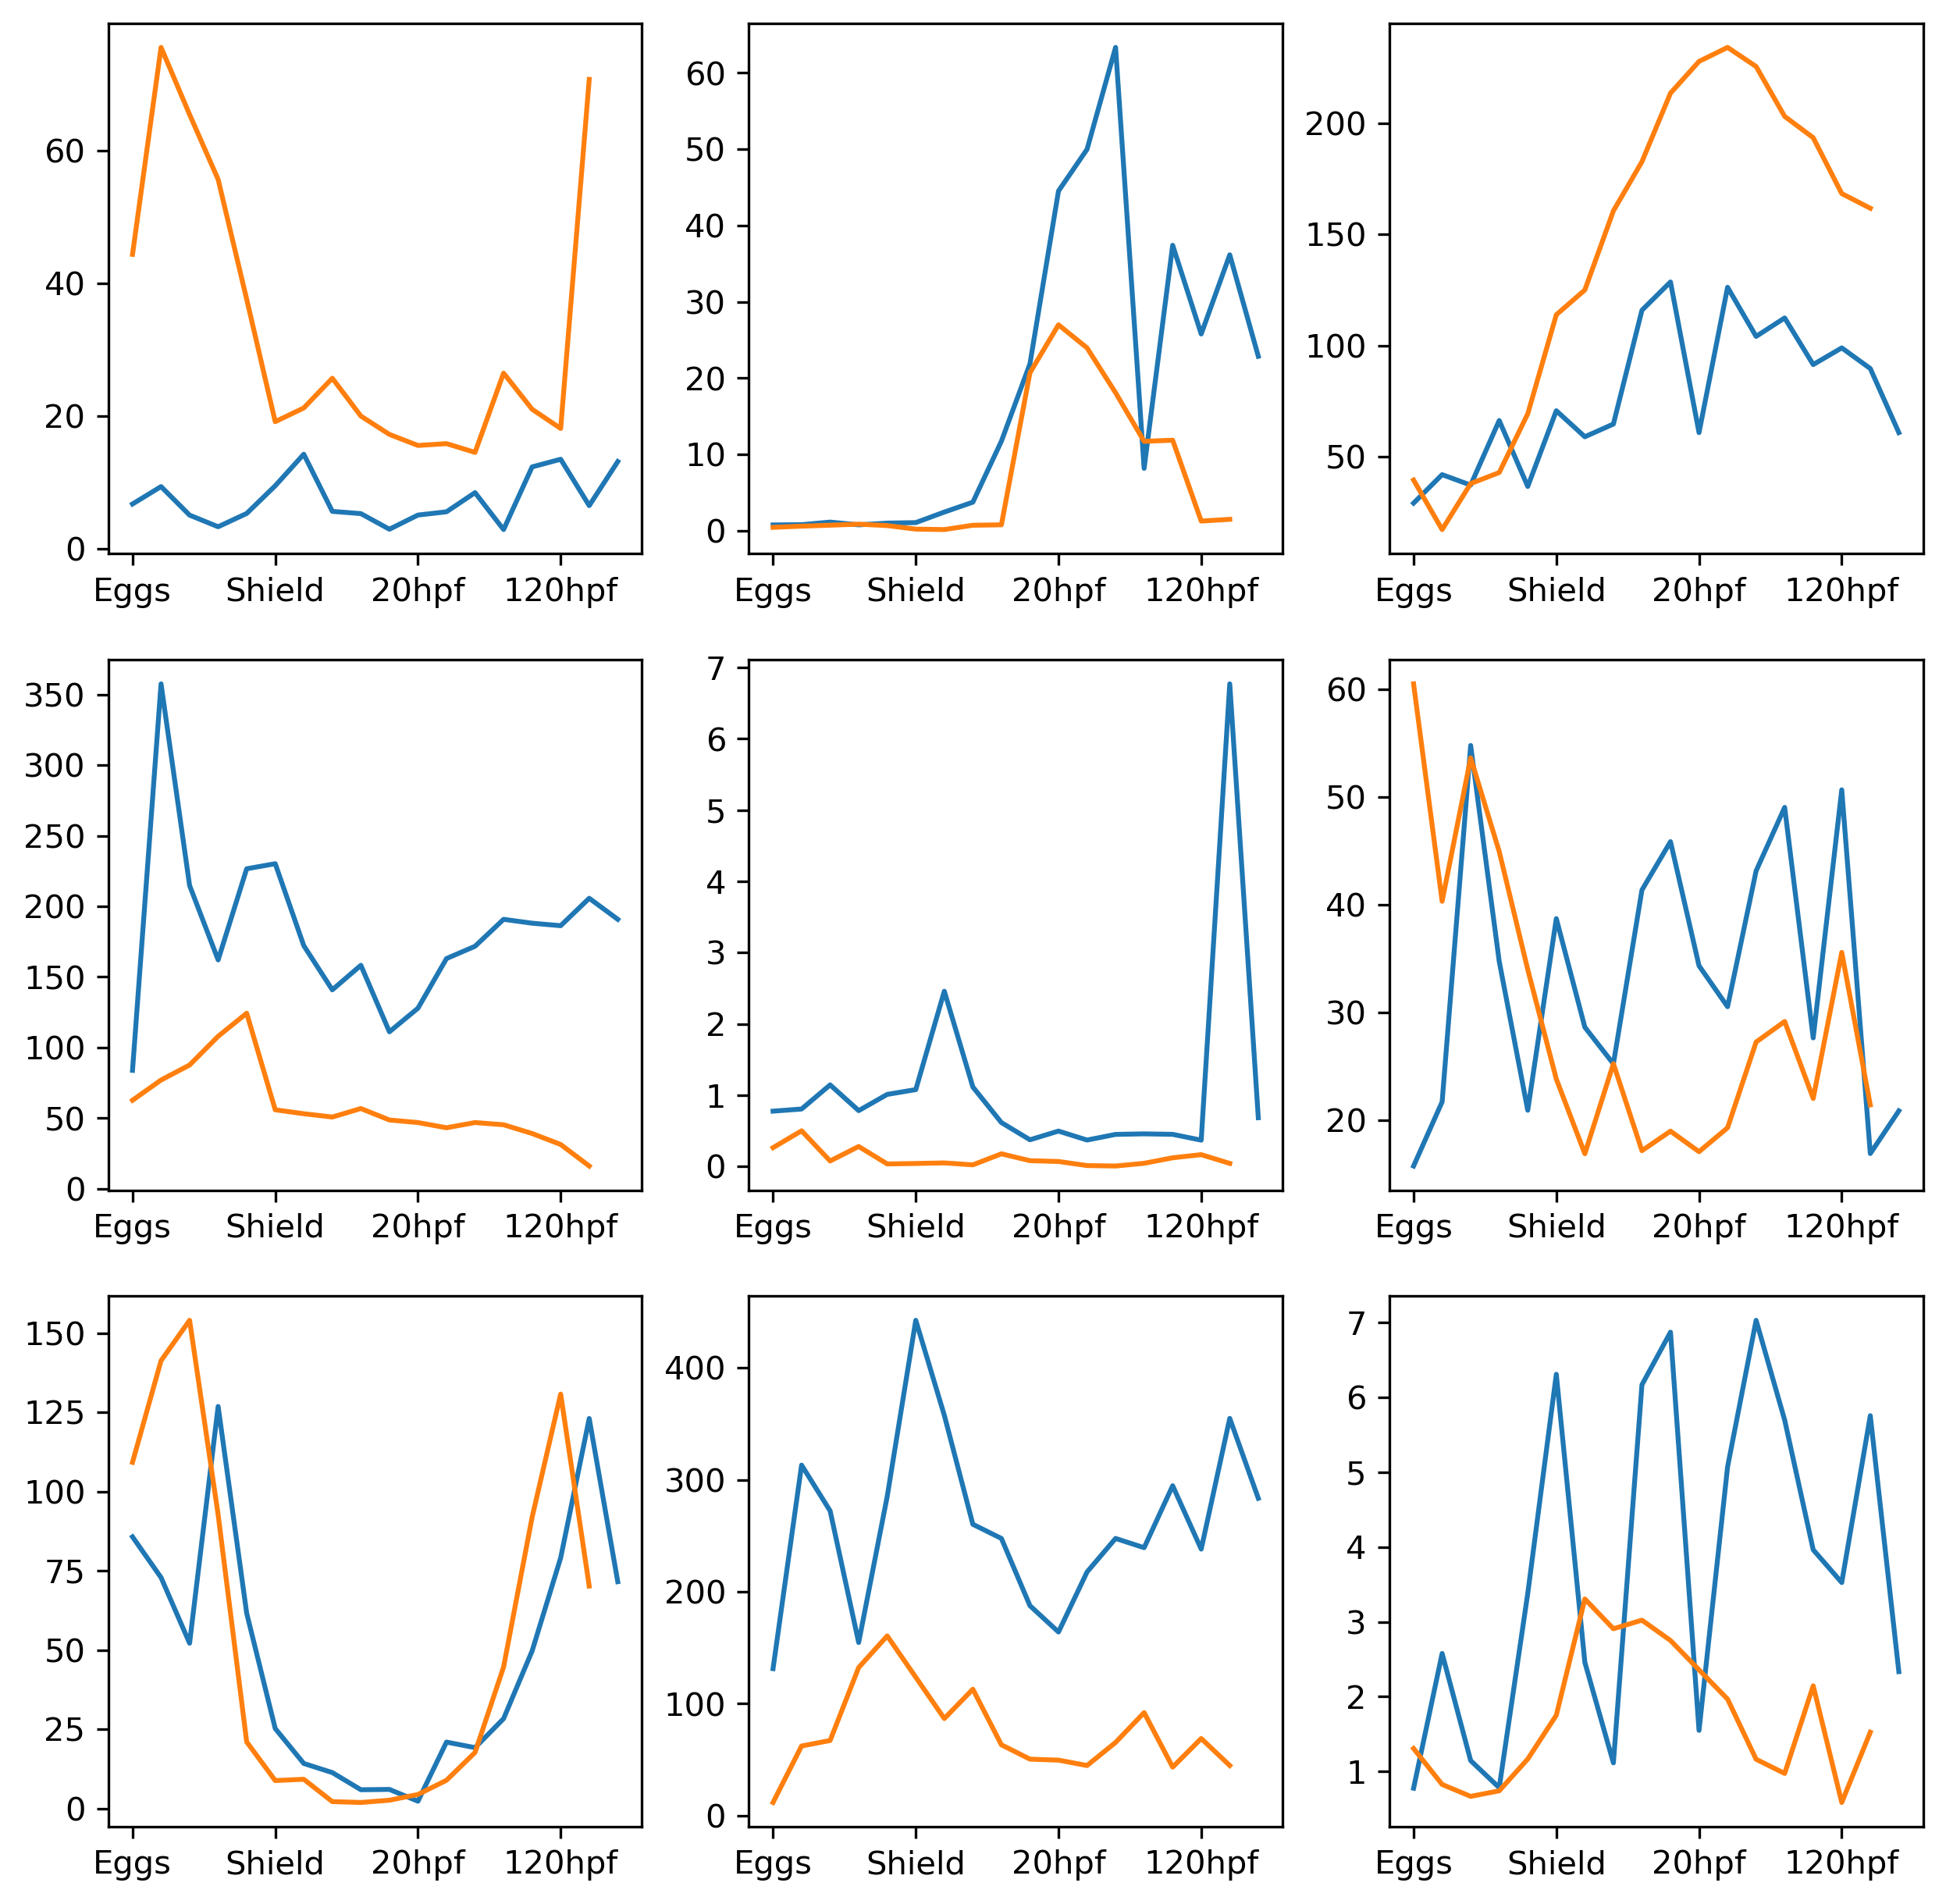

In [461]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, ncols=3, dpi=300)

for i in range(3):
    for j in range(3):
        og = random.choice(df_zebrafish_se_mean.index)
        # og = "N0.HOG0024951"
        df_zebrafish_se_mean.loc[og].plot(ax=axes[i, j])
        df_zebrafish.loc[og].plot(ax=axes[i, j])

/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


([<matplotlib.axis.XTick at 0x7f20e446aa10>,
 [Text(0, 0, '1-cell'),
  Text(1, 0, '2-cell'),
  Text(2, 0, '128-cell'),
  Text(3, 0, '1k-cell'),
  Text(4, 0, 'Dome'),
  Text(5, 0, '50pc-epiboly'),
  Text(6, 0, 'Shield'),
  Text(7, 0, '75pc-epiboly'),
  Text(8, 0, '1-4-somites'),
  Text(9, 0, '14-19-somites'),
  Text(10, 0, '20-25-somites'),
  Text(11, 0, 'Prim-5'),
  Text(12, 0, 'Prim-15'),
  Text(13, 0, 'Prim-25'),
  Text(14, 0, 'Long-pec'),
  Text(15, 0, 'Protruding-mouth'),
  Text(16, 0, 'Day-4'),
  Text(17, 0, 'Day-5')])

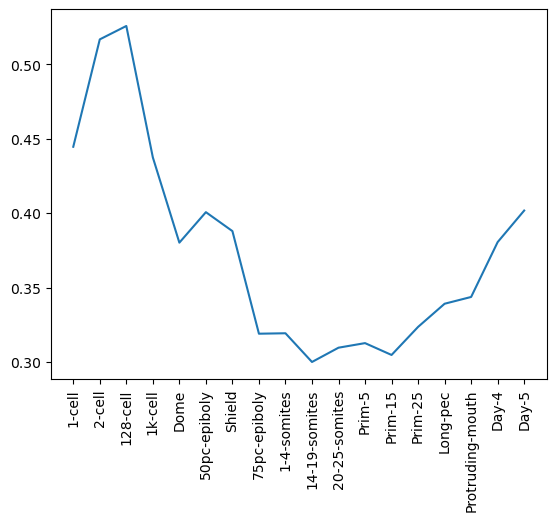

In [470]:
corrs = pairwise_jensen_shannon(df_zebrafish_se_mean, df_zebrafish)
plt.plot(corrs.min(axis=1))
plt.xticks(range(len(df_zebrafish_se_mean.columns)), df_zebrafish_se_mean.columns, rotation='vertical')

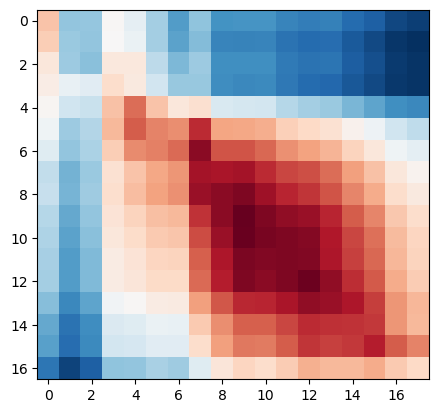

In [472]:
plt.imshow(-corrs.T, cmap="RdBu_r")

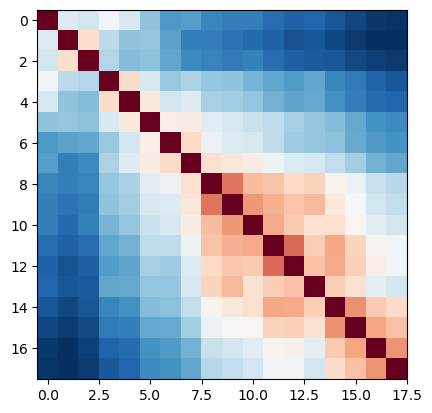

In [474]:
corrs = pairwise_jensen_shannon(df_zebrafish_se_mean, df_zebrafish_se_mean)
plt.imshow(-corrs.T, cmap="RdBu_r")